# Банки: сегментация пользователей по потреблению

***
**Данные для анализа:** датасет `bank_scrooge.csv`, содержащий данные о клиентах регионального банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.

**Заказчик анализа:** менеджер банковских продуктов банка «Метанпром»

**Цель анализа:** подготовить выводы и рекомендации для снижения оттока пользователей банка «Метанпром» на основании сегментации пользователей (в первую очередь - в разрезе количества используемых продуктов).

**Задачи:**
- Проанализировать клиентов банка «Метанпром», выявить различающие/объединяющие их признаки, отследить взаимосвязи;
- Сегментировать их по количеству потребляемых продуктов, уровню оттока и иным выявленным признакам с учётом целей анализа;
- Составить портреты сформированных сегментов;
- Сформулировать гипотезы о различии возраста между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним, и провести статистическую проверку этих гипотез;
- Подготовить выводы и рекомендации, носящие продуктовый характер, исходя из проведённой сегментации клиентов.

Содержание:

1. [Предобработка данных](#1)
    1. [Установка библиотек, которые могут потребоваться для анализа](#1.1)
    2. [Загрузка и обзор датасета](#1.2)
    3. [Обработка наименований столбцов](#1.3)
    4. [Выявление и анализ пропусков в столбце balance](#1.4)
    5. [Выявление и анализ явных и неявных дубликатов](#1.5)
    6. [Выявление и анализ выбросов](#1.6)
    7. [Форматирование столбцов](#1.7)
    8. [Промежуточные выводы](#1.8)
2. [Исследовательский анализ данных](#2)
    1. [Анализ распределения пользователей по городам, наличию кредитной карты, активности и полу](#2.1)
    2. [Анализ распределения пользователей по оттоку](#2.2)
    3. [Анализ распределения пользователей по баллам кредитного скоринга, балансу на счете и оценочной заработной плате](#2.3)
    4. [Анализ распределения пользователей по возрасту, количеству банковских продуктов и числу объектов собственности, которое банк рассматривает как залоговое имущество](#2.4)
    5. [Анализ корреляции оттока с другими признаками пользователей банка](#2.5)
    6. [Распределение признаков с учетом оттока](#2.6)
    7. [Промежуточные выводы](#2.7)
3. [Сегментация клиентов по количеству используемых продуктов](#3)
    1. [Общая картина распределения клиентов по количеству используемых продуктов](#3.1)
    2. [Распределение по количеству продуктов значений столбцов score, balance, est_salary, age](#3.2)
    3. [Распределение по количеству продуктов значений столбцов equity, gender_code, city_code, credit_card, last_activity](#3.3)
    4. [Объединение сегментов](#3.4)
    5. [Выделение подсегментов из сегментов 1 и 2](#3.5)
    6. [Промежуточные выводы](#3.6)
4. [Статистическая проверка гипотез](#4)
    1. [Гипотеза различия возраста между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним](#4.1)
    2. [Гипотеза различия баллов кредитного скоринга среди ушедших и оставшихся в 3 сегменте](#4.2)
    3. [Гипотеза различия баланса клиентов в подсегментах 2_1 и 2_2](#4.3)
5. [Выводы и рекомендации](#5)
    
**Ссылка на дашборд:** https://public.tableau.com/views/Metanpromdashboard/Dashboard1?:language=en-US&:display_count=n&:origin=viz_share_link

***

## Предобработка данных <a id='1'></a>

### Установка библиотек, которые могут потребоваться для анализа <a id='1.1'></a>

In [1]:
!pip install phik
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats as st
import numpy as np
import phik

pd.set_option('display.max_columns', None)

Defaulting to user installation because normal site-packages is not writeable


### Загрузка и обзор датасета <a id='1.2'></a>

In [2]:
# Записываем датасет в переменную data

data = pd.read_csv('datasets/bank_scrooge.csv')

In [3]:
# Выводим на экран первые строки датасета

data.head(5)

USERID  score       city gender   age  equity     balance  products  \
0  183012  850.0    Рыбинск      Ж  25.0       1    59214.82         2   
1  146556  861.0    Рыбинск      Ж  37.0       5   850594.33         3   
2  120722  892.0    Рыбинск      Ж  30.0       0         NaN         1   
3  225363  866.0  Ярославль      Ж  51.0       5  1524746.26         2   
4  157978  730.0  Ярославль      М  34.0       5      174.00         1   

   credit_card  last_activity  EST_SALARY  churn  
0            0              1    75719.14      1  
1            1              0    86621.77      0  
2            1              1   107683.34      0  
3            0              1   174423.53      1  
4            1              0    67353.16      1

In [4]:
# Выводим на экран общую информацию о наборе данных

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


***
Датасет загрузился успешно.

Строк в датасете - 10000. Имеются пропуски в столбцах age (26) и balance (2 295). В дальнейшем предстоит решить, как с ними обойтись.

Названия столбцов следует привести к нижнему регистру для унификации и простоты восприятия.
***

### Обработка наименований столбцов <a id='1.3'></a>

In [5]:
# Приводим названия столбцов к нижнему регистру

data.columns = data.columns.str.lower()

### Выявление и анализ пропусков в столбце balance <a id='1.4'></a>

In [6]:
# Выводим на экран количество пропусков в столбце balance, распределенные по значениям столбцов датасета

for col in ['city', 'gender', 'equity', 'products', 'credit_card', 'last_activity', 'churn']:
    print(f'Пропуски в столбце balance, распределенные по значениям столбца {col}')
    print(data.query('balance.isna()')[col].value_counts())
    print()

Пропуски в столбце balance, распределенные по значениям столбца city
Ярославль    1467
Рыбинск       593
Ростов        235
Name: city, dtype: int64

Пропуски в столбце balance, распределенные по значениям столбца gender
М    1282
Ж    1013
Name: gender, dtype: int64

Пропуски в столбце balance, распределенные по значениям столбца equity
0    2180
1     114
3       1
Name: equity, dtype: int64

Пропуски в столбце balance, распределенные по значениям столбца products
1    1950
2     315
3      29
0       1
Name: products, dtype: int64

Пропуски в столбце balance, распределенные по значениям столбца credit_card
1    1872
0     423
Name: credit_card, dtype: int64

Пропуски в столбце balance, распределенные по значениям столбца last_activity
1    1261
0    1034
Name: last_activity, dtype: int64

Пропуски в столбце balance, распределенные по значениям столбца churn
0    2282
1      13
Name: churn, dtype: int64



In [7]:
# Создаем дополнительные столбцы с закодированными значениями пола и города, для построения графиков

data['gender_code'] = data['gender'].map({'М':1, 'Ж':0})
data['city_code'] = data['city'].map({'Ярославль': 0, 'Рыбинск': 1, 'Ростов': 2})

# Добавляем закодированные столбцы для городов
data = data.join(pd.get_dummies(data['city']))

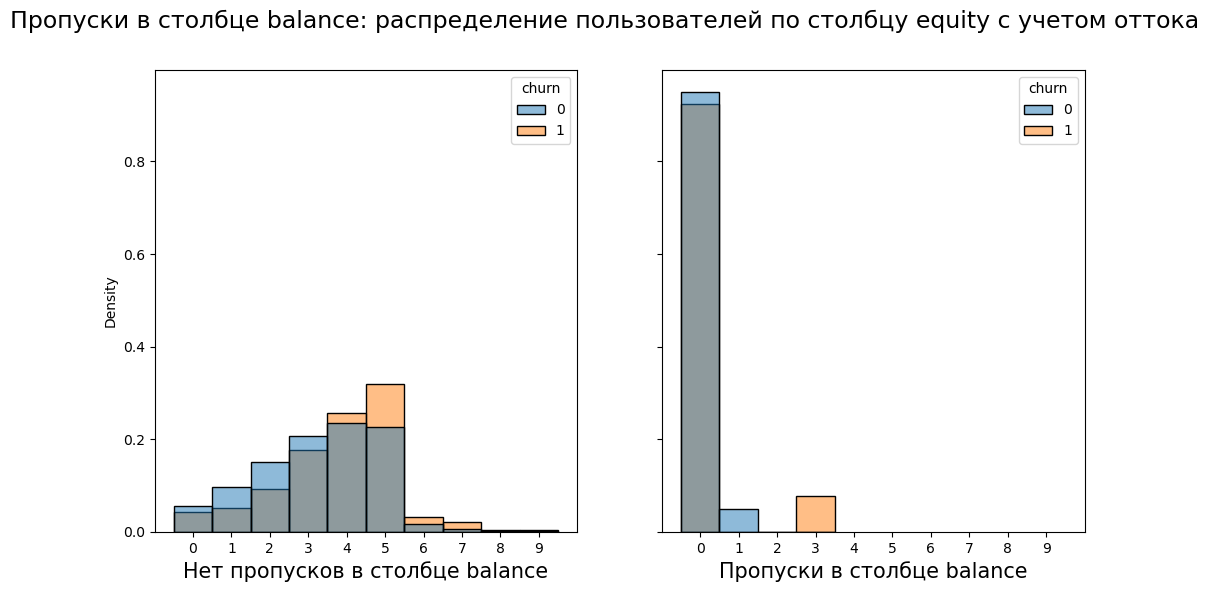

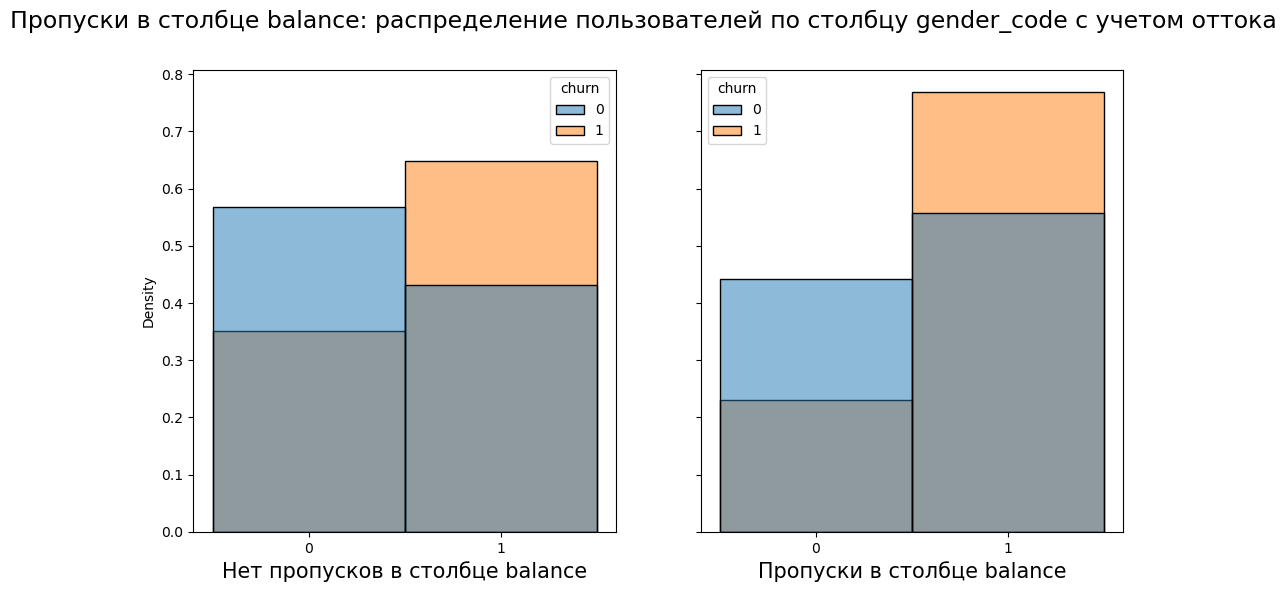

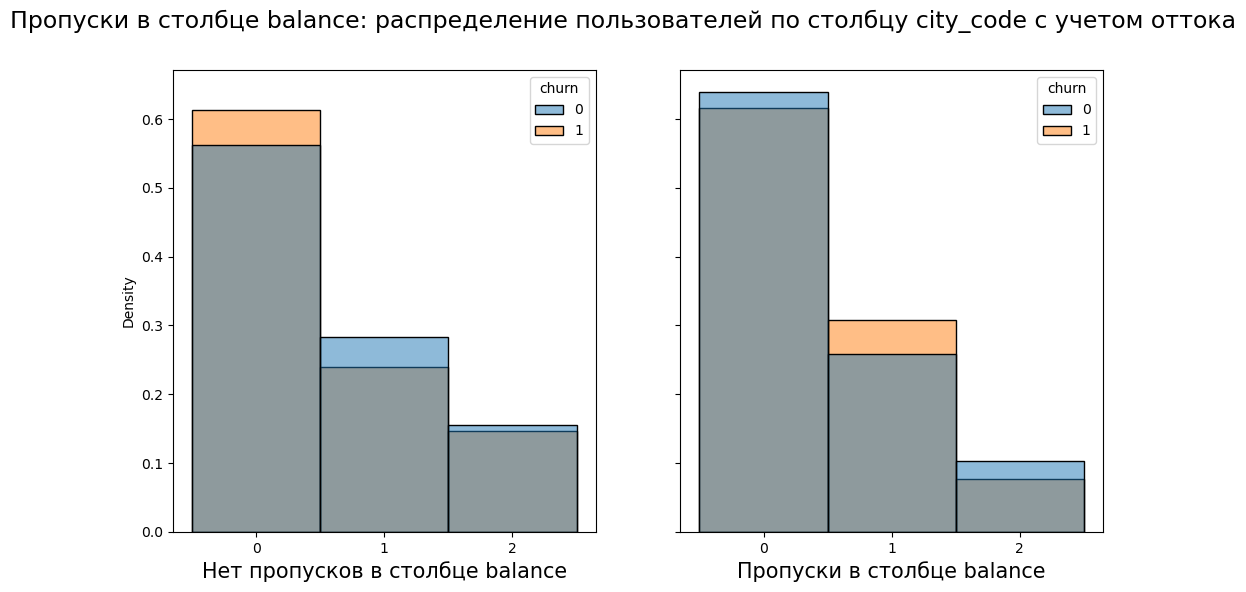

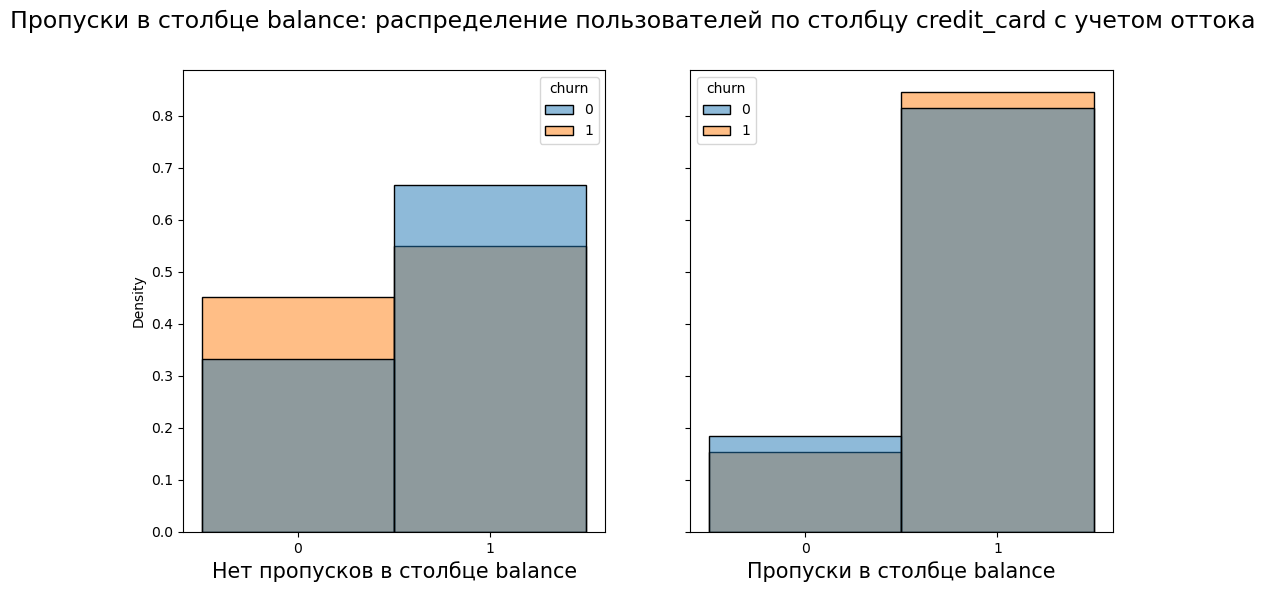

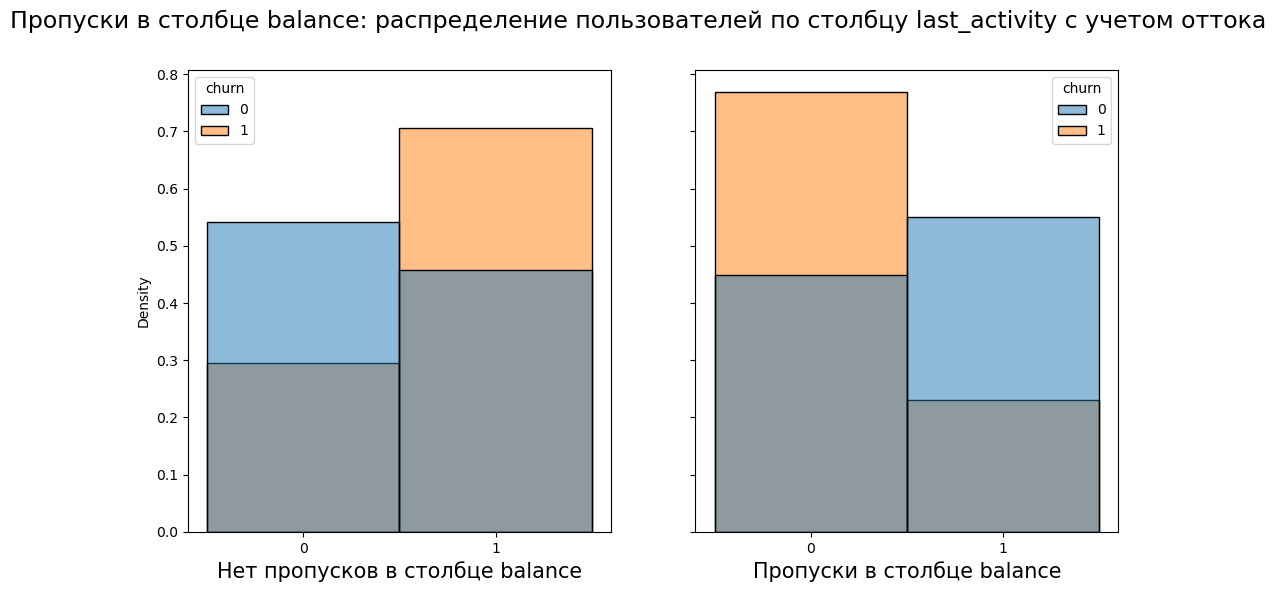

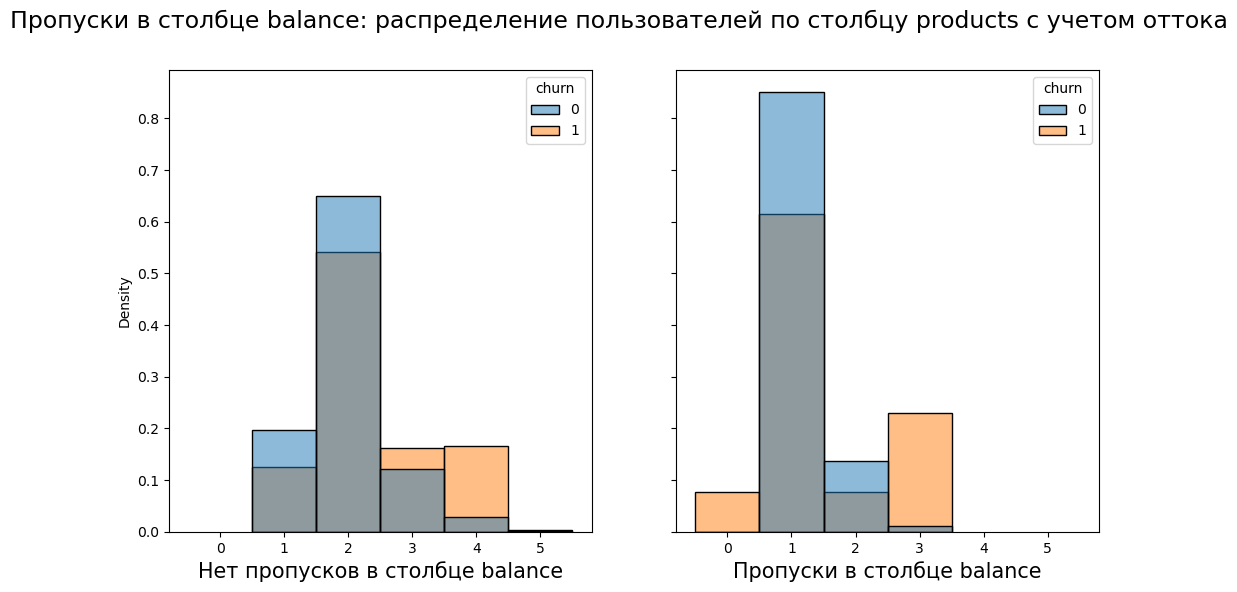

In [8]:
# Строим графики распределения значений столбцов equity, gender_code, city_code, credit_card, last_activity
# с учетом оттока по группам: слева график по записям, где нет пропуска в столбце balance, справа - по записям, где пропуск есть

for column in ['equity', 'gender_code', 'city_code', 'credit_card', 'last_activity', 'products']:
    fig, axes = plt.subplots(1, 2, figsize=(12,6), sharey=True, sharex=True)
    fig.suptitle(f'Пропуски в столбце balance: распределение пользователей по столбцу {column} с учетом оттока', fontsize=17)
    sns.histplot(data=data, x=data.query('~balance.isna()')[column] , ax=axes[0], hue='churn', stat='density', common_norm=False, discrete=True)
    axes[0].set_xlabel('Нет пропусков в столбце balance', fontsize=15)
    sns.histplot(data=data, x=data.query('balance.isna()')[column] ,  ax=axes[1], hue='churn', stat='density', common_norm=False, discrete=True)
    axes[1].set_xlabel('Пропуски в столбце balance', fontsize=15)
    
    for i, ax in enumerate(axes):
        ax.set_xticks(range(len(data[column].unique())))

    plt.show()

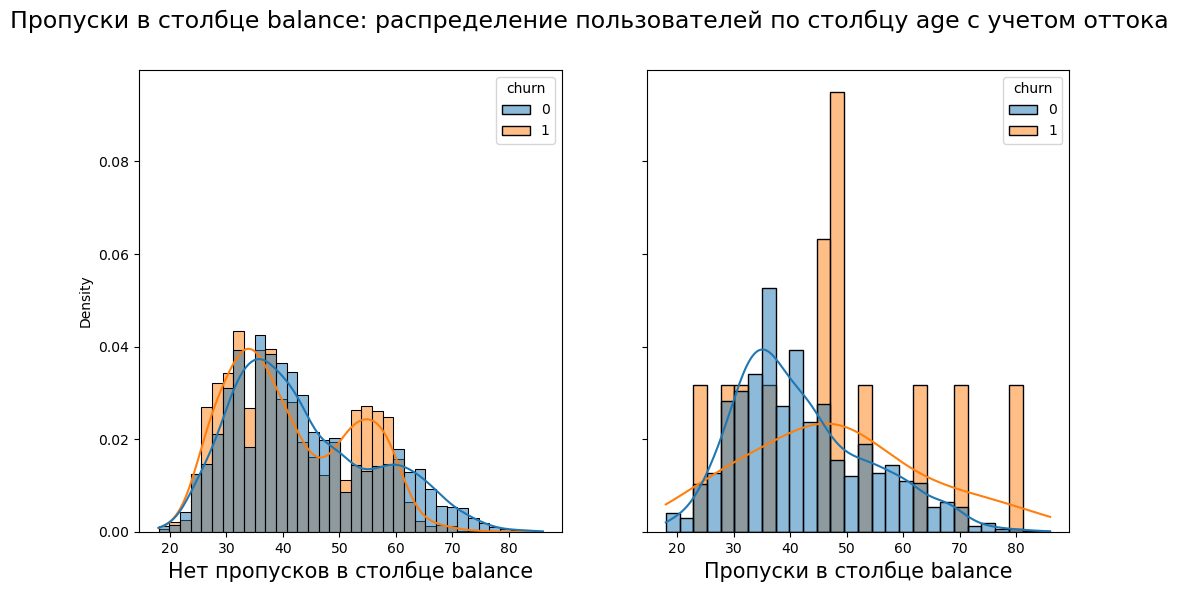

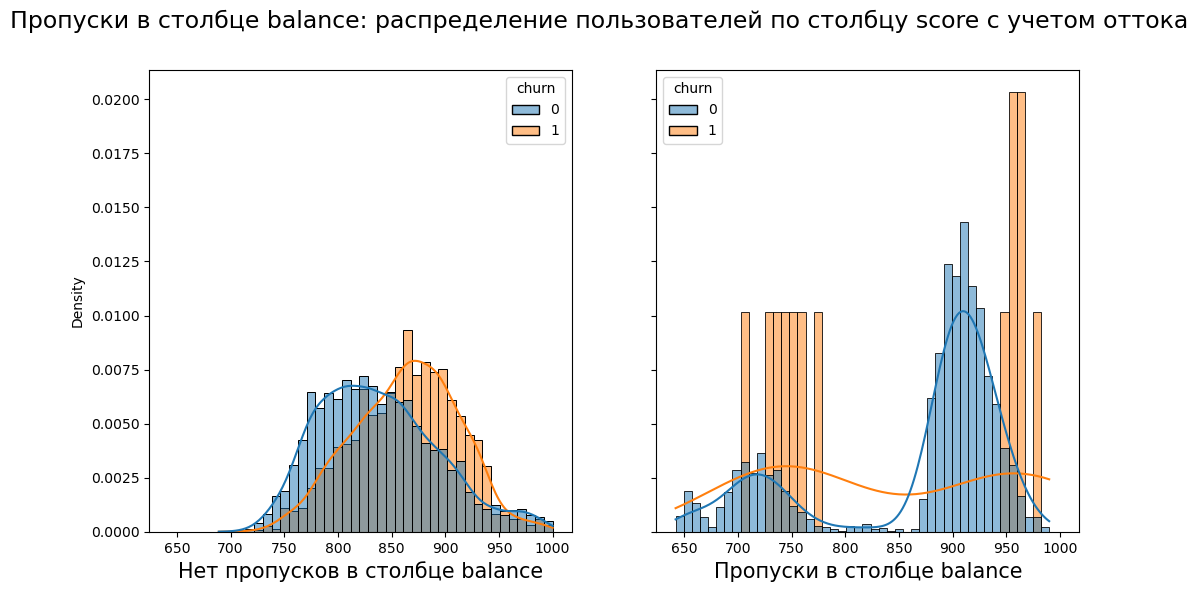

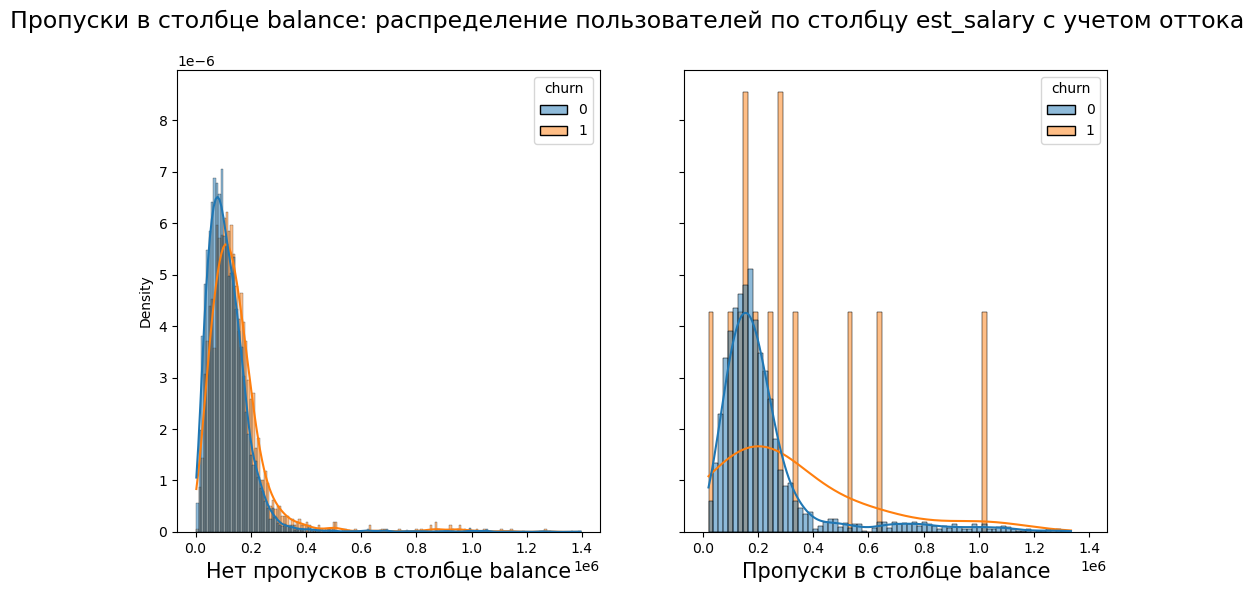

In [9]:
# Строим графики распределения значений столбцов age, score,  est_salary
# с учетом оттока по группам: слева график по записям, где нет пропуска в столбце balance, справа - по записям, где пропуск есть

for column in ['age', 'score', 'est_salary']:
    fig, axes = plt.subplots(1, 2, figsize=(12,6), sharey=True, sharex=True)
    fig.suptitle(f'Пропуски в столбце balance: распределение пользователей по столбцу {column} с учетом оттока', fontsize=17)
    sns.histplot(data=data, x=data.query('~balance.isna()')[column] , ax=axes[0], hue='churn', kde=True, stat='density', common_norm=False)
    axes[0].set_xlabel('Нет пропусков в столбце balance', fontsize=15)
    sns.histplot(data=data, x=data.query('balance.isna()')[column] ,  ax=axes[1], hue='churn', kde=True, stat='density', common_norm=False)
    axes[1].set_xlabel('Пропуски в столбце balance', fontsize=15)
    
#    for i, ax in enumerate(axes):
#        ax.set_xticks(range(len(data[column].unique())))

    plt.show()

In [10]:
# Создаем копию неочищенного датасета и удаляем пропуски в столбце age и строку (единственную), где products = 0.

data_unfiltered = data.copy()
data = data.query('~age.isna()')
data = data.query('products > 0')

***
В глаза бросается неравномерное распределение пропусков balance по значениям:
- столбца equity: больше всего пропусков у тех пользователей, у которых значение equity - 0, т.е. нет объектов собственности, которое банк рассматривает как залоговое имущество; там, где пропусков нет - распределение значений иное: пользователей со значением equity=0 мало;
- столбца gender: в группе без пропусков распределение между мужчинами и женщинами ближе к 50/50, в группе с пропусками - почти вдвое больше мужчин;
- credit_card: в группе без пропусков владельцев кредитных карт относительно больше, чем в группе с пропусками;
- столбца last_activity: в группе без пропусков пользователей с отметкой об активности больше, и они демонстируют отток, в группе с пропусками ситуация противоположная;
- столбца products: в группе без пропусков больше всего пользователей с 2 продуктами банка, в группе с пропусками больше пользователей с 1 продуктом;
- столбца age: в группе без пропусков большая часть пользователей - в диапазонах 30-40 и 50-60 лет, относительная доля оттока больше в диапазоне 50-60 лет; в группе с пропусками пользователи сосредоточены в диапазоне 30-40 лет, относительная доля оттока  начиная с 50 лет больше, чем оставшихся; кроме того, в группе с пропусками отток после 50 лет неравномерный, на графике видно несколько оттоковых "пиков";
- столбца score: в группе без пропусков распределение ближе к нормальному, большая часть значений в диапазоне 800-900 баллов, причем до 850 баллов относительная доля оставшихся выше, а после 850 - наоборот; в группе с пропусками большая часть значений в двух диапазонах 700-750 и 870-970, причем до 850 баллов относительная доля оставшихся ниже, а после 850 - наоборот;
- столбца est_salary: распределение значений между группами с/без пропусков схоже, однако в группе с пропусками на графике видно несколько оттоковых "пиков".

Таким образом, наиболее явный "перекос" между распределениями признаков в группах с пропусками и без наблюдается в столбцах equity и score. То есть, появление пропусков явно связано с кредитными параметрами клиентов.

С учетом того, что пропусков в столбце balance много относительно общего объема данных, их удаление приведет к искажению результатов анализа. Заполнить их синтетическими значениями, с учетом того, сколько признаков может влиять на эти значения, полагаем нецелесообразным. Оставим эти пропуски как есть.

Пропусков в столбце age всего 26, это 0,3%. Это количество, полагаем, несущественно для анализа такого объема данных, и углубляться в их анализ не будем. Удалим строки с пропусками в этом столбце.
***

### Выявление и анализ явных и неявных дубликатов <a id='1.5'></a>

In [11]:
# Проверим датасет на наличие полных дубликатов

data.duplicated().sum()

0

In [12]:
# Проверим дубликаты идентификаторов пользователей

data.loc[data.duplicated(subset=['userid'])]

userid  score       city gender   age  equity     balance  products  \
1583  190253  726.0  Ярославль      М  49.0       0         NaN         1   
1837  210662  896.0    Рыбинск      Ж  37.0       0         NaN         2   
2138  131419  739.0    Рыбинск      Ж  37.0       3  1307941.65         3   
2302  220816  934.0    Рыбинск      Ж  74.0       5  1294285.39         3   
2998  208081  821.0    Рыбинск      Ж  62.0       3   493608.26         2   
3039  170312  813.0    Рыбинск      Ж  47.0       3   370027.67         2   
3106  185748  912.0  Ярославль      Ж  47.0       5  1598218.98         2   
3817  211130  918.0    Рыбинск      Ж  55.0       0         NaN         2   
4186  217643  804.0    Рыбинск      Ж  40.0       2   301836.65         2   
4216  226719  903.0    Рыбинск      Ж  63.0       0         NaN         1   
4870  197364  889.0  Ярославль      М  33.0       0         NaN         2   
5197  155765  923.0    Рыбинск      М  30.0       0         NaN         1   
5420  126368  832.0    Рыбинск      Ж  33.0       0         NaN         1   
5557  143592  764.0  Ярославль      Ж  68.0       3   508919.15         2   
5569  141265  811.0    Рыбинск      Ж  33.0       3  1044316.88         2   
5570  208815  773.0  Ярославль      М  39.0       4   288110.09         2   
5705  152479  723.0  Ярославль      Ж  22.0       0         NaN         1   
5807  217619  766.0  Ярославль      М  52.0       2   218199.47         1   
5840  208738  839.0  Ярославль      М  60.0       5  1102438.37         2   
5896  120258  905.0  Ярославль      М  30.0       0         NaN         1   
6005  188957  882.0    Рыбинск      Ж  64.0       3   893392.91         3   
6756  172142  751.0    Рыбинск      Ж  69.0       3   396568.03         2   
6786  163207  838.0  Ярославль      Ж  42.0       4   652776.60         2   
7271  164676  790.0    Рыбинск      Ж  77.0       1   111202.01         1   
7487  140377  930.0    Рыбинск      Ж  34.0       5  1123967.02         1   
7542  117943  880.0  Ярославль      Ж  40.0       0         NaN         1   
7694  116540  887.0  Ярославль      Ж  38.0       0         NaN         1   
7814  210792  839.0  Ярославль      М  42.0       2   662646.97         1   
7931  191520  767.0  Ярославль      М  45.0       0         NaN         1   
8272  149365  793.0    Рыбинск      Ж  61.0       0   476496.99         2   
8364  148826  909.0    Рыбинск      Ж  32.0       0         NaN         3   
8497  227795  839.0  Ярославль      М  34.0       2   326593.14         2   
8521  210627  804.0    Рыбинск      М  30.0       2   347818.88         3   
8638  123461  934.0    Рыбинск      М  34.0       0         NaN         2   
8705  181526  895.0    Рыбинск      М  29.0       0         NaN         1   
8733  162053  786.0  Ярославль      М  29.0       4   205824.97         3   
8822  199312  911.0    Рыбинск      Ж  43.0       0         NaN         2   
9146  183510  800.0    Рыбинск      Ж  42.0       7   473293.81         2   
9175  200863  832.0  Ярославль      М  42.0       5   620064.73         2   
9267  150667  931.0  Ярославль      М  41.0       0         NaN         1   
9363  155872  714.0    Рыбинск      Ж  29.0       0         NaN         1   
9406  217826  790.0    Рыбинск      Ж  46.0       4   430414.80         2   
9504  129785  949.0  Ярославль      М  43.0       0         NaN         1   
9508  160075  824.0    Рыбинск      Ж  57.0       3   355047.33         2   
9653  171751  862.0  Ярославль      М  42.0       4   481992.19         2   
9659  195884  767.0    Рыбинск      Ж  45.0       1   335652.56         3   
9775  124450  758.0    Рыбинск      Ж  36.0       0    73574.07         2   
9785  168998  895.0    Рыбинск      М  44.0       0   282653.53         3   
9880  217412  886.0  Ярославль      Ж  35.0       3  1026172.14         2   
9970  175730  816.0    Рыбинск      М  36.0       4   477892.07         3   

      credit_card  last_activity  est_salary  churn  gender_code  city_code  \

In [13]:
data.loc[data.duplicated(subset=['userid', 'city'])]

Empty DataFrame
Columns: [userid, score, city, gender, age, equity, balance, products, credit_card, last_activity, est_salary, churn, gender_code, city_code, Ростов, Рыбинск, Ярославль]
Index: []

In [14]:
# Проверяем относительное количество дубликатов в идентификаторах пользователей

print(f"Записи с дубликатами идентификаторов пользователей составляют {len(data.loc[data.duplicated(subset=['userid'])]) / len(data):.2%} всего датасета")

Записи с дубликатами идентификаторов пользователей составляют 0.50% всего датасета


***
Обнаружено 73 дублированных идентификатора пользователей (это 0,5% датасета), при этом все они разбросаны по разным филиалам банка. Можно предположить, что это связано с тем, что одни и те же люди, обслуживавшиеся в разных филиалах банка, при формировании общего датасета задвоились. Поскольку таких дубликатов немного, удалим их. 
***

In [15]:
# Удаляем дубликаты в идентификаторах пользователей

data_unfiltered = data.copy()
data = data.drop_duplicates(subset=['userid']).reset_index(drop=True)

In [16]:
data.tail(5)

userid  score       city gender   age  equity     balance  products  \
9918  120553  814.0    Рыбинск      М  27.0       1    78144.65         1   
9919  139170  894.0  Ярославль      М  46.0       0         NaN         1   
9920  115639  903.0  Ярославль      М  24.0       0         NaN         2   
9921  148700  777.0  Ярославль      Ж  68.0       3   865457.97         3   
9922   96267  828.0    Рыбинск      Ж  58.0       3  1180886.70         4   

      credit_card  last_activity  est_salary  churn  gender_code  city_code  \
9918            0              1    18943.64      0            1          1   
9919            1              0   196898.29      0            1          0   
9920            1              1   108905.09      0            1          0   
9921            0              1    86874.90      0            0          0   
9922            0              1    21422.37      0            0          1   

      Ростов  Рыбинск  Ярославль  
9918       0        1          0  
9919       0        0          1  
9920       0        0          1  
9921       0        0          1  
9922       0        1          0

### Выявление и анализ выбросов <a id='1.6'></a>

In [17]:
# Создаем функцию, которая выводит на экран математическую информацию о наборе значений столбца, 95-97-99 перцентилях и график "ящик с усами"

def outliers(column):
    print(f'Распределение значений столбца {column}')
    print()
    print(data[column].describe().astype(int))
    print()
    print(f'Значения 95, 97 и 99 перцентилей для значений столбца {column}: {np.nanpercentile(data[column], [95, 97, 99])}')
    fig, axes = plt.subplots(2, 1, figsize=(14,10), sharex=True, gridspec_kw={'height_ratios': [1, 8]})
    sns.boxplot(data=data, x=data[column], ax=axes[0], orient='h', color='coral')
    sns.histplot(data=data, x=data[column], kde=True)
    plt.ticklabel_format(style='plain')
    plt.xlabel(f'Значения столбца {column}')
    plt.ylabel('Количество значений')
    plt.show();

Распределение значений столбца score

count    9923
mean      848
std        65
min       642
25%       802
50%       853
75%       900
max      1000
Name: score, dtype: int32

Значения 95, 97 и 99 перцентилей для значений столбца score: [946. 959. 978.]


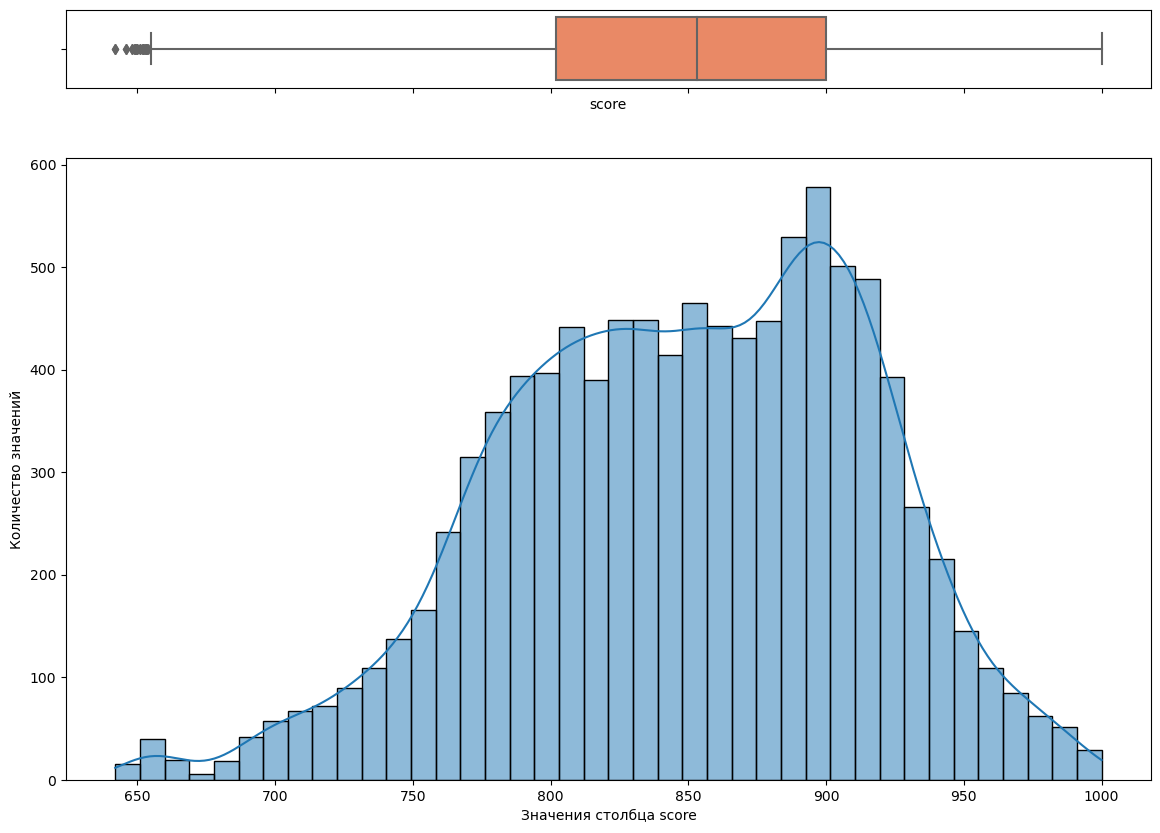

Распределение значений столбца age

count    9923
mean       42
std        12
min        18
25%        33
50%        40
75%        51
max        86
Name: age, dtype: int32

Значения 95, 97 и 99 перцентилей для значений столбца age: [65. 68. 73.]


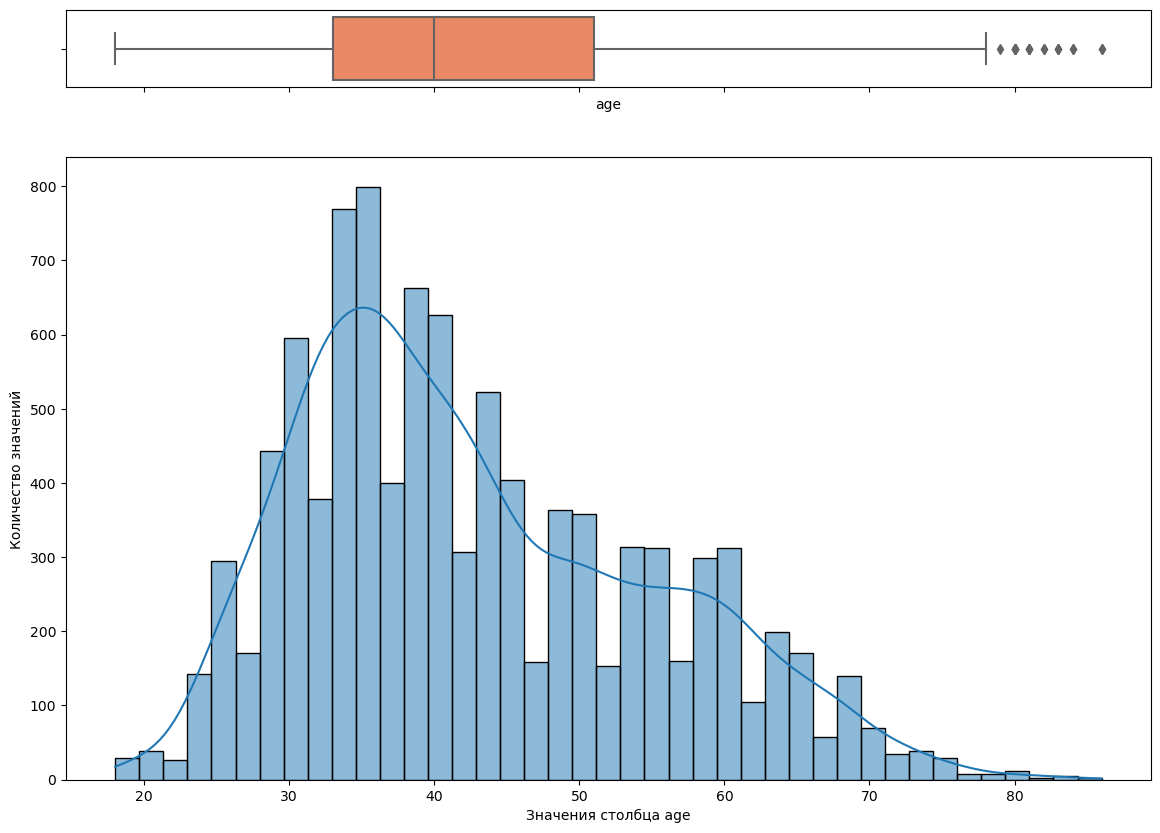

Распределение значений столбца balance

count         7664
mean        828206
std        1984121
min              0
25%         295526
50%         524927
75%         980753
max      119113552
Name: balance, dtype: int32

Значения 95, 97 и 99 перцентилей для значений столбца balance: [2120139.6665 2823289.6293 4827291.1855]


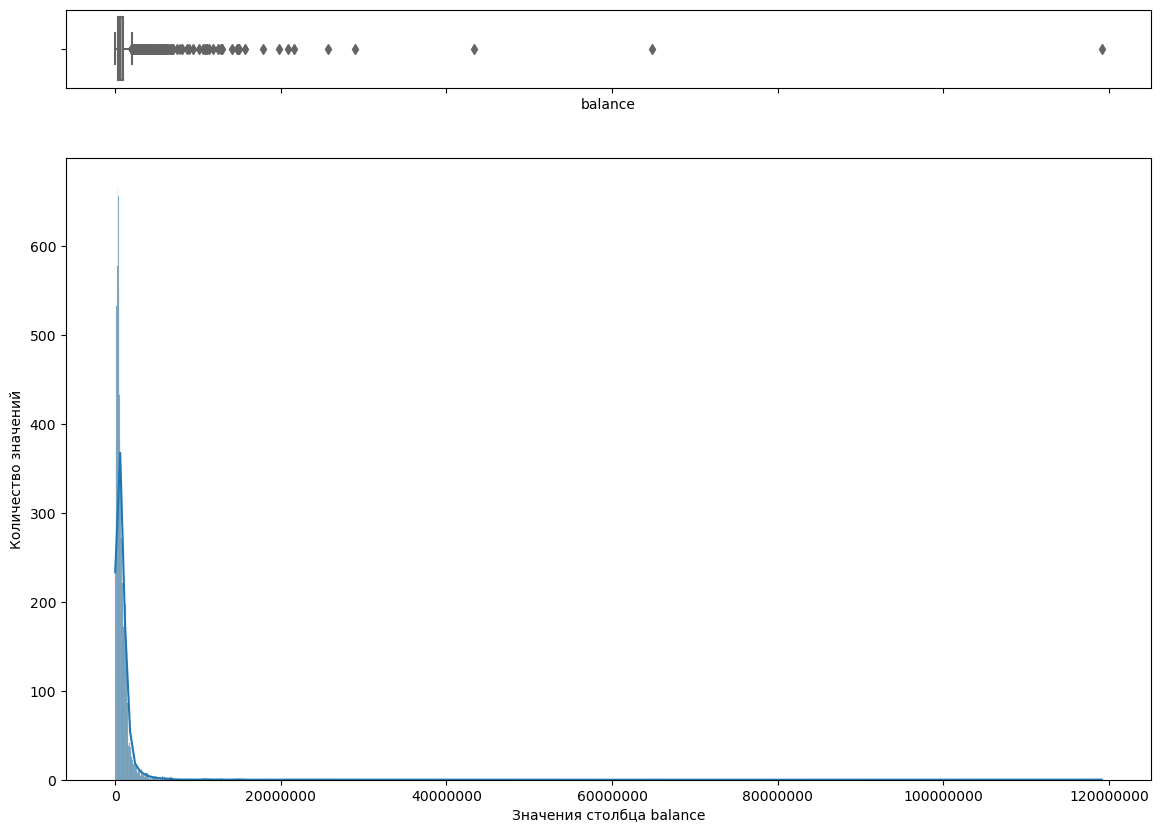

Распределение значений столбца est_salary

count       9923
mean      147892
std       139359
min         2546
25%        75255
50%       119719
75%       174673
max      1395064
Name: est_salary, dtype: int32

Значения 95, 97 и 99 перцентилей для значений столбца est_salary: [316840.891  453386.2902 887402.8986]


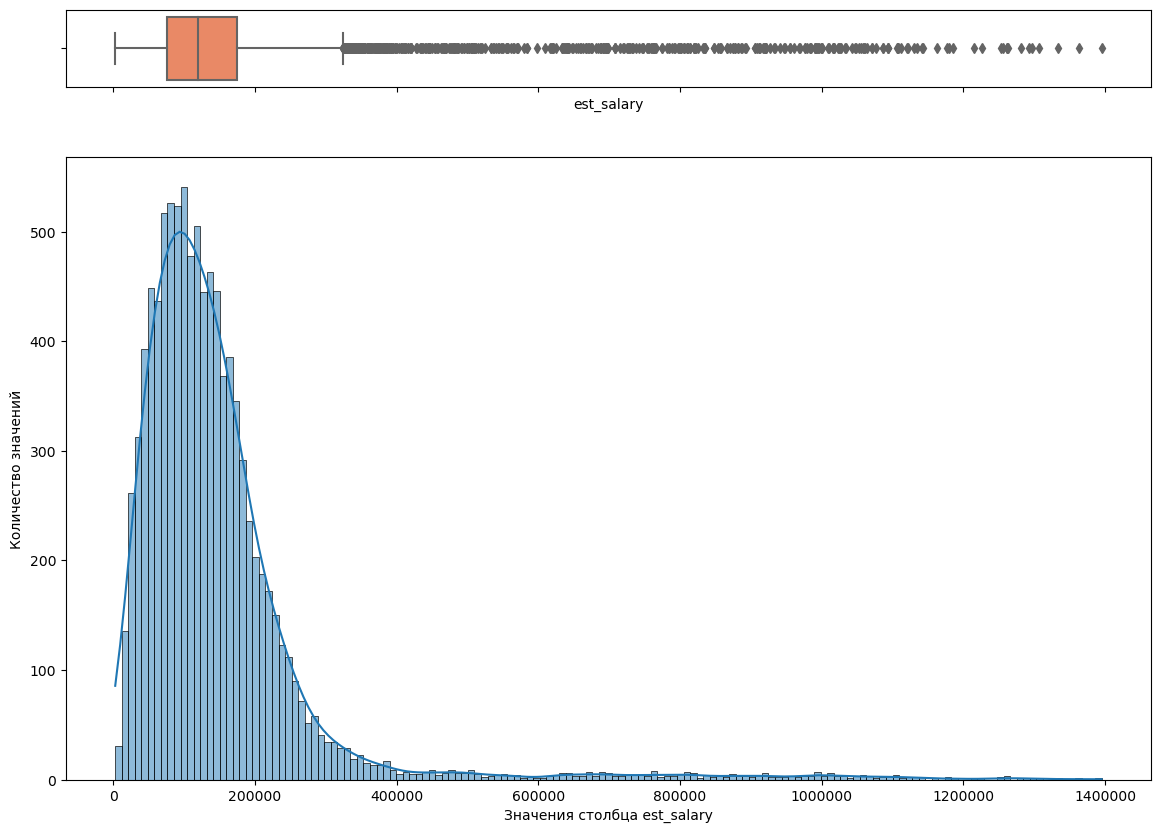

In [18]:
for col in ['score', 'age', 'balance', 'est_salary']:
    outliers(col)

***
Явные выбросы, которые могут исказить анализ, обнаружены только в столбцах balance и est_salary. Удаляем их по 99-му перцентилю.

Можно предположить, что значения столбца est_salary формируются алгоритмом, который анализирует более-менее регулярные поступления на счёт, схожие с зачислением зарплаты. Достоверно установить, что поступление является именно зарплатой, банк может в случае, если подключена услуга "зарплатный проект", но, очевидно, далеко не все клиенты банка пользуются такой услугой. Поэтому в данный столбец могут попасть и другие регулярные поступления - в частности, пособия, алименты, либо регулярные переводы самому себе из других банков. В этой связи полагаем, что к очистке выбросов в данном столбце следует подходить с осторожностью: регулярные поступления могут сильно отличаться размером от "средней зарплаты" как в меньшую, так и в большую сторону.
***

In [19]:
# Удаляем выбросы в столбцах balance и est_salary по 99-му перцентилю
balance_99 = np.nanpercentile(data.balance, 99)
est_salary_99 = np.nanpercentile(data.est_salary, 99)
data = data.query('(balance < @balance_99) | (balance.isna())')
data = data.query('est_salary < @est_salary_99')

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9767 entries, 0 to 9922
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   userid         9767 non-null   int64  
 1   score          9767 non-null   float64
 2   city           9767 non-null   object 
 3   gender         9767 non-null   object 
 4   age            9767 non-null   float64
 5   equity         9767 non-null   int64  
 6   balance        7571 non-null   float64
 7   products       9767 non-null   int64  
 8   credit_card    9767 non-null   int64  
 9   last_activity  9767 non-null   int64  
 10  est_salary     9767 non-null   float64
 11  churn          9767 non-null   int64  
 12  gender_code    9767 non-null   int64  
 13  city_code      9767 non-null   int64  
 14  Ростов         9767 non-null   uint8  
 15  Рыбинск        9767 non-null   uint8  
 16  Ярославль      9767 non-null   uint8  
dtypes: float64(4), int64(8), object(2), uint8(3)
memory 

In [21]:
# Проверяем, сколько всего потеряно записей в ходе очистки

print(f'В результате очистки данных потеряно {(len(data_unfiltered) - len(data)) / len(data_unfiltered):.2%} записей')

В результате очистки данных потеряно 2.07% записей


### Форматирование столбцов <a id='1.7'></a>

In [22]:
# Приводим формат значений столбцов credit_card, churn и last_activity к булеву типу, а age - к целочисленному

#data['credit_card'] = data['credit_card'].astype(bool)
#data['last_activity'] = data['last_activity'].astype(bool)
data['churn'] = data['churn'].astype(bool)
data['age'] = data['age'].astype(int)

In [23]:
# Выводим информацию об обработанном датасете на экран

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9767 entries, 0 to 9922
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   userid         9767 non-null   int64  
 1   score          9767 non-null   float64
 2   city           9767 non-null   object 
 3   gender         9767 non-null   object 
 4   age            9767 non-null   int32  
 5   equity         9767 non-null   int64  
 6   balance        7571 non-null   float64
 7   products       9767 non-null   int64  
 8   credit_card    9767 non-null   int64  
 9   last_activity  9767 non-null   int64  
 10  est_salary     9767 non-null   float64
 11  churn          9767 non-null   bool   
 12  gender_code    9767 non-null   int64  
 13  city_code      9767 non-null   int64  
 14  Ростов         9767 non-null   uint8  
 15  Рыбинск        9767 non-null   uint8  
 16  Ярославль      9767 non-null   uint8  
dtypes: bool(1), float64(3), int32(1), int64(7), object(2

In [24]:
# Выводим первые строки обработанного датасета на экран

data.head(5)

userid  score       city gender  age  equity     balance  products  \
0  183012  850.0    Рыбинск      Ж   25       1    59214.82         2   
1  146556  861.0    Рыбинск      Ж   37       5   850594.33         3   
2  120722  892.0    Рыбинск      Ж   30       0         NaN         1   
3  225363  866.0  Ярославль      Ж   51       5  1524746.26         2   
4  157978  730.0  Ярославль      М   34       5      174.00         1   

   credit_card  last_activity  est_salary  churn  gender_code  city_code  \
0            0              1    75719.14   True            0          1   
1            1              0    86621.77  False            0          1   
2            1              1   107683.34  False            0          1   
3            0              1   174423.53   True            0          0   
4            1              0    67353.16   True            1          0   

   Ростов  Рыбинск  Ярославль  
0       0        1          0  
1       0        1          0  
2       0        1          0  
3       0        0          1  
4       0        0          1

### Промежуточные выводы по разделу 1 <a id='1.8'></a>

Первоначально датасет состоял из 10000 записей, были пропуски в столбцах balance и age.
В ходе предобработки были скорректированы (приведены к нижнему регистру) названия столбцов, удалены записи с пропусками в столбце в возрастом, а также записи, содаржавшие дубликаты в идентификаторах.

В результате очистки данных потеряно 2.07% записей. Обработанный датасет содержит 9767 записей, пропуски только в столбце balance.

## Исследовательский анализ данных <a id='2'></a>

### Анализ распределения пользователей по городам, наличию кредитной карты, активности и полу <a id='2.1'></a>

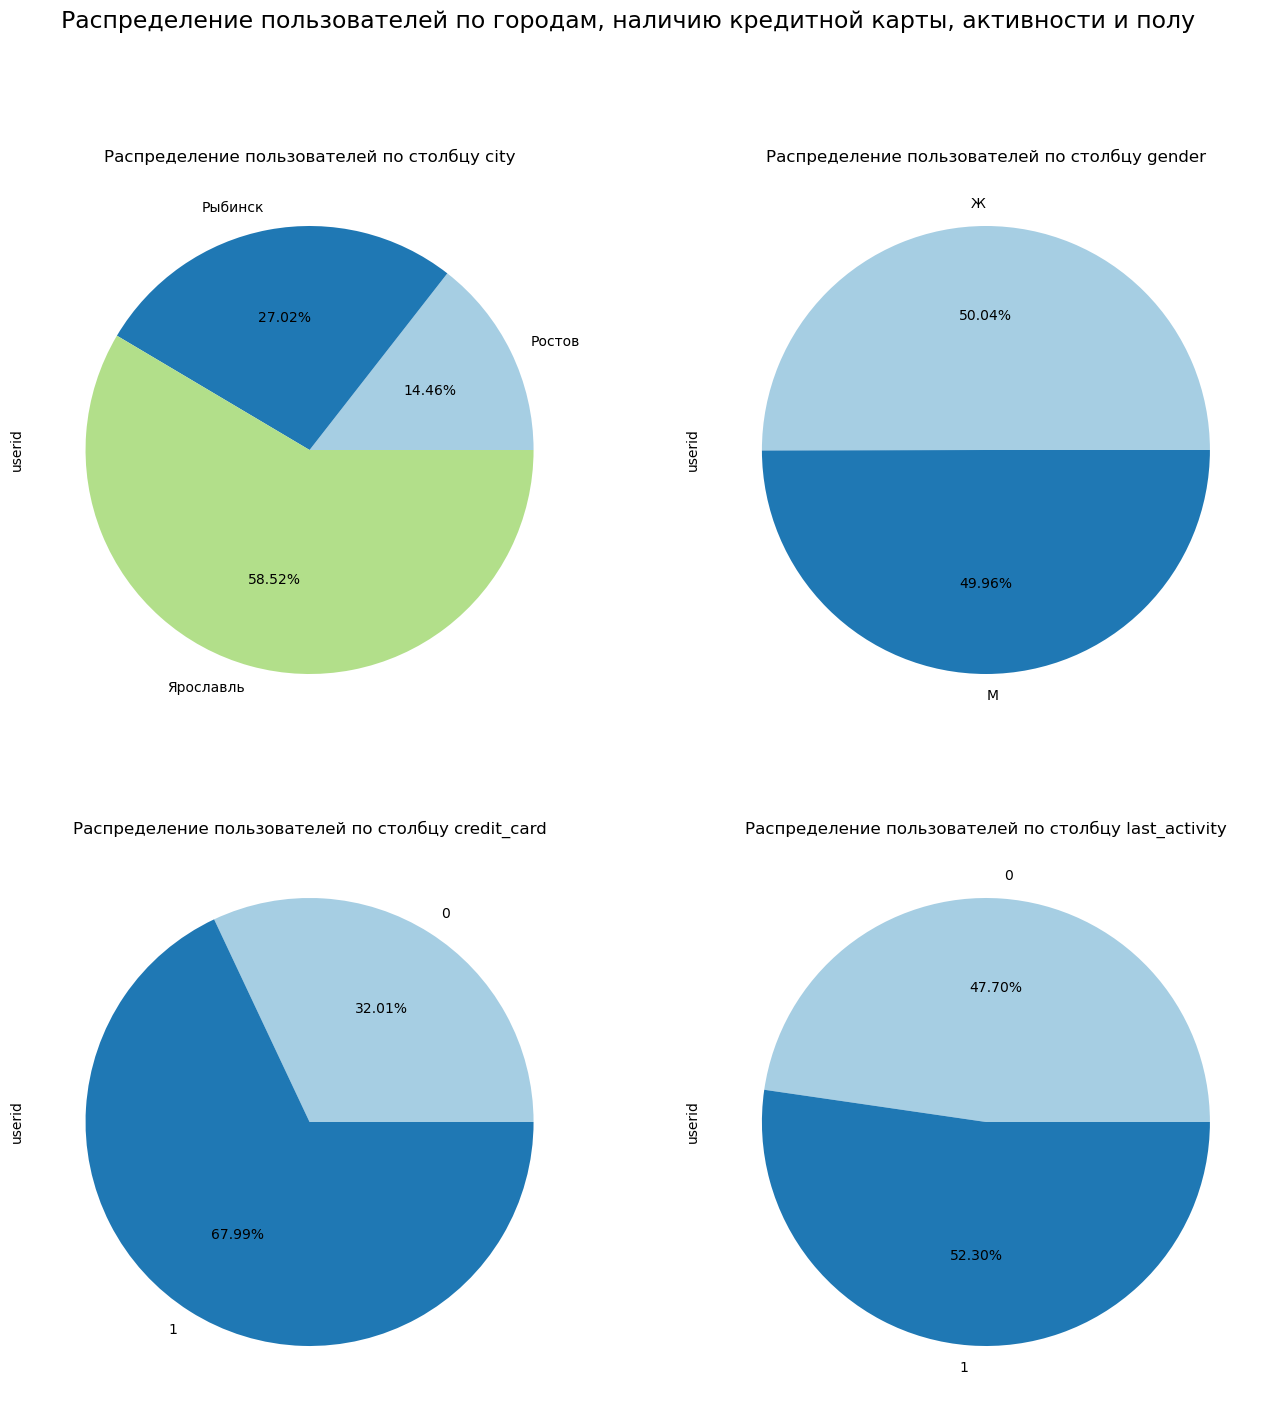

In [25]:
# Строим круговые диаграммы распределения

current_palette = sns.color_palette("Paired")

fig, ax = plt.subplots(figsize=(16,16), nrows=2, ncols=2)
fig.suptitle('Распределение пользователей по городам, наличию кредитной карты, активности и полу', fontsize=17)

for i, column in enumerate(['city', 'gender', 'credit_card', 'last_activity']):
    plt.subplot(2, 2, i+1)
    (data.groupby(column, as_index=True)['userid'].count()
    .plot(kind='pie', subplots=True, figsize=(8, 8), autopct='%1.2f%%', colors=current_palette))
    plt.title(f'Распределение пользователей по столбцу {column}');

***
- по полу клиенты банка в датасете распределены практически поровну, причем женщин чуть больше (50,04%) чем  мужчин (49,96%);
- больше всего клиентов - из филиала в Ярославле (58,52%), далее идет Рыбинск (27,02%) и Ростов (14,46%); эти пропорции близки к соотношению населения этих городов, что выглядит закономерно;
- у 68% клиентов есть кредитная карта;
- у всего лишь 52% клиентов стоит отметка об активности за последний период; судя по всему, это достаточно низкий показатель.
***

### Анализ распределения пользователей по оттоку <a id='2.2'></a>

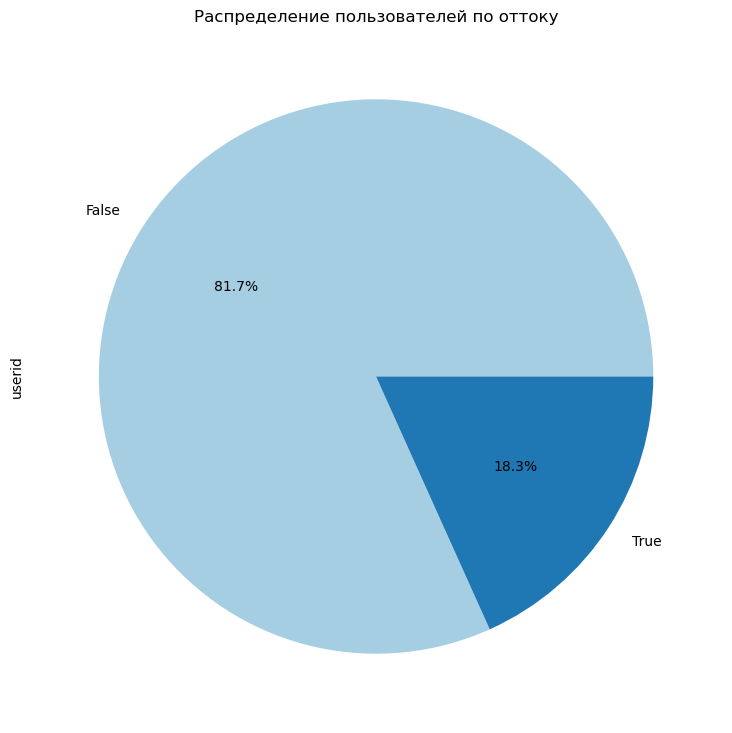

In [26]:
# Строим круговую диаграмму распределения по оттоку

(
    data.groupby('churn', as_index=True)['userid'].count()
    .plot(kind='pie', subplots=True, figsize=(9, 9), autopct='%1.1f%%', colors=current_palette)
)
plt.title('Распределение пользователей по оттоку');

***
Из всех пользователей в датасете ушло 18,3% клиентов.
***

### Анализ распределения пользователей по баллам кредитного скоринга, балансу на счете и оценочной заработной плате <a id='2.3'></a>

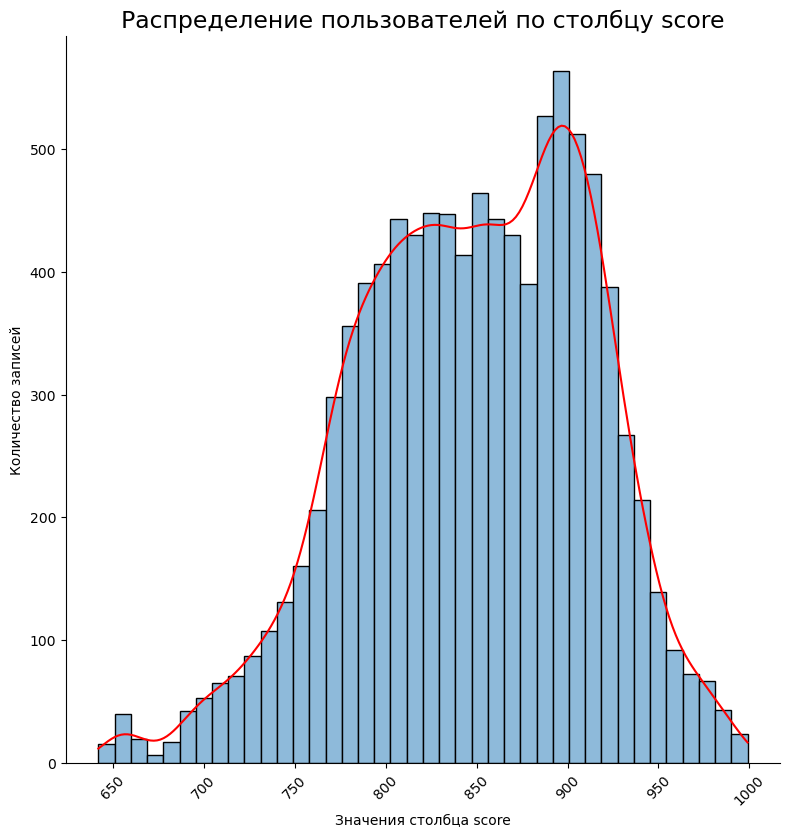

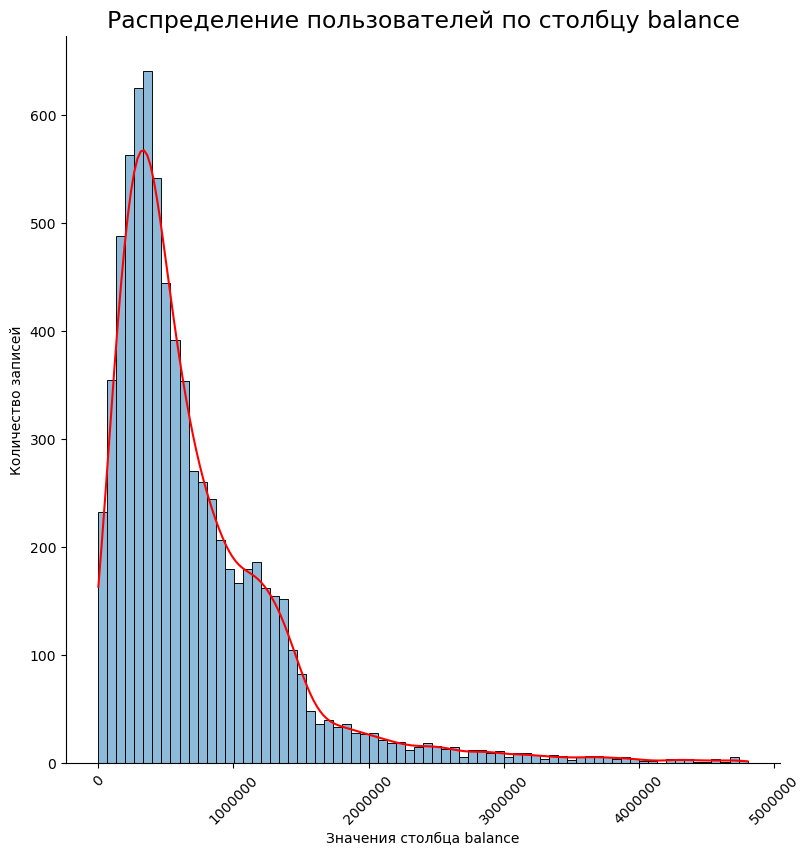

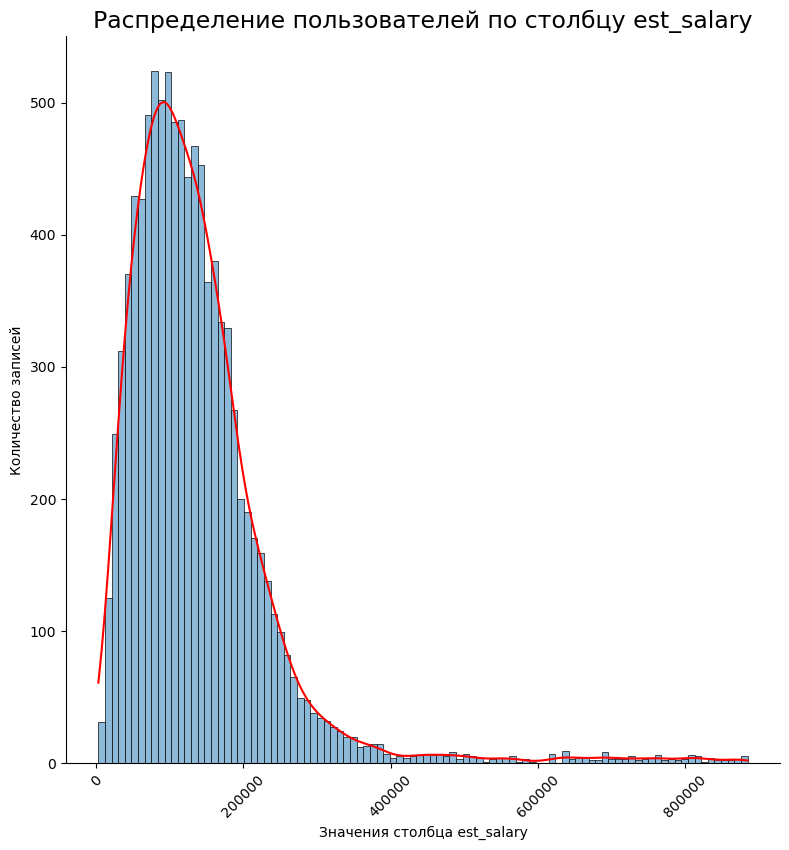

In [27]:
# Строим графики распределения

for column in ['score',  'balance', 'est_salary']:
    
    sns.displot(data=data, x=column, kde=True, color='red', facecolor="#8EBADA", height=8);
    plt.ticklabel_format(style='plain')
    plt.xticks(rotation=45)
    plt.title(f'Распределение пользователей по столбцу {column}', fontsize=17)
    plt.xlabel(f'Значения столбца {column}')
    plt.ylabel(f'Количество записей');
    plt.show()

***
- Распределение значений столбца score нормальное, есть всплеск количества пользователей с о значениями 880-920;
- Большая часть пользователей (до 75%) имеет на счете сумму в пределах 1,5 млн условных единиц; далее количество клиентов резко снижается;
- Большая часть клиентов имеет оценочную заработную плату в районе 100 тыс условных единиц.
***

### Анализ распределения пользователей по возрасту, количеству банковских продуктов и числу объектов собственности, которое банк рассматривает как залоговое имущество <a id='2.4'></a>

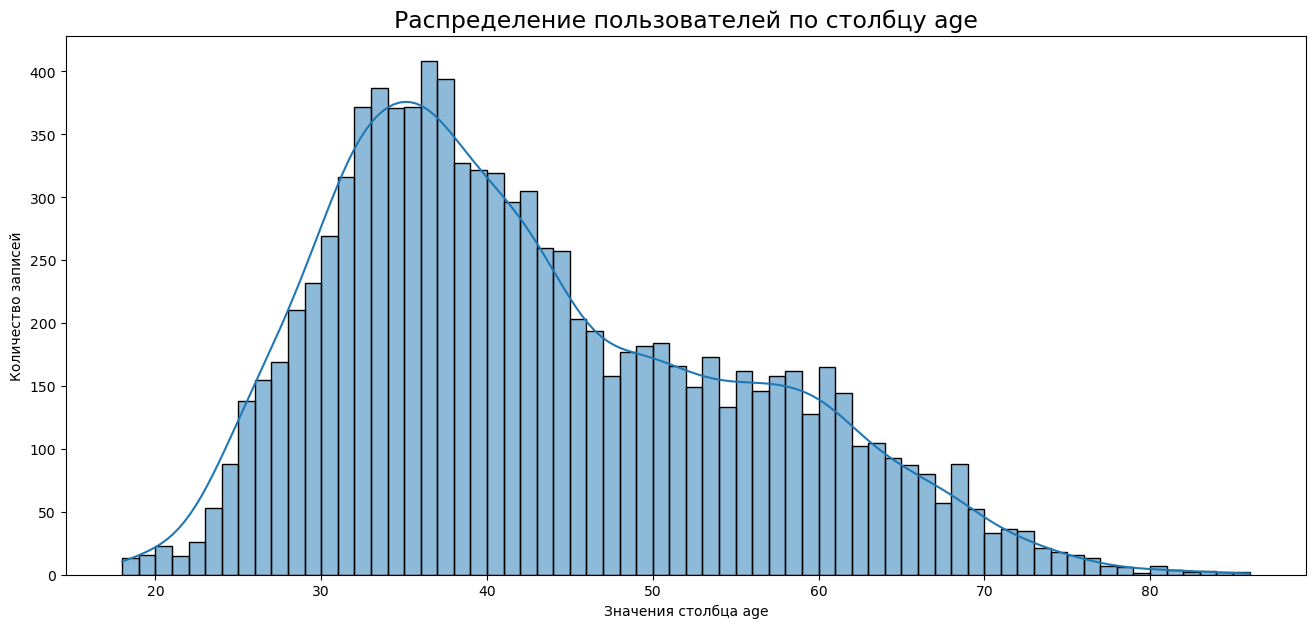

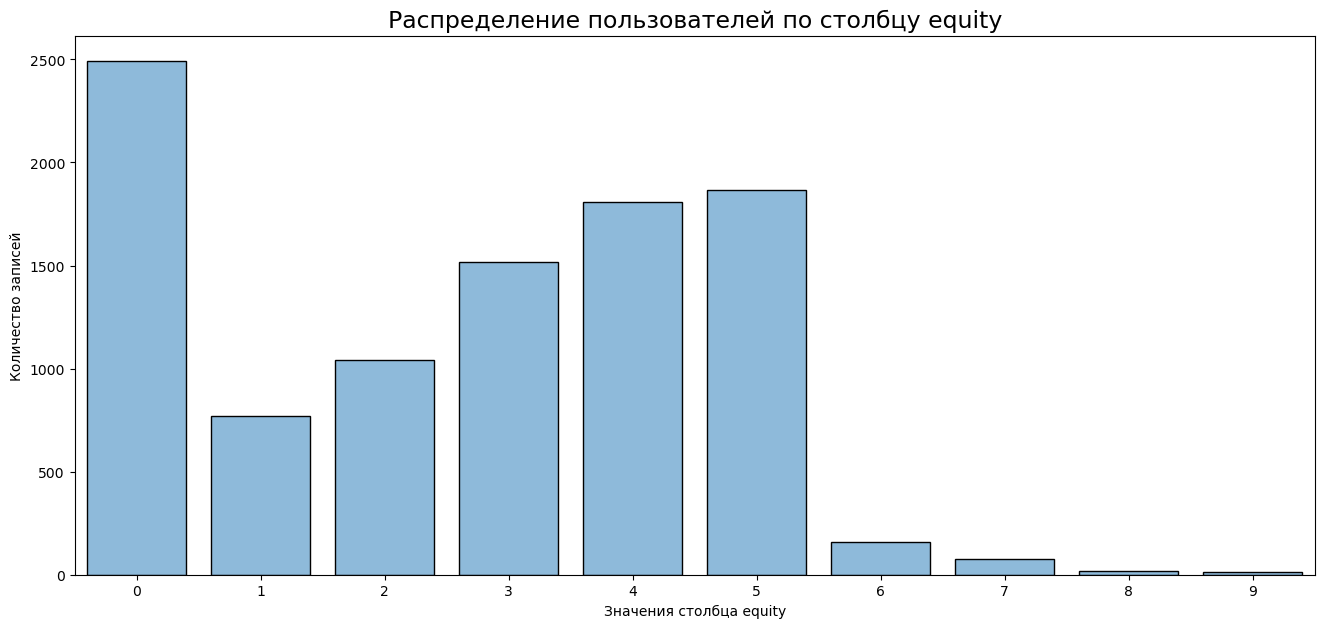

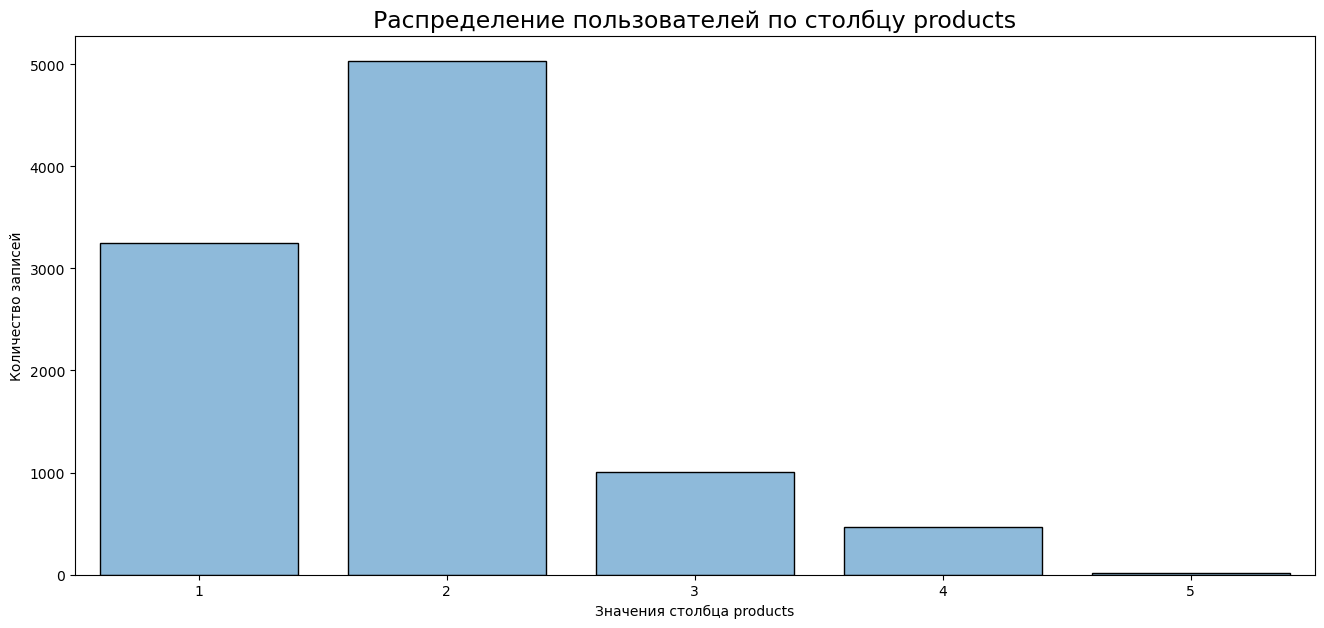

In [28]:
# Строим графики распределения

plt.figure(figsize=(16,7))
plt.title(f'Распределение пользователей по столбцу age', fontsize=17)
sns.histplot(data=data, x=data['age'], kde=True, bins=68)
plt.xlabel(f'Значения столбца age')
plt.ylabel(f'Количество записей');
plt.show()

for column in ['equity', 'products']:
    plt.figure(figsize=(16,7))
    sns.countplot(data=data, x=column, color="#8EBADA", saturation=1, edgecolor='black')
    plt.title(f'Распределение пользователей по столбцу {column}', fontsize=17)
    plt.xlabel(f'Значения столбца {column}')
    plt.ylabel(f'Количество записей');
    plt.show()

***
- Клиентов в возрасте до 25 лет относительно мало; до возраста 30 лет идет постепенный рост количества клиентов; больше всего клиентов - в возрасте 32-37 лет; количество клиентов старше 38 лет постепенно идет на спад до 45 лет; количество клиентов в диапазоне 45-61 на одном уровне; с дальнейшим повышением возраста идет постепенный спад; количество клиентов 73+ оценивается так же, как количество клиентов 18-22 года;
- По числу объектов собственности, которое банк рассматривает как залоговое имущество - количество клиентов, не имеющих заложенного имущества в банке, достаточно велико; интересно, что с увеличением количества таких объектов начиная с 1 и до 5 - растёт и количество пользователей; количество пользователей, у которых от 2 до 5 объектов собственности находится в залоге у банка, как минимум вдвое превышает количество клиентов, у которых такого имущества нет вообще; можно предположить, что банк сильно ориентирован на пользователей ипотечных и других подобных услуг;
- У большинства пользователей есть два продукта банка, на втором месте те, у кого всего один продукт; пользователи с 3+ продуктами - в меньшинстве.
***

### Анализ корреляции оттока с другими признаками пользователей банка <a id='2.5'></a>

#### Матрица корреляций на основе коэффициента Phi_K

In [29]:
# Строим матрицу корреляций на основе коэффициента Phi_K

data_phik = data.phik_matrix()
data_phik

interval columns not set, guessing: ['userid', 'score', 'age', 'equity', 'balance', 'products', 'credit_card', 'last_activity', 'est_salary', 'gender_code', 'city_code', 'Ростов', 'Рыбинск', 'Ярославль']


userid     score      city    gender       age    equity  \
userid         1.000000  0.065321  0.032469  0.059023  0.006077  0.073641   
score          0.065321  1.000000  0.084081  0.066744  0.047966  0.529225   
city           0.032469  0.084081  1.000000  0.008372  0.093804  0.055729   
gender         0.059023  0.066744  0.008372  1.000000  0.286911  0.067277   
age            0.006077  0.047966  0.093804  0.286911  1.000000  0.039028   
equity         0.073641  0.529225  0.055729  0.067277  0.039028  1.000000   
balance        0.036833  0.418107  0.077049  0.097903  0.218657  0.511716   
products       0.100428  0.422448  0.126931  0.072056  0.142709  0.582346   
credit_card    0.038426  0.207201  0.074915  0.198954  0.158815  0.215258   
last_activity  0.066067  0.046078  0.031399  0.016584  0.091490  0.050217   
est_salary     0.000000  0.376399  0.149411  0.146781  0.416560  0.306793   
churn          0.142239  0.231630  0.016058  0.218744  0.183219  0.349227   
gender_code    0.059023  0.066744  0.008372  1.000000  0.286911  0.067277   
city_code      0.032469  0.084081  1.000000  0.008372  0.093804  0.055729   
Ростов         0.043640  0.085335  1.000000  0.015133  0.068508  0.059709   
Рыбинск        0.000000  0.000000  1.000000  0.000000  0.059136  0.000000   
Ярославль      0.000000  0.073223  1.000000  0.025132  0.097846  0.046463   

                balance  products  credit_card  last_activity  est_salary  \
userid         0.036833  0.100428     0.038426       0.066067    0.000000   
score          0.418107  0.422448     0.207201       0.046078    0.376399   
city           0.077049  0.126931     0.074915       0.031399    0.149411   
gender         0.097903  0.072056     0.198954       0.016584    0.146781   
age            0.218657  0.142709     0.158815       0.091490    0.416560   
equity         0.511716  0.582346     0.215258       0.050217    0.306793   
balance        1.000000  0.267263     0.213412       0.026649    0.528437   
products       0.267263  1.000000     0.270277       0.112177    0.238984   
credit_card    0.213412  0.270277     1.000000       0.048271    0.033413   
last_activity  0.026649  0.112177     0.048271       1.000000    0.030124   
est_salary     0.528437  0.238984     0.033413       0.030124    1.000000   
churn          0.307086  0.259672     0.200689       0.258970    0.067726   
gender_code    0.097903  0.072056     0.198954       0.016584    0.146781   
city_code      0.077049  0.126931     0.074915       0.031399    0.149411   
Ростов         0.074003  0.044731     0.152093       0.000000    0.134873   
Рыбинск        0.000000  0.086638     0.077401       0.076863    0.066200   
Ярославль      0.077396  0.109903     0.179532       0.076652    0.143069   

                  churn  gender_code  city_code    Ростов   Рыбинск  Ярославль  
userid         0.142239     0.059023   0.032469  0.043640  0.000000   0.000000  
score          0.231630     0.066744   0.084081  0.085335  0.000000   0.073223  
city           0.016058     0.008372   1.000000  1.000000  1.000000   1.000000  
gender         0.218744     1.000000   0.008372  0.015133  0.000000   0.025132  
age            0.183219     0.286911   0.093804  0.068508  0.059136   0.097846  
equity         0.349227     0.067277   0.055729  0.059709  0.000000   0.046463  
balance        0.307086     0.097903   0.077049  0.074003  0.000000   0.077396  
products       0.259672     0.072056   0.126931  0.044731  0.086638   0.109903  
credit_card    0.200689     0.198954   0.074915  0.152093  0.077401   0.179532  
last_activity  0.258970     0.016584   0.031399  0.000000  0.076863   0.076652  
est_salary     0.067726     0.146781   0.149411  0.134873  0.066200   0.143069  
churn          1.000000     0.218744   0.016058  0.000000  0.043867   0.034385  
gender_code    0.218744     1.000000   0.008372  0.015133  0.000000   0.025132  
city_code      0.016058     0.008372   1.000000  1.000000  1.000000   1.000000  
Ростов         0.000000     

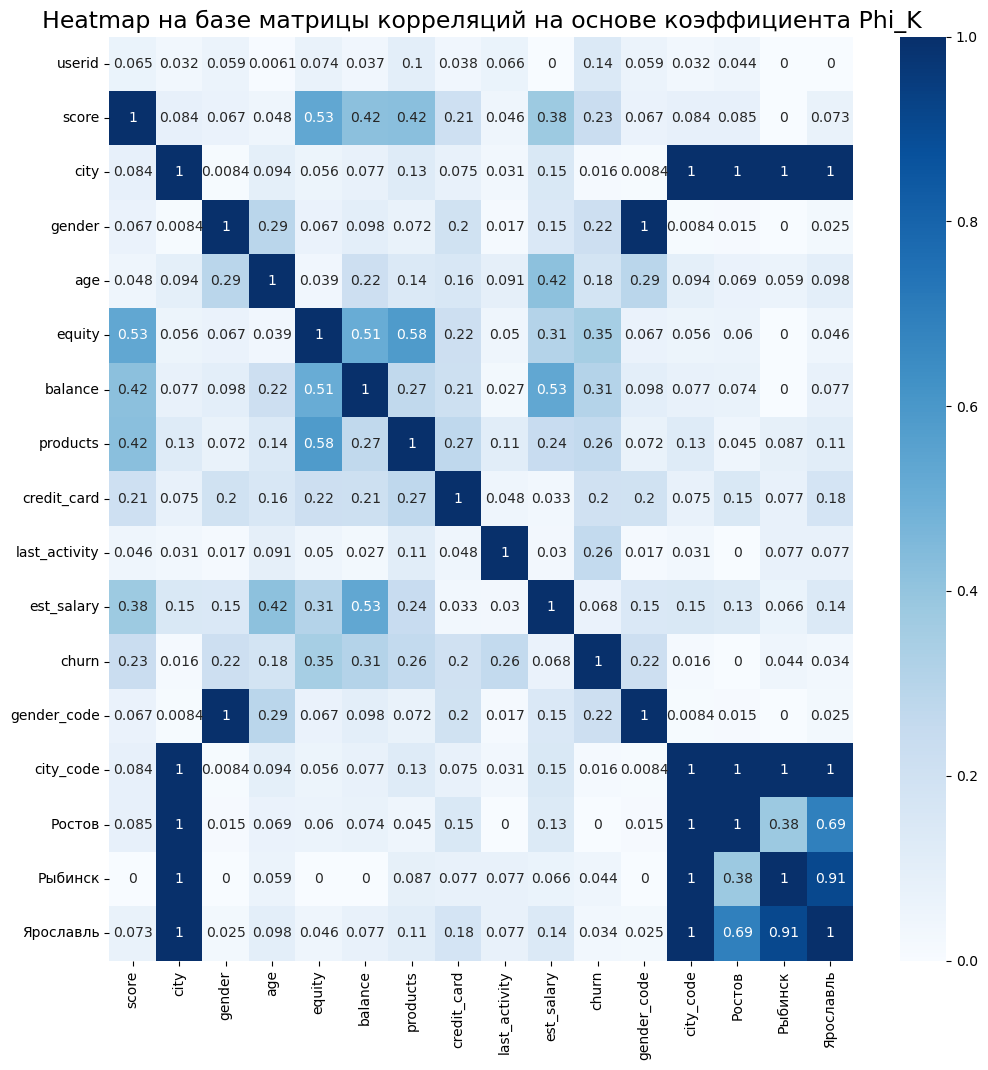

In [30]:
# Формируем heatmap на базе матрицы корреляций на основе коэффициента Phi_K

plt.figure(figsize=(12, 12)) 
sns.heatmap(data_phik.drop(['userid'], axis=1), vmin=0, vmax=1, annot=True, cmap='Blues');
plt.title(f'Heatmap на базе матрицы корреляций на основе коэффициента Phi_K', fontsize=17)
plt.show()

***
Исходя из матрицы корреляций, больше всего отток коррелирует со значениями столбцов equity (коэффициент 0,35) и balance (коэффициент 0,31), далее - products, last_activity (коэффициент 0,26), score (коэффициент 0,23), gender (коэффициент 0,22), credit_card (коэффициент 0,2).

При этом следует отметить, что даже наибольшая отмеченная корреляция невелика, коэффициент 0,35 (при том, что максимально возможный коэффициент корреляции phik - 1, а минимальный - 0).
***

#### Матрица корреляций на основе коэффициента корреляции Пирсона

In [31]:
# Создаем копию датасета и разбиваем в нем столбцы city и gender с категориальными значениями так, чтобы вместо буквенных остались
# числовые маркеры 0 и 1

data_dummies = pd.get_dummies(data, columns=['city', 'gender'], drop_first=False)
data_dummies.head(5)

userid  score  age  equity     balance  products  credit_card  \
0  183012  850.0   25       1    59214.82         2            0   
1  146556  861.0   37       5   850594.33         3            1   
2  120722  892.0   30       0         NaN         1            1   
3  225363  866.0   51       5  1524746.26         2            0   
4  157978  730.0   34       5      174.00         1            1   

   last_activity  est_salary  churn  gender_code  city_code  Ростов  Рыбинск  \
0              1    75719.14   True            0          1       0        1   
1              0    86621.77  False            0          1       0        1   
2              1   107683.34  False            0          1       0        1   
3              1   174423.53   True            0          0       0        0   
4              0    67353.16   True            1          0       0        0   

   Ярославль  city_Ростов  city_Рыбинск  city_Ярославль  gender_Ж  gender_М  
0          0            0             1               0         1         0  
1          0            0             1               0         1         0  
2          0            0             1               0         1         0  
3          1            0             0               1         1         0  
4          1            0             0               1         0         1

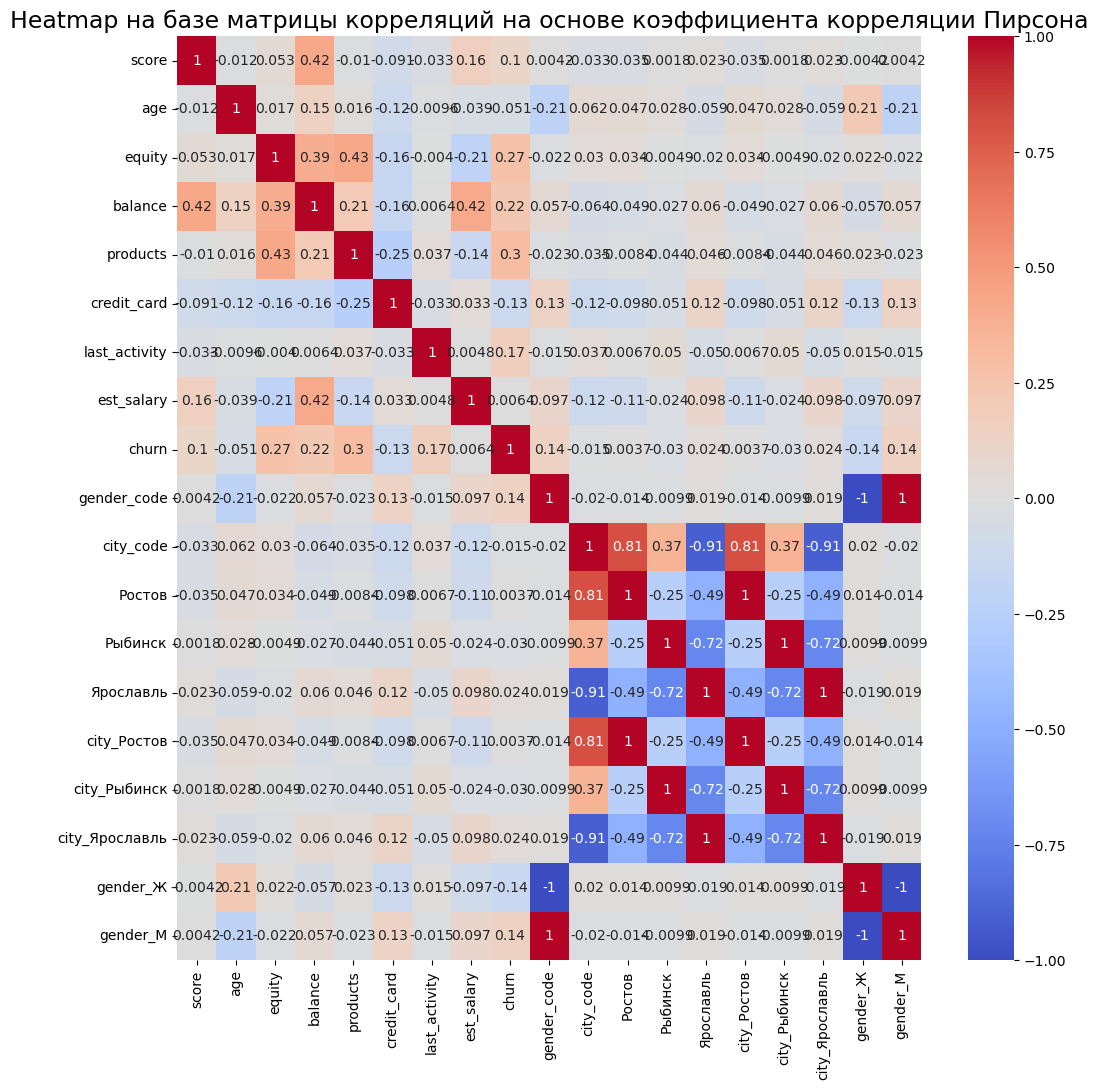

In [32]:
# Формируем heatmap на базе матрицы корреляций на основе коэффициента корреляции Пирсона

plt.figure(figsize=(12, 12)) 
sns.heatmap(data_dummies.drop(['userid'], axis=1).corr(), vmin=-1, vmax=1, annot=True, cmap='coolwarm');
plt.title(f'Heatmap на базе матрицы корреляций на основе коэффициента корреляции Пирсона', fontsize=17)
plt.show()

***
Исходя из матрицы корреляций, больше всего отток коррелирует со значениями столбцов products (коэффициент 0,3), equity (коэффициент 0,27) и balance (коэффициент 0,22), далее - last_activity (коэффициент 0,17), gender (коэффициент 0,14), credit_card (коэффициент 0,13), score (коэффициент 0,1),

При этом следует отметить, что даже наивысшая отмеченная корреляция невысока (максимальный коэффициент корреляции - 1).

Если свести воедино оба использованных метода рассчета корреляции, получится, что наиболее коррелирующие с оттоком значения - в столбцах equity, products и balance. На значения этих столбцов следует обратить наиболее пристальное внимание.

Столбцы, значения которых совсем не коррелируют с оттоком - зарплата и город, в котором расположен филиал банка.
***

### Распределение признаков с учетом оттока <a id='2.6'></a>

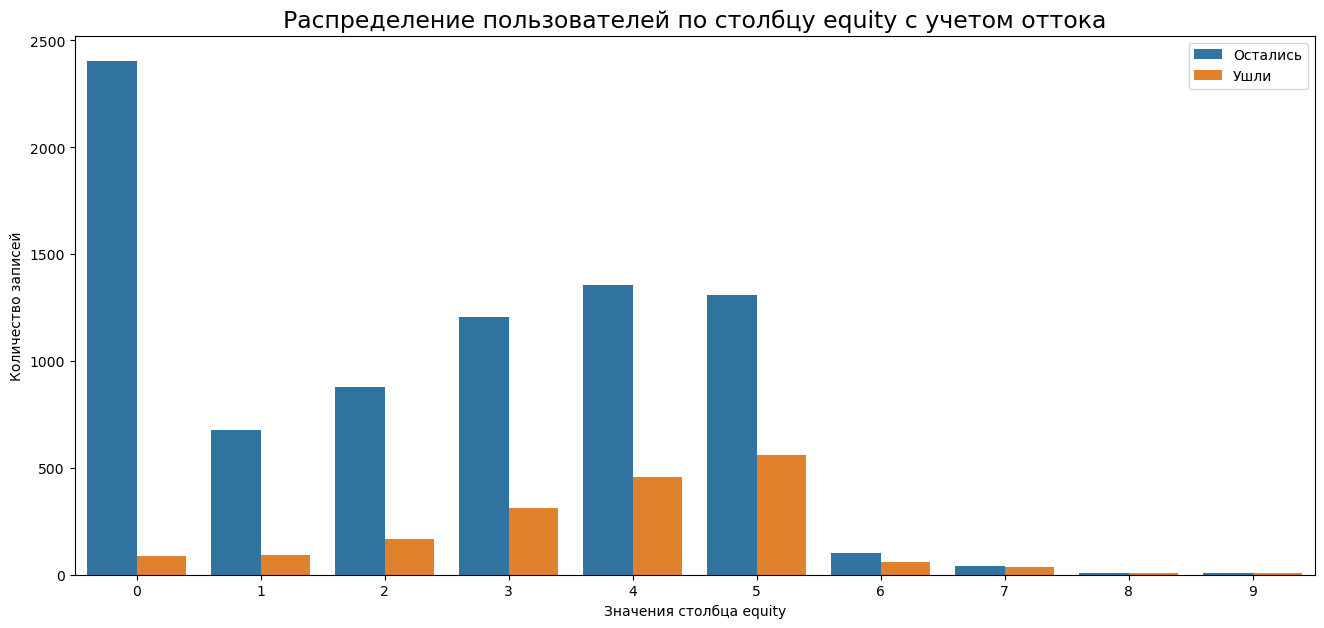

Сводная таблица c соотношением ушедших и оставшихся в столбце equity:


no_churn  churn  total  churn_ratio
equity                                     
0           2402     89   2491         0.04
1            678     93    771         0.12
2            876    166   1042         0.16
3           1204    314   1518         0.21
4           1354    456   1810         0.25
5           1308    560   1868         0.30
6            102     58    160         0.36
7             42     36     78         0.46
8             10      6     16         0.38
9              6      7     13         0.54

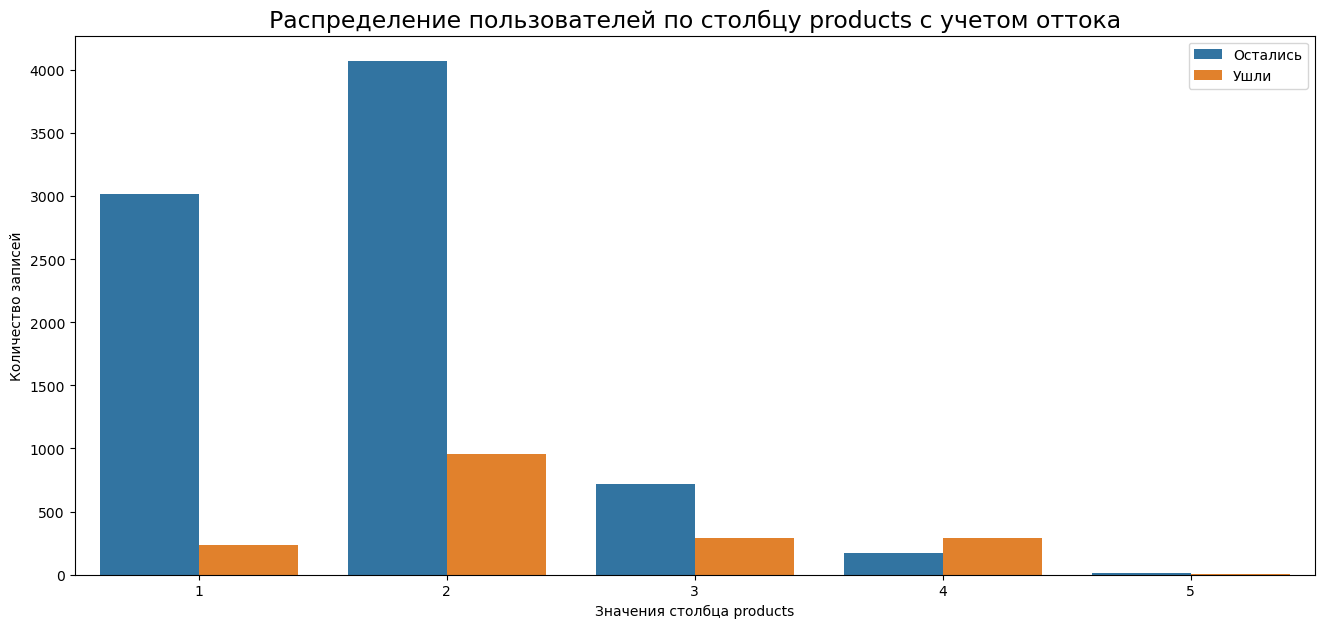

Сводная таблица c соотношением ушедших и оставшихся в столбце products:


no_churn  churn  total  churn_ratio
products                                     
1             3016    231   3247         0.07
2             4068    960   5028         0.19
3              717    293   1010         0.29
4              170    293    463         0.63
5               11      8     19         0.42

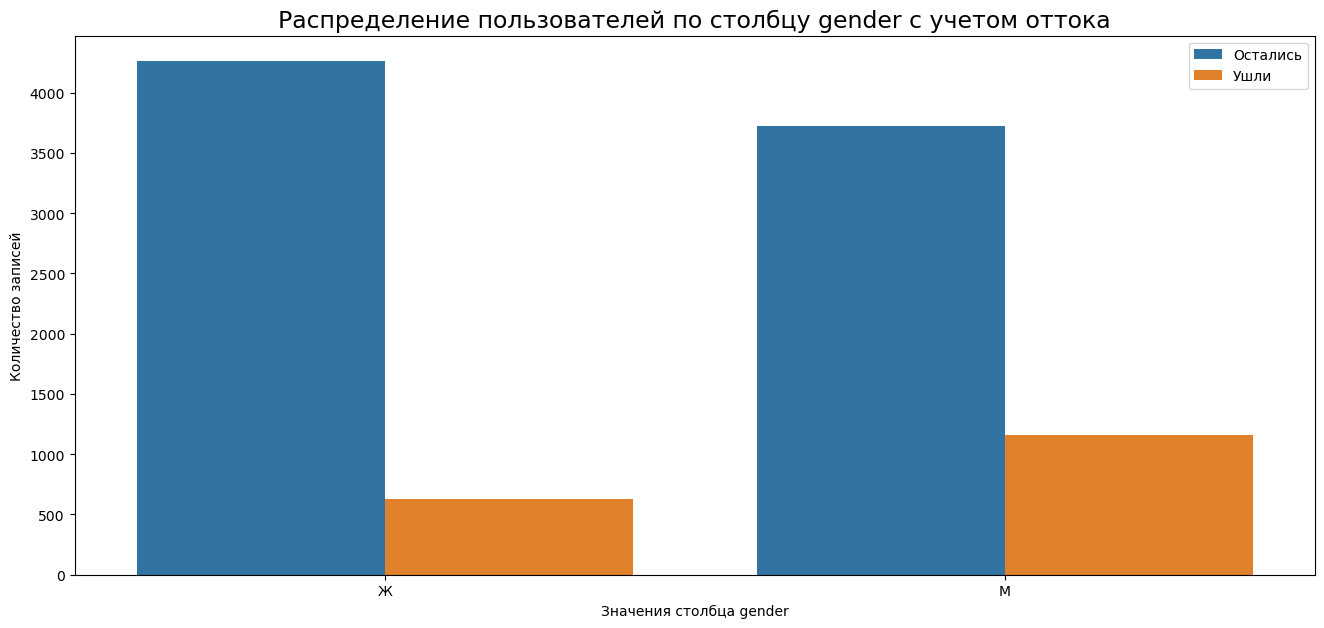

Сводная таблица c соотношением ушедших и оставшихся в столбце gender:


no_churn  churn  total  churn_ratio
gender                                     
Ж           4260    627   4887         0.13
М           3722   1158   4880         0.24

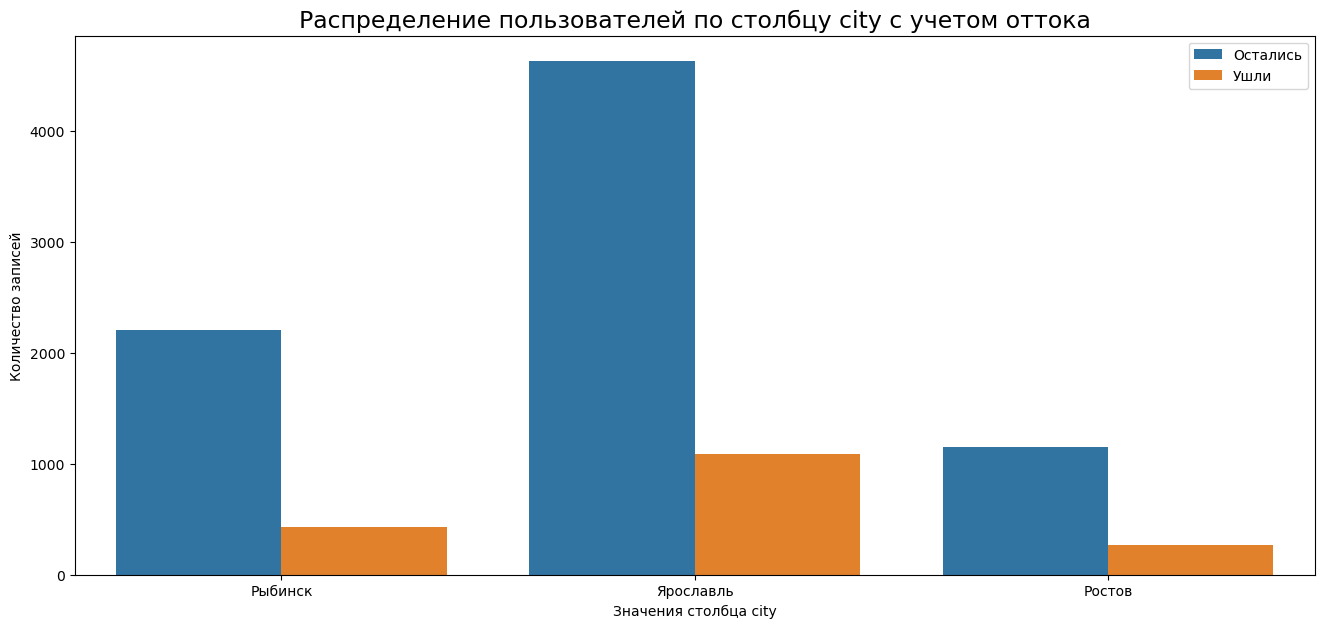

Сводная таблица c соотношением ушедших и оставшихся в столбце city:


no_churn  churn  total  churn_ratio
city                                          
Ростов         1149    263   1412         0.19
Рыбинск        2207    432   2639         0.16
Ярославль      4626   1090   5716         0.19

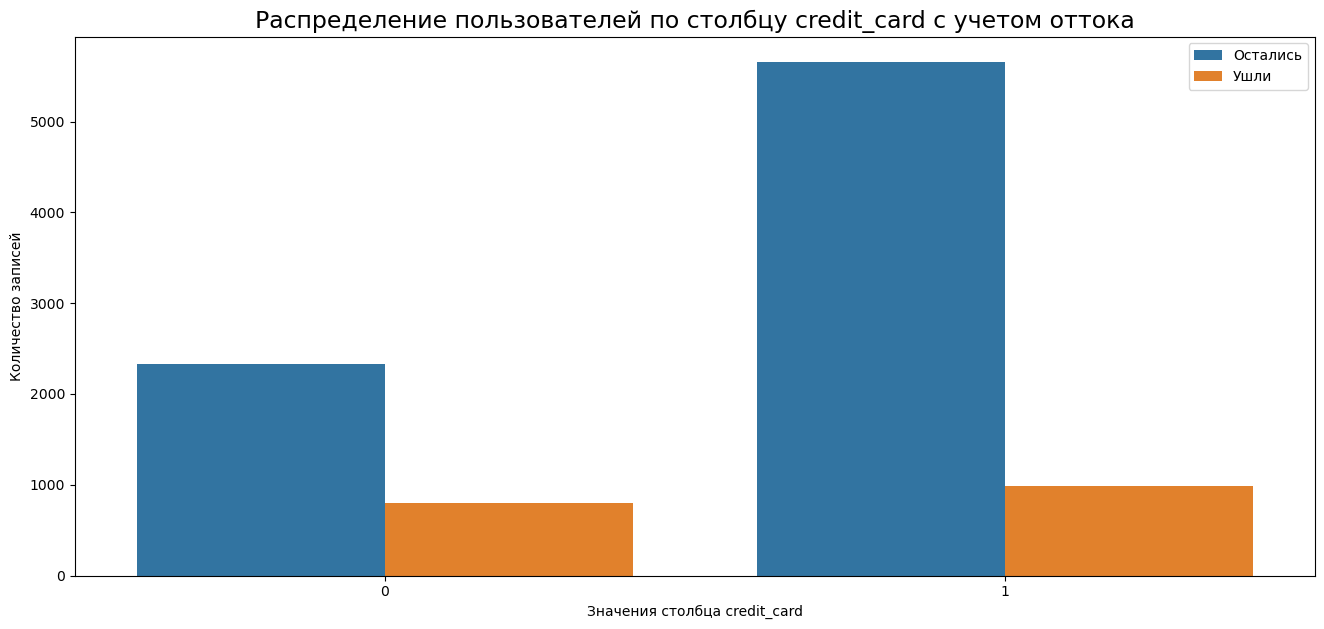

Сводная таблица c соотношением ушедших и оставшихся в столбце credit_card:


no_churn  churn  total  churn_ratio
credit_card                                     
0                2327    799   3126         0.26
1                5655    986   6641         0.15

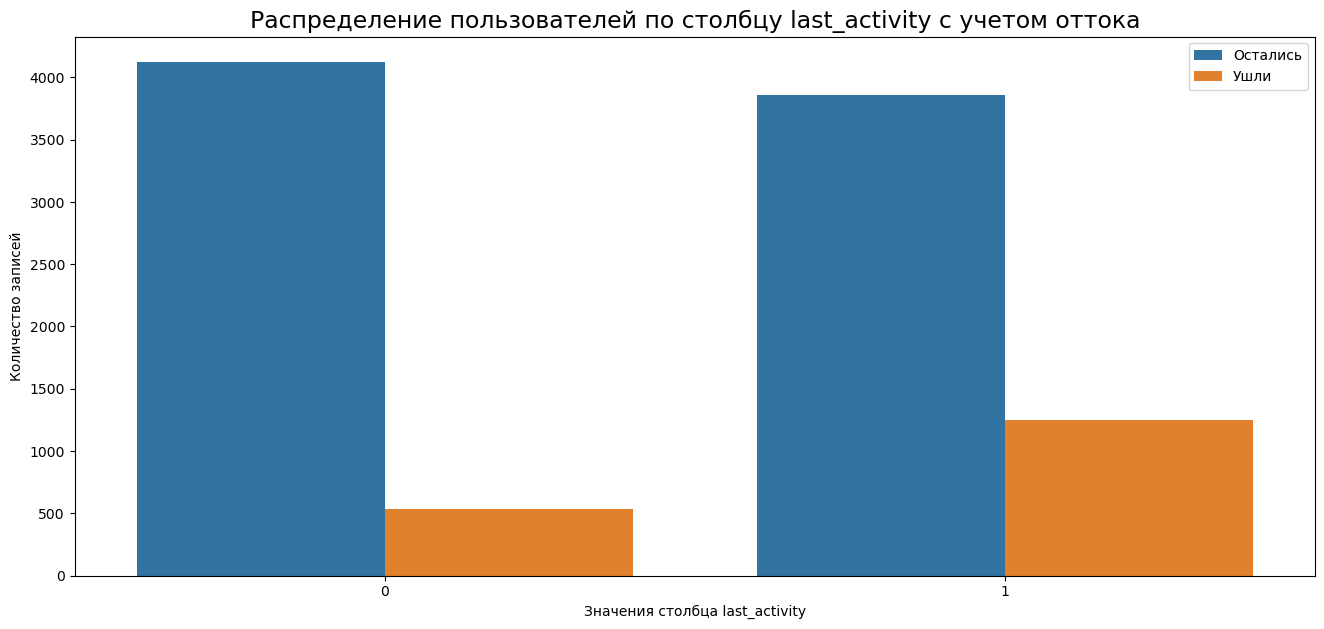

Сводная таблица c соотношением ушедших и оставшихся в столбце last_activity:


no_churn  churn  total  churn_ratio
last_activity                                     
0                  4123    536   4659         0.12
1                  3859   1249   5108         0.24

In [33]:
# Строим графики распределения по столбцам equity, products, gender, city, credit_card, last_activity
# Дополнием графики сводными таблицами с количеством ушедших, оставшихся, общим количеством - и отношением ушедших к общему количеству

for column in ['equity', 'products', 'gender', 'city', 'credit_card', 'last_activity']:
    plt.figure(figsize=(16,7))
    sns.countplot(data=data, x=column, hue='churn')
    plt.title(f'Распределение пользователей по столбцу {column} с учетом оттока', fontsize=17)
    plt.xlabel(f'Значения столбца {column}')
    plt.ylabel(f'Количество записей')
    plt.legend(['Остались', 'Ушли'])
    plt.show()
    print(f'Сводная таблица c соотношением ушедших и оставшихся в столбце {column}:')
    temp = (
    data.pivot_table(index=['churn'], columns=column, values='userid', aggfunc='count')
        .reset_index(drop=True).T
        .rename(columns={0:'no_churn', 1:'churn'})
    )
    temp['total'] = temp['churn'] + temp['no_churn']
    temp['churn_ratio'] = round(temp['churn'] / temp['total'], 2)
    display(temp)
    

***
- Доля ушедших клиентов растёт с увеличением количества объектов заложенного имущества, от 1 до 5; среди клиентов с 5 такими объектами доля ушедших клиентов достигает почти 1/3, а среди клиентов с 9 объектами доля ушедших больше 1/2;
- Доля ушедших ниже всего среди клиентов с 1 банковским продуктом; с увеличением количества банковских продуктов соотношение доли ушедших и оставшихся растет в пользу ушедших - среди клиентов с 4 продуктами количество ушедших даже превышает количество оставшихся, а среди клиентов с 3 продуктами доля ушедших клиентов достигает почти 1/3;
- Доля ушедших среди мужчин вдвое больше, чем среди женщин;
- Доля ушедших ниже среди владельцев кредитных карт, чем среди тех, у кого их нет;
- Соотношение ушедших и оставшихся клиентов в трёх городах похожее, но клиенты из Рыбинска уходят реже;
- Доля ушедших среди клиентов, у которых отметка об активности за последний период, вдвое выше, чем у неактивных.
***

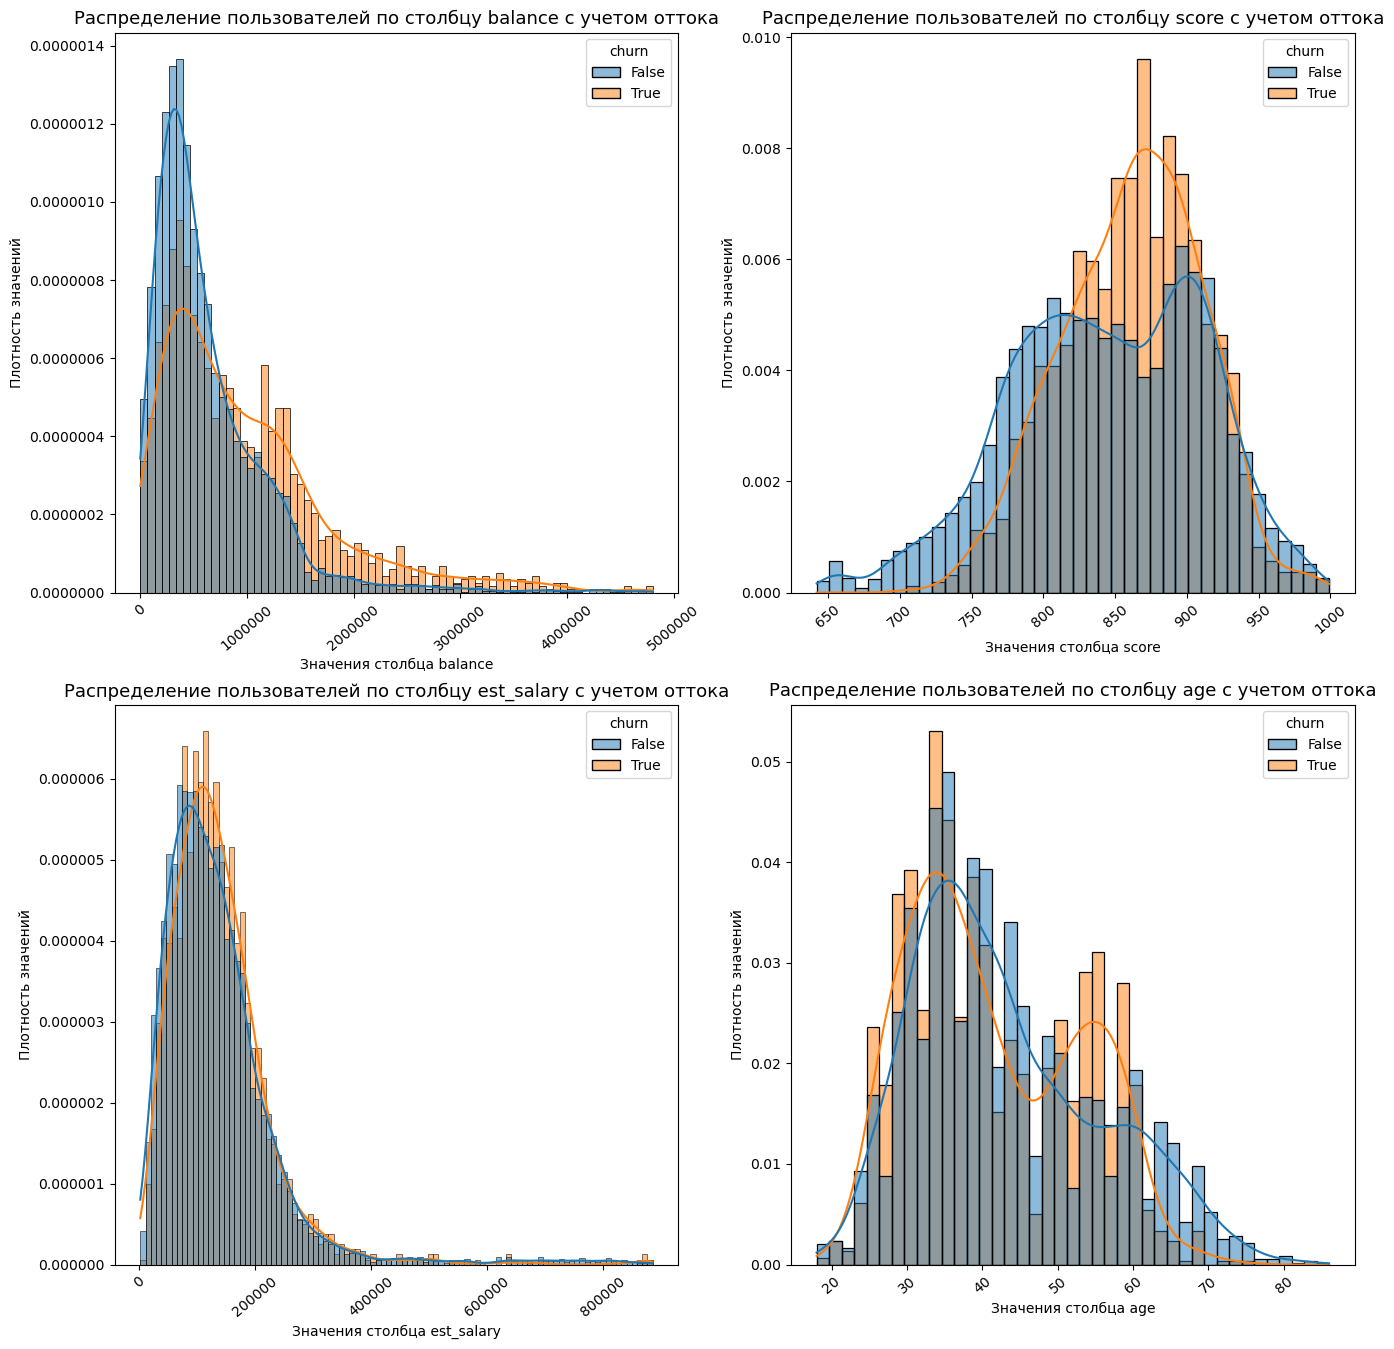

In [34]:
# Строим графики распределения по столбцам balance, score, est_salary, age

fig, ax = plt.subplots(figsize=(16,16), nrows=2, ncols=2)

for i, column in enumerate(['balance', 'score', 'est_salary', 'age']):
    plt.subplot(2, 2, i+1)
    sns.histplot(data=data, x=column, hue='churn', kde=True, stat='density', common_norm=False)
    plt.ticklabel_format(style='plain')
    plt.title(f'Распределение пользователей по столбцу {column} с учетом оттока', fontsize=13)
    plt.xticks(rotation=40)
    plt.xlabel(f'Значения столбца {column}')
    plt.ylabel(f'Плотность значений')

***
- По графику, построенному по сумме на счёте, видно, что начиная с 750 тыс относительная доля ушедших клиентов начинает превышать относительную долю оставшихся, а начиная с 1,2 млн - существенно;
- по баллам кредитного скоринга в диапазоне 820-920 баллов относительная доля ушедших клиентов превышает относительную долю оставшихся; на этом же промежутке относительная доля оставшихся показывает существенный спад;
- в разрезе заработной платы в диапазоне 100-200 тыс относительная доля ушедших клиентов превышает относительную долю оставшихся;
- в разрезе возраста - наблюдается превышение относительной доли ушедших клиентов над относительной долей оставшихся в диапазонах 21-35 лет и 50-60 лет.
***

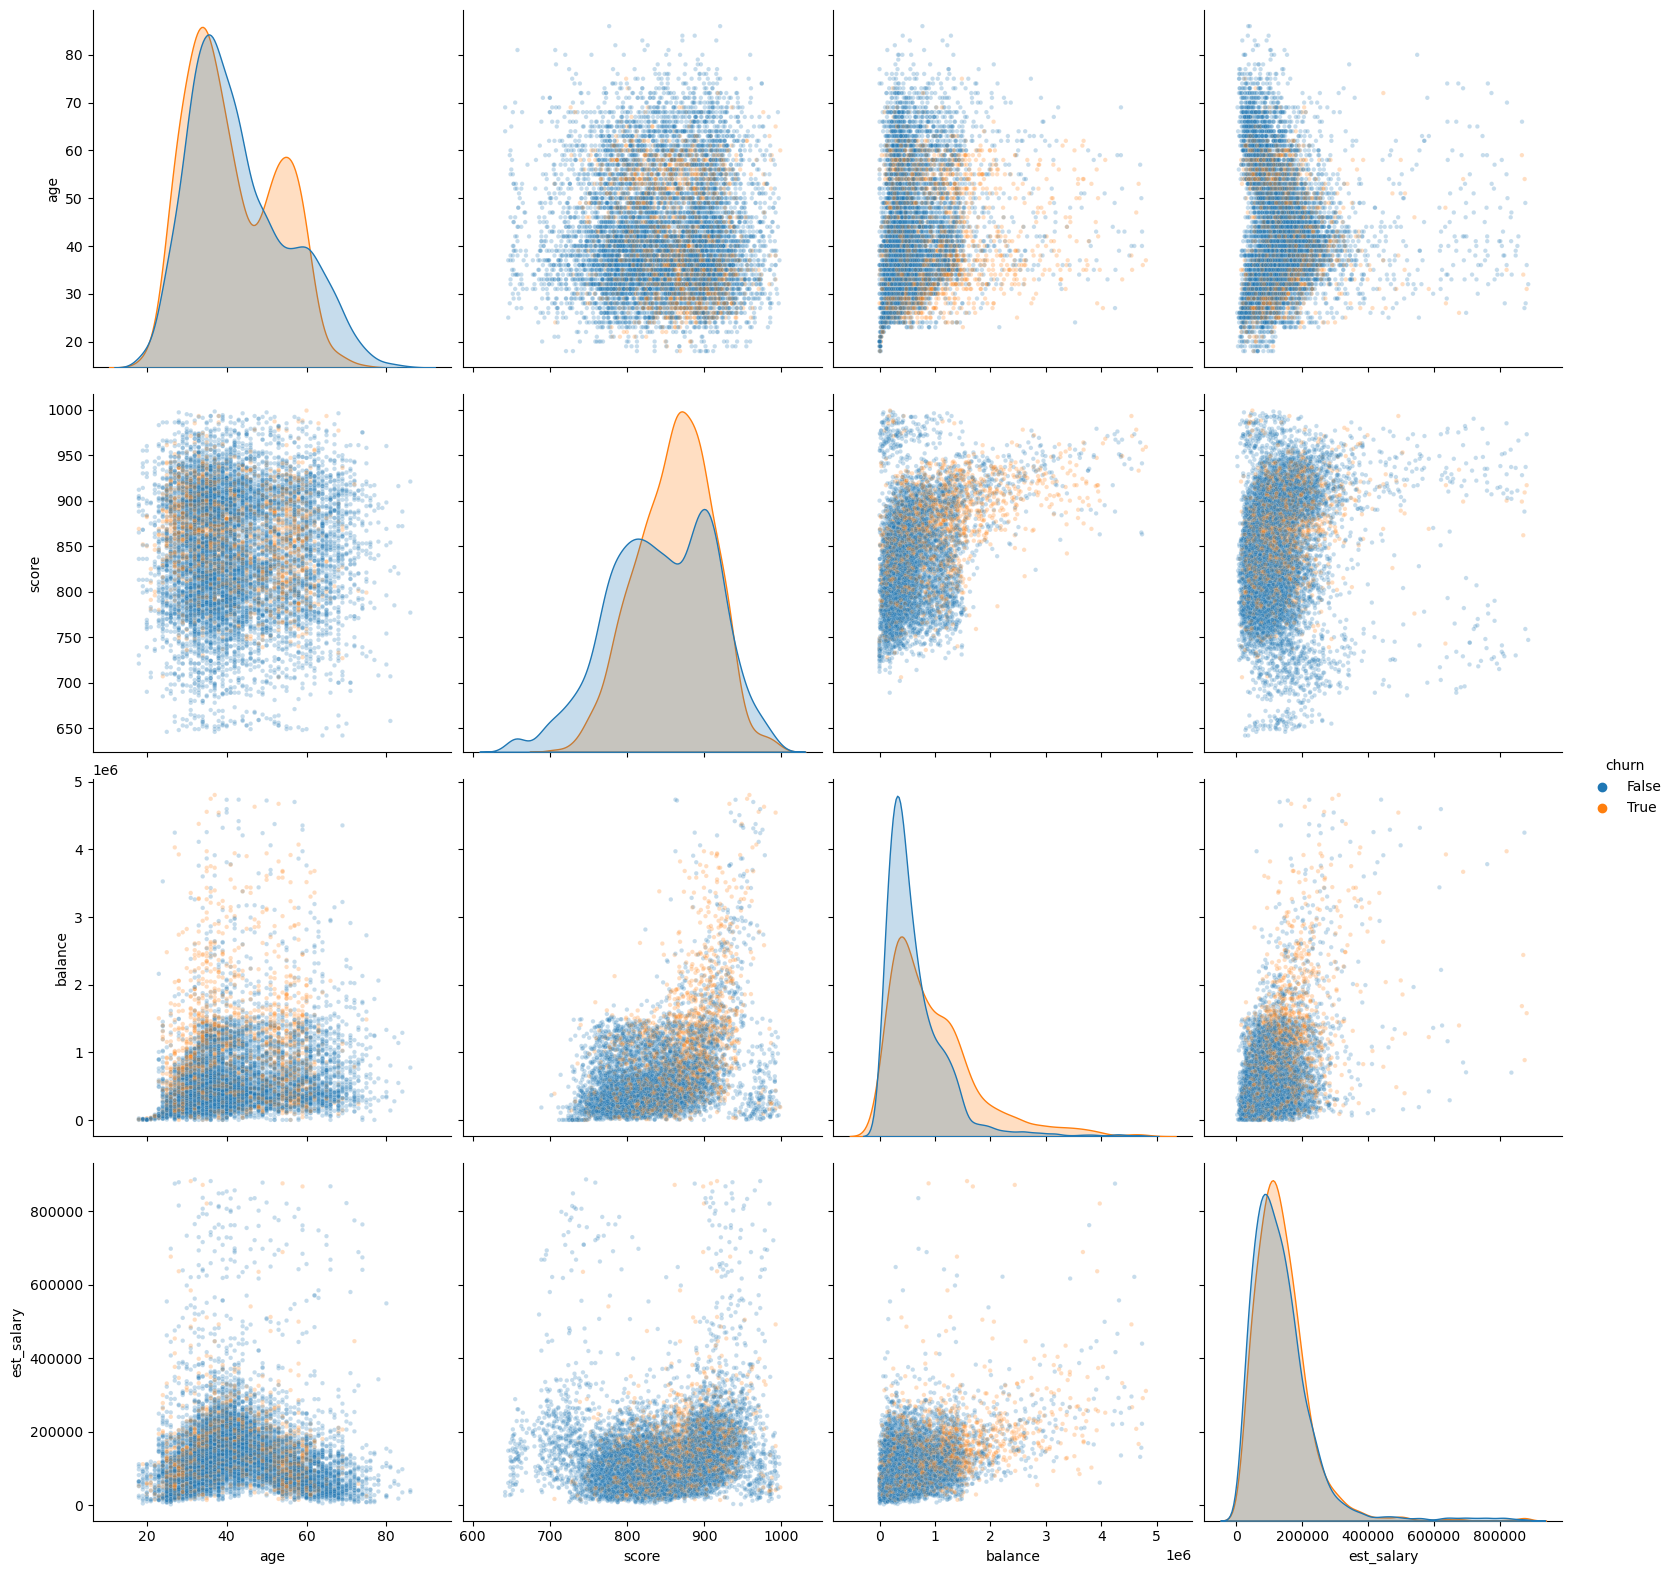

In [35]:
# Строим график парных распределений количественных значений датасета с учетом оттока

sns.pairplot(data[['age', 'score', 'balance', 'est_salary', 'churn']], hue='churn', height=4, kind='scatter', plot_kws=dict(alpha=.25, s=10), diag_kws=dict(common_norm=False) );

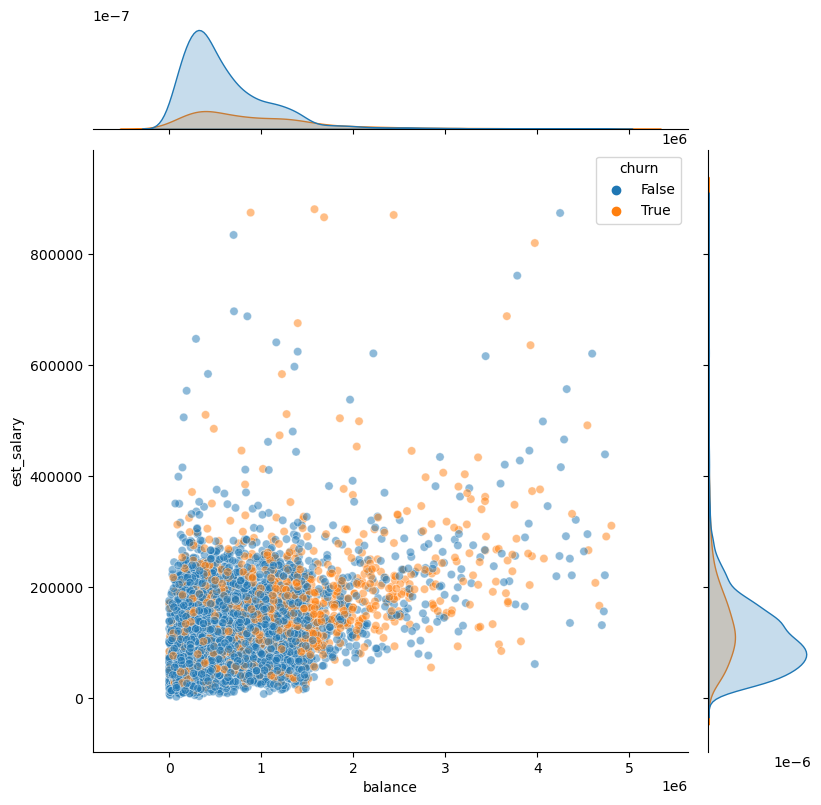

In [36]:
# Увеличим график распределения величины balance и est_salary, проанализируем взаимосвязь

sns.jointplot(x="balance", y="est_salary", data=data, hue='churn', height=8, dropna=True, joint_kws={'alpha': 0.5});


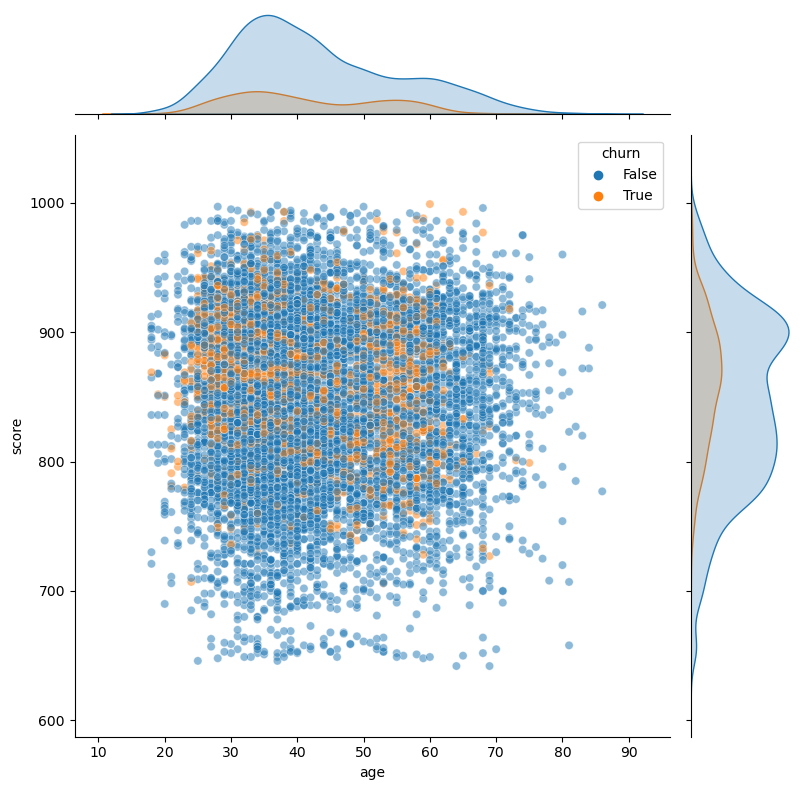

In [37]:
# Увеличим график распределения величины balance и est_salary, проанализируем взаимосвязь

sns.jointplot(x="age", y="score", data=data, hue='churn', height=8, dropna=True, joint_kws={'alpha': 0.5});


***
По графику хорошо заметно, что уходят клиенты с более высоким балансом на счете и значениями кредитного скоринга выше среднего (но не максимальными).

Размер зарплаты во взаимосвязи с балансом демонстрирует следующее: при низких показателях и баланса, и зарплаты (до 100150 тыс - зарплата, до 1 млн - баланс) отток относительно невысок, и увеличивается с ростом обоих показателей, при этом увеличение оттока сильнее по мере увеличения баланса, чем по мере увеличения зарплаты.
***

### Промежуточные выводы по этапу 2: <a id='2.7'></a>

**Анализ распределения пользователей:**
- *По уходу:* из всех пользователей в датасете ушло 18,3% клиентов.
- *По полу:* клиенты банка в датасете распределены практически поровну, причем женщин чуть больше (50,04%) чем мужчин (49,96%)
- *По возрасту:* клиентов в возрасте до 25 лет относительно мало; до возраста 30 лет идет постепенный рост количества клиентов; больше всего клиентов - в возрасте 32-37 лет; количество клиентов старше 38 лет постепенно идет на спад до 45 лет; количество клиентов в диапазоне 45-61 на одном уровне; с дальнейшим повышением возраста идет постепенный спад; количество клиентов 73+ оценивается так же, как количество клиентов 18-22 года;
- *По филиалам:* больше всего клиентов - из филиала в Ярославле (58,52%), далее идет Рыбинск (27,02%) и Ростов (14,46%); эти пропорции близки к соотношению населения этих городов, что выглядит закономерно;
- *По балансу счёта:* большая часть пользователей (до 75%) имеет на счете сумму в пределах 1,5 млн условных единиц; далее количество клиентов резко снижается;
- *По заработной плате:* Большая часть клиентов имеет оценочную заработную плату в районе 120 тыс условных единиц;
- *По количеству продуктов банка у пользователя:* у большинства пользователей есть два продукта банка, на втором месте те, у кого всего один продукт; пользователи с 3+ продуктами - в меньшинстве;
- *По баллам кредитного скоринга:* средний и медианный балл - 850, есть всплеск количества пользователей со значениями 880-920;
- *По наличию кредитной карты:* у 68% клиентов есть кредитная карта;
- *По числу объектов собственности, которое банк рассматривает как залоговое имущество:* оличество клиентов, не имеющих заложенного имущества в банке, достаточно велико; интересно, что с увеличением количества таких объектов начиная с 1 и до 5 - растёт и количество пользователей; количество пользователей, у которых от 2 до 5 объектов собственности находится в залоге у банка, как минимум вдвое превышает количество клиентов, у которых такого имущества нет вообще; можно предположить, что банк сильно ориентирован на пользователей ипотечных и других подобных услуг;
- *По активности за последний период:* у всего лишь 52% клиентов стоит отметка об активности за последний период; судя по всему, это достаточно низкий показатель.


**Анализ корреляции признаков с учетом оттока:**

Если свести воедино оба использованных метода рассчета корреляции, получится, что наиболее коррелирующие с оттоком значения - в столбцах equity, products и balance.

Столбцы, значения которых не коррелируют с оттоком - зарплата и город, в котором расположен филиал банка.

**Распределение признаков с учетом оттока:**
- *По полу:* доля ушедших среди мужчин больше, чем среди женщин;
- *По возрасту:* больше всего отток среди клиентов в возрасте 30-40 лет.
- *По филиалам:* оотношение ушедших и оставшихся клиентов в трёх городах примерно одинакова;
- *По балансу счёта:* количество ушедших колеблется синхронно с количеством оставшихся в зависимости от величины суммы на счёте, имея, при этом, тенденцию к увеличению по мере роста суммы на счёте; начиная примерно с 1 млн на счете доля ушедших клиентов достигает 1/3, а начиная с 1,5 млн - достигает половины;
- *По заработной плате:* соотношение ушедших и оставшихся в разрезе заработной платы не отличается какими-либо перекосами.
- *По количеству продуктов банка у пользователя:* доля ушедших ниже всего среди клиентов с 1 банковским продуктом; с увеличением количества банковских продуктов соотношение доли ушедших и оставшихся растет в пользу ушедших - среди клиентов с 4 продуктами количество ушедших даже превышает количество оставшихся, а среди клиентов с 3 продуктами доля ушедших клиентов достигает почти 1/3;
- *По баллам кредитного скоринга:* распределение оставшихся и ушедших в целом равномерное, уходят в основном клиенты с баллом выше среднего (850-900);
- *По наличию кредитной карты:* доля ушедших ниже среди владельцев кредитных карт, чем среди тех, у кого их нет;
- *По числу объектов собственности, которое банк рассматривает как залоговое имущество:* доля ушедших клиентов растёт с увеличением количества объектов заложенного имущества, от 1 до 5; среди клиентов с 5 такими объектами доля ушедших клиентов достигает почти 1/3;
- *По активности за последний период:* доля ушедших среди клиентов, у которых отметка об активности за последний период, выше, чем у неактивных


Таким образом, основные признаки ушедших: в основном мужчины, возраст - 30-40 лет, большая сумма баланса счёта (ближе к 1,5 млн и выше), пользуются 2-4 продуктами банка, балл кредитного скоринга - выше среднего (850-900), не владеют кредитной картой, объектов имущества в залоге у банка - от 2 до 5, есть активность в последний период.

##  Сегментация клиентов по количеству используемых продуктов <a id='3'></a>

### Общая картина распределения клиентов по количеству используемых продуктов <a id='3.1'></a>

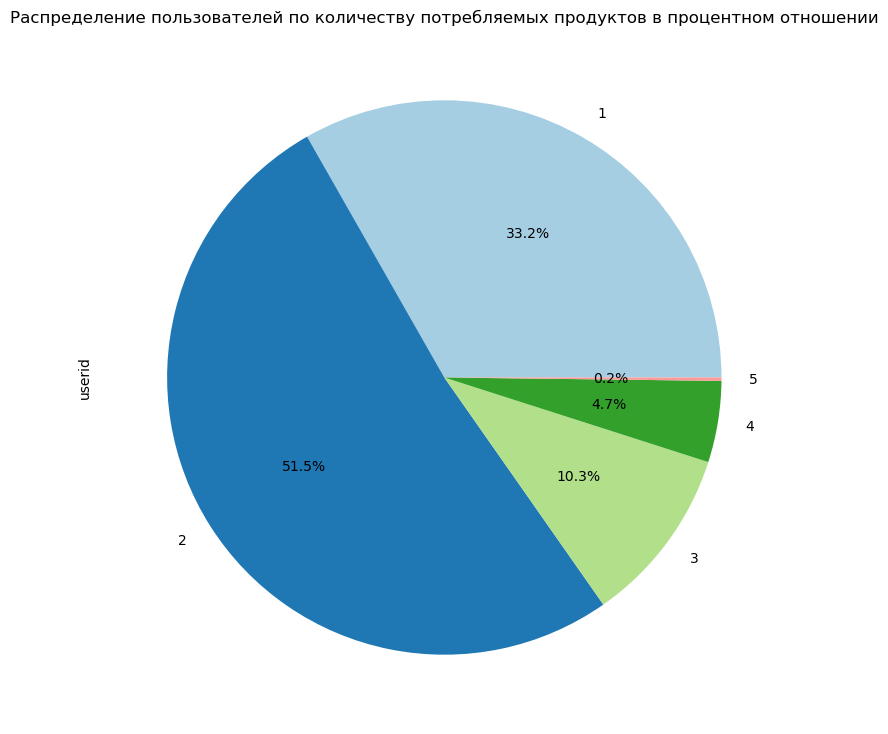

In [38]:
# Строим график общего распределения клиентов по количеству продуктов

(
    data.groupby('products', as_index=True)['userid'].count()
    .plot(kind='pie', subplots=True, figsize=(9, 9), autopct='%1.1f%%', colors=current_palette, )
)
plt.title('Распределение пользователей по количеству потребляемых продуктов в процентном отношении');

In [39]:
# Строим сводную таблицу с общим распределением ушедших и оставшихся клиентов по количеству продуктов
# Столбец churn/total показывает процент ушедших к общему количеству пользователей в сегменте, в процентах
# Столбец churn/no_churn показывает соотношение оставшихся к ушедшим в сегменте

churn_pivot = data.groupby('products').agg({'userid':'count', 'churn':'sum'}).rename(columns={'userid':'total'})
churn_pivot['no_churn'] = churn_pivot['total'] - churn_pivot['churn']
churn_pivot['churn/total'] = churn_pivot.apply(lambda x: f'{x.churn / x.total:.2%}', axis=1)
churn_pivot['no_churn/total'] = churn_pivot.apply(lambda x: f'{x.no_churn / x.total:.2%}', axis=1)
churn_pivot

total  churn  no_churn churn/total no_churn/total
products                                                   
1          3247    231      3016       7.11%         92.89%
2          5028    960      4068      19.09%         80.91%
3          1010    293       717      29.01%         70.99%
4           463    293       170      63.28%         36.72%
5            19      8        11      42.11%         57.89%

***
Самый многочисленный сегмент - те, у кого 2 банковских продукта, их 51,5%. На втором месте - те, у кого всего один банковский продукт - их 33,2%. Далее - по нисходящей - клиенты с 3 продуктами (10,3%), 4 продуктами 4,7%), 5 продуктами (0,2%).

- Клиенты с 1 продуктом: ушло 7,11% от общего количества клиентов сегмента, осталось 92.89%
- Клиенты с 2 продуктами: ушло 19.09% от общего количества клиентов сегмента, осталось 80.91%
- Клиенты с 3 продуктами: ушло 29.01% от общего количества клиентов сегмента, осталось 70.99%
- Клиенты с 4 продуктами: ушло 63.28% от общего количества клиентов сегмента, осталось 36.72%
- Клиенты с 5 продуктами: ушло 42.11% от общего количества клиентов сегмента, осталось 57.89%

Наиболее благоприятное соотношение ушедших и оставшихся клиентов - в сегменте с 1 продуктом. По мере увеличения количества продуктов увеличивается отток. Худшие показатели демонстрирует сегмент с 4 продуктами - там ушло почти вдвое больше, чем осталось.

Ситуация у клиентов с 5 продуктами выглядит лучше, но соотношение близко к 50/50, а выборка слишком мала, чтобы делать оптимистичные прогнозы в ее отношении. 

Закодируем записи по сегментам в отдельный столбец, клиенты с 5 продуктами попадут в 4 сегмент. Таким образом, при перичном анализе сегментов по количеству продуктов мы будем рассматривать 4:

- 1: клиенты с одним продуктом;
- 2: клиенты с двумя продуктами
- 3: клиенты с тремя продуктами;
- 4: клиенты с четырьмя и более продуктами.
***

In [40]:
# Создаем дополнительный столбец и кодируем в нем записи по сегментам

data['segment'] = data['products'].map({1:1, 2:2, 3:3, 4:4, 5:4})
data.head(5)

userid  score       city gender  age  equity     balance  products  \
0  183012  850.0    Рыбинск      Ж   25       1    59214.82         2   
1  146556  861.0    Рыбинск      Ж   37       5   850594.33         3   
2  120722  892.0    Рыбинск      Ж   30       0         NaN         1   
3  225363  866.0  Ярославль      Ж   51       5  1524746.26         2   
4  157978  730.0  Ярославль      М   34       5      174.00         1   

   credit_card  last_activity  est_salary  churn  gender_code  city_code  \
0            0              1    75719.14   True            0          1   
1            1              0    86621.77  False            0          1   
2            1              1   107683.34  False            0          1   
3            0              1   174423.53   True            0          0   
4            1              0    67353.16   True            1          0   

   Ростов  Рыбинск  Ярославль  segment  
0       0        1          0        2  
1       0        1          0        3  
2       0        1          0        1  
3       0        0          1        2  
4       0        0          1        1

In [41]:
# Создаем обзорную сводную таблицу по количеству продуктов у клиентов

(
    data.pivot_table(index=['segment'], aggfunc={'score': 'median',
                                                                      'gender_code': 'mean',
                                                                      'age': 'median',
                                                                      'equity': 'median',
                                                                      'balance': 'median',
                                                                      'credit_card': 'mean',
                                                                      'last_activity': 'mean',
                                                                      'est_salary': 'median',
                                                                      'Ярославль': 'mean',
                                                                       'Рыбинск': 'mean',
                                                                       'Ростов': 'mean',
                                                                       'churn': 'mean'
                                                                      })
)

age     balance     churn  credit_card  equity  est_salary  \
segment                                                               
1         40  411812.910  0.071143     0.862642       0  140979.260   
2         40  510976.175  0.190931     0.626492       3  108615.400   
3         42  656040.620  0.290099     0.353465       4  105151.555   
4         37  886528.540  0.624481     0.690871       4  120335.915   

         gender_code  last_activity  score    Ростов   Рыбинск  Ярославль  
segment                                                                    
1           0.539883       0.528796  883.0  0.136742  0.260548   0.602710  
2           0.476531       0.514519  844.0  0.159706  0.305688   0.534606  
3           0.428713       0.417822  827.0  0.093069  0.155446   0.751485  
4           0.618257       0.792531  872.0  0.147303  0.205394   0.647303

***
1. Клиенты с 1 продуктом:
- Медианный возраст - 40 лет;
- Медианный баланс на счете около 400 тыс условных единиц;
- Самый низкий показатель оттока из всех сегментов;
- Самое большое количество владельцев кредитных карт;
- Минимум объектов имущества в залоге у банка;
- Самая высокая медианная зарплата - 140 тыс;
- Мужчин несколько больше, чем женщин;
- Средние показатели активности;
- Высокие баллы кредитного скоринга.
2. Клиенты с 2 продуктами:
- Медианный возраст - 40 лет;
- Медианный баланс на счете около 500 тыс;
- Показатель оттока выше, чем у сегмента 1;
- Владельцев кредитных карт больше;
- Несколько объектов имущества в залоге у банка;
- Низкая (относительно других сегментов) медианная зарплата - 108 тыс;
- Женщин несколько больше, чем мужчин;
- Средние показатели активности;
- Средние баллы кредитного скоринга;
- В сегменте меньше всего клиентов из Ярославля.
3. Клиенты с 3 продуктами:
- Медианный возраст - 42 года, самый возрастной сегмент;
- Медианный баланс на счете около 650 тыс;
- Показатель оттока выше, чем у сегмента 2;
- Владельцев кредитных карт меньше;
- Несколько объектов имущества в залоге у банка;
- Низкая (относительно других сегментов) медианная зарплата - 105 тыс;
- Женщин несколько больше, чем мужчин;
- Низкие показатели активности;
- Низкие баллы кредитного скоринга;
- В сегменте больше всего клиентов из Ярославля.
4. Клиенты с 4 и более продуктами:
- Медианный возраст - 37 лет, самый молодой сегмент;
- Медианный баланс на счете около 900 тыс;
- Самый высокий показатель оттока из всех сегментов, больше 50%;
- Владельцев кредитных карт больше;
- Несколько объектов имущества в залоге у банка;
- Средняя (относительно других сегментов) медианная зарплата - 120 тыс;
- Мужчин больше, чем женщин;
- Высокие показатели активности;
- Высокие баллы кредитного скоринга.
***

### Распределение по количеству продуктов значений столбцов score, balance, est_salary, age <a id='3.2'></a>

In [42]:
# Строим сводную таблицу распределения значений столбцов score, balance, est_salary, age по количеству продуктов с учетом оттока

(
    data.pivot_table(index=['segment', 'churn'], aggfunc={'score': 'median',
                                                                      'age': 'median',
                                                                      'balance': 'median',
                                                                      'est_salary': 'median'})
)

age      balance  est_salary  score
segment churn                                     
1       False   40   413676.790  143906.880  886.0
        True    39   397432.560  105408.900  850.0
2       False   41   468802.090  104404.575  836.0
        True    38   750602.270  122965.535  866.0
3       False   43   603264.075  100024.240  820.0
        True    42   879033.005  118896.410  846.0
4       False   36   519908.230   79572.260  858.0
        True    39  1250634.190  147110.470  885.0

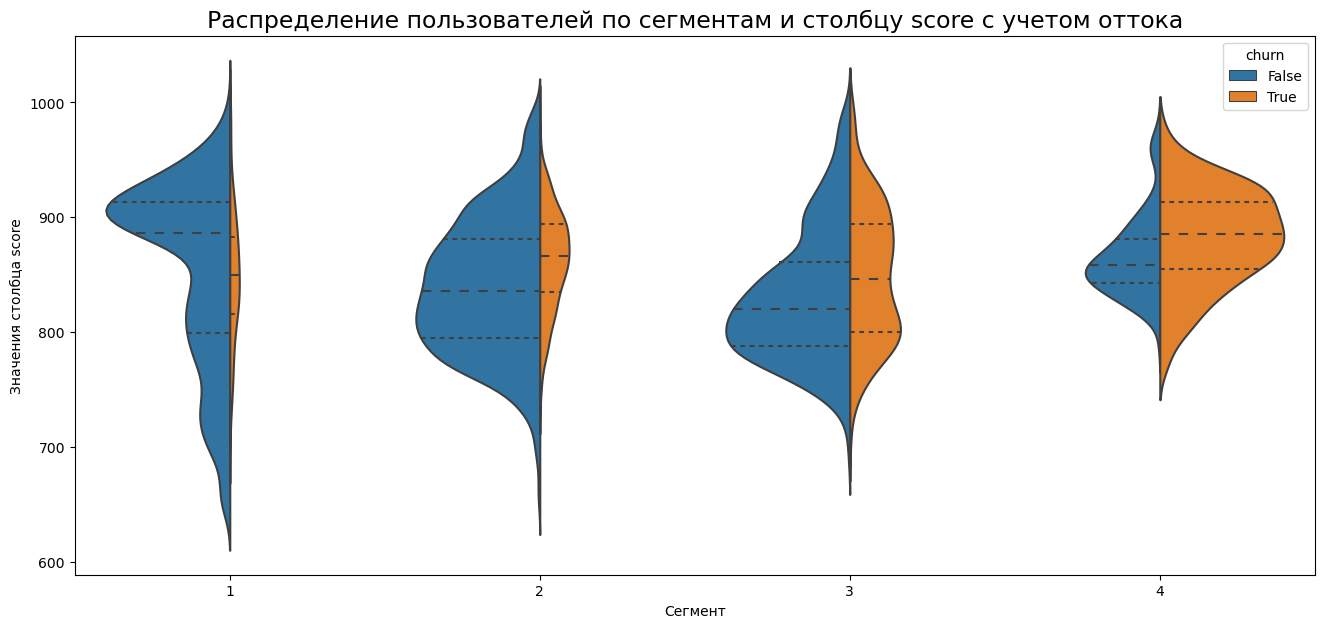

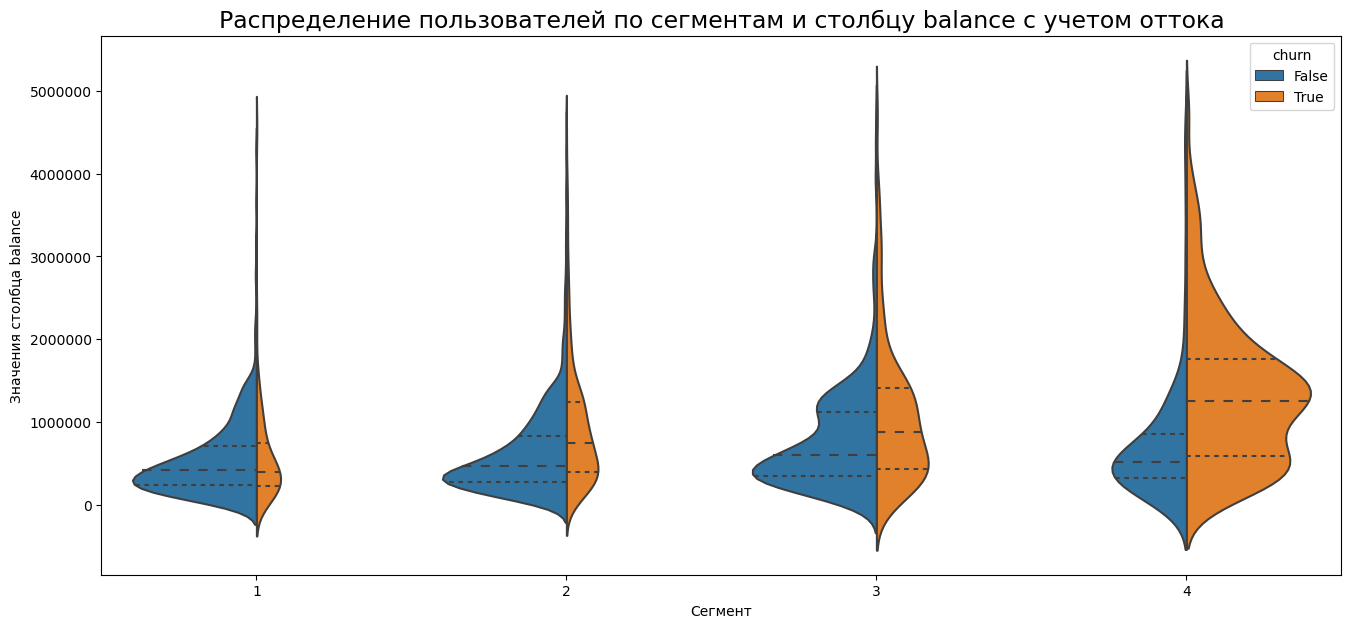

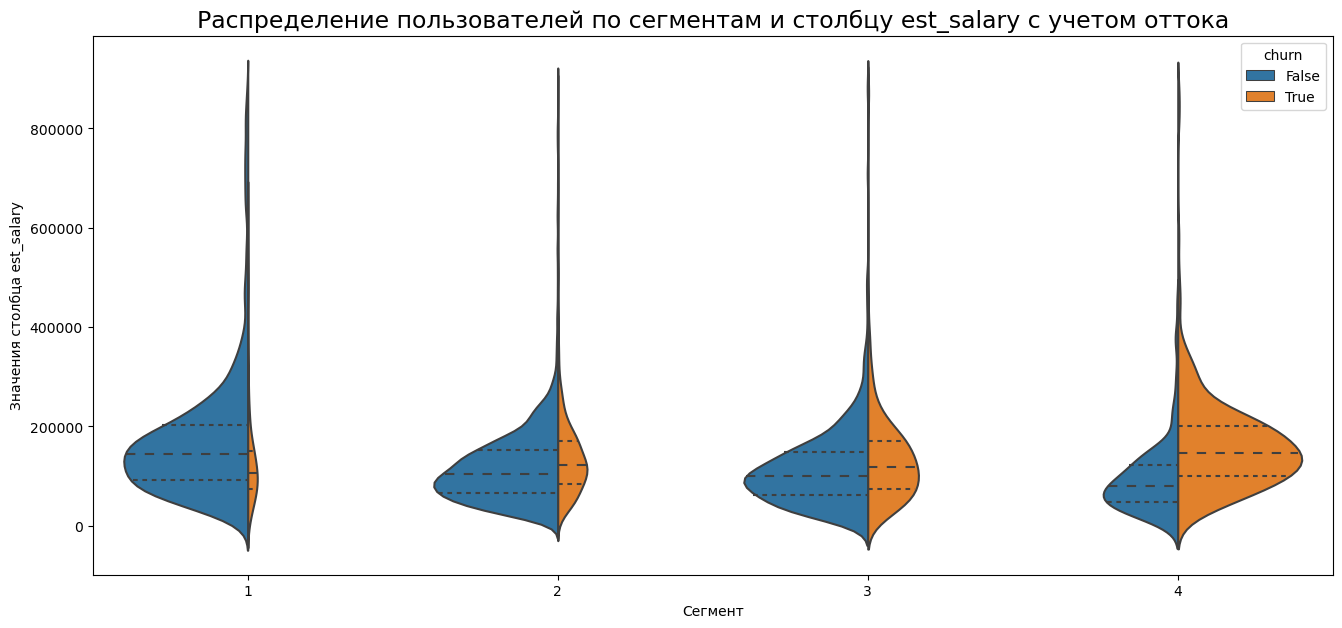

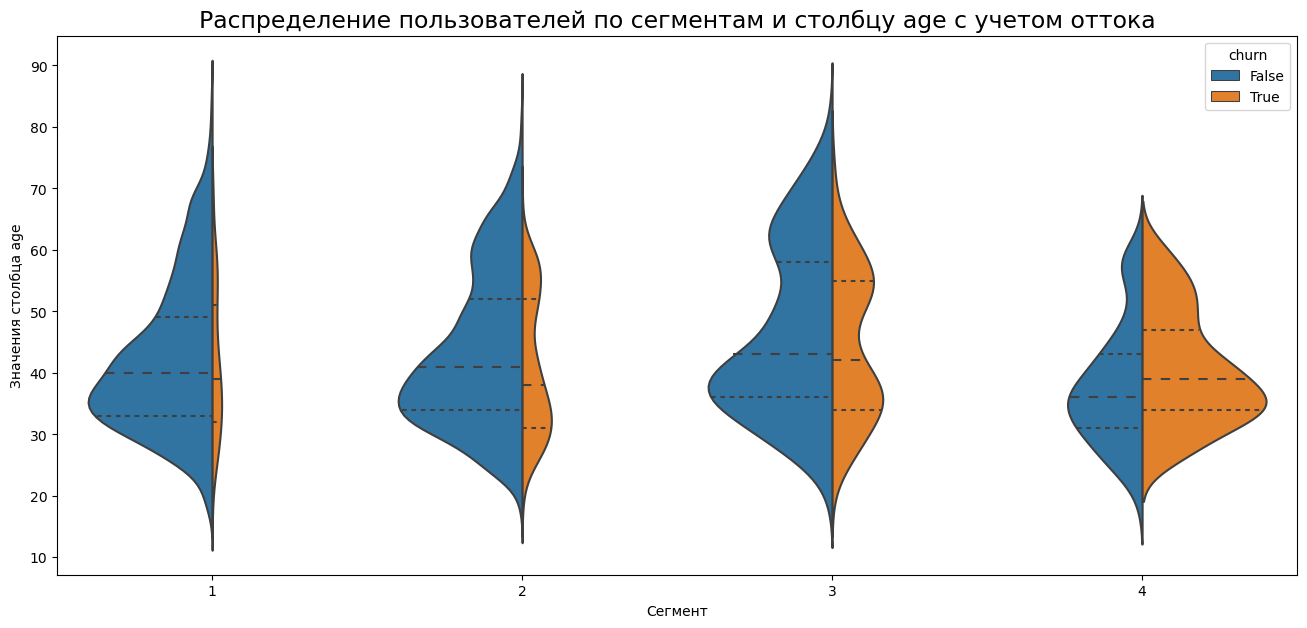

In [43]:
# Построим графики распределения значений столбцов score, balance, est_salary, age по количеству продуктов с учетом оттока

for column in ['score', 'balance', 'est_salary', 'age']:
    plt.figure(figsize=(16,7))
    plt.ticklabel_format(style='plain')
    sns.violinplot(x='segment', y=column, data=data, scale='count', inner='quartile', hue='churn', split=True)
    plt.title(f'Распределение пользователей по сегментам и столбцу {column} с учетом оттока', fontsize=17)
    plt.xlabel(f'Сегмент')
    plt.ylabel(f'Значения столбца {column}')

***
1. Клиенты с 1 продуктом:
- Баллы кредитного скоринга: отток в основном среди клиентов, чьи баллы ниже (от 800 до 850); 
- Баланс на счете: разницы в соотношении ушедших и оставшихся нет;
- Заработная плата: большая доля ушедших - с более низкими зарплатами, чем оставшиеся;
- Возраст: уходят более молодые клиенты;
2. Клиенты с 2 продуктами:
- Баллы кредитного скоринга: высокий процент ушедших, с более высокими баллами (около 860);
- Баланс на счете: высокий процент ушедших клиентов с большим балансом;
- Заработная плата: большая доля ушедших - с более высокими зарплатами, чем оставшиеся;
- Возраст: уходят более молодые клиенты;
3. Клиенты с 3 продуктами:
- Баллы кредитного скоринга: высокий процент ушедших, с более высокими баллами  (около 840);
- Баланс на счете: высокий процент ушедших клиентов с большим балансом;
- Заработная плата: большая доля ушедших - с более высокими зарплатами, чем оставшиеся;
- Возраст: уходят более молодые клиенты;
4. Клиенты с 4 и более продуктами:
- Баллы кредитного скоринга: высокий процент ушедших, с более высокими баллами  (около 860);
- Баланс на счете: высокий процент ушедших клиентов с большим балансом;
- Заработная плата: большая доля ушедших - с более высокими зарплатами, чем оставшиеся;
- Возраст: уходят более старшие клиенты.
***

### Распределение по количеству продуктов значений столбцов equity, gender_code, city_code, credit_card, last_activity <a id='3.3'></a>

In [44]:
# Строим сводную таблицу распределения значений столбцов score, balance, est_salary, age по количеству продуктов с учетом оттока

(
    data.pivot_table(index=['segment', 'churn'], aggfunc={'gender_code': 'mean',
                                                                                  'equity': 'mean',
                                                                                  'credit_card': 'mean',
                                                                                  'last_activity': 'mean',
                                                                                  'Ярославль': 'mean',
                                                                                  'Рыбинск': 'mean',
                                                                                  'Ростов': 'mean'})
)

credit_card    equity  gender_code  last_activity    Ростов  \
segment churn                                                                
1       False     0.859748  1.207228     0.525531       0.518899  0.130968   
        True      0.900433  3.112554     0.727273       0.658009  0.212121   
2       False     0.665192  3.009833     0.436332       0.460423  0.160521   
        True      0.462500  3.741667     0.646875       0.743750  0.156250   
3       False     0.364017  3.373780     0.366806       0.347280  0.093445   
        True      0.327645  3.887372     0.580205       0.590444  0.092150   
4       False     0.524862  4.055249     0.546961       0.950276  0.187845   
        True      0.790698  4.159468     0.661130       0.697674  0.122924   

                Рыбинск  Ярославль  
segment churn                       
1       False  0.261936   0.607095  
        True   0.242424   0.545455  
2       False  0.309735   0.529744  
        True   0.288542   0.555208  
3       False  0.170153   0.736402  
        True   0.119454   0.788396  
4       False  0.193370   0.618785  
        True   0.212625   0.664452

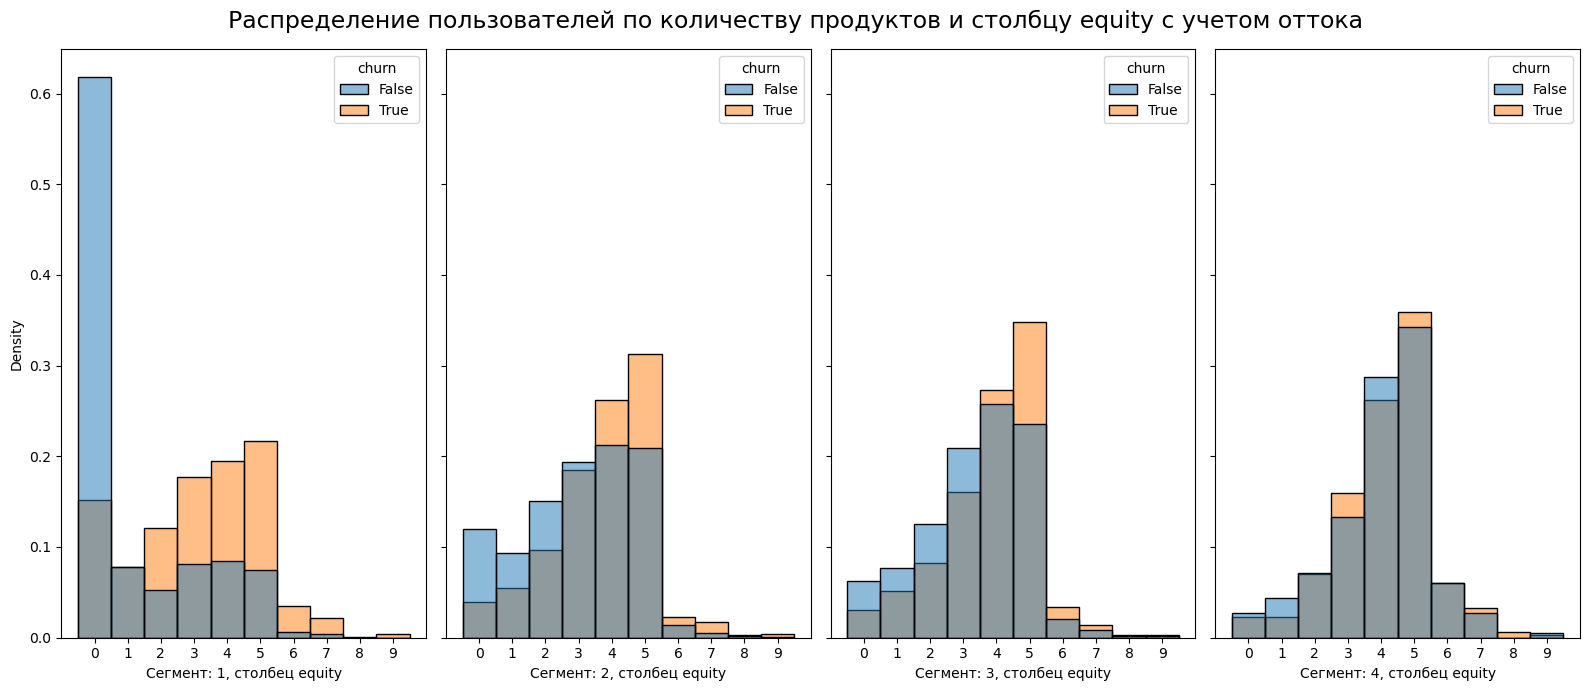

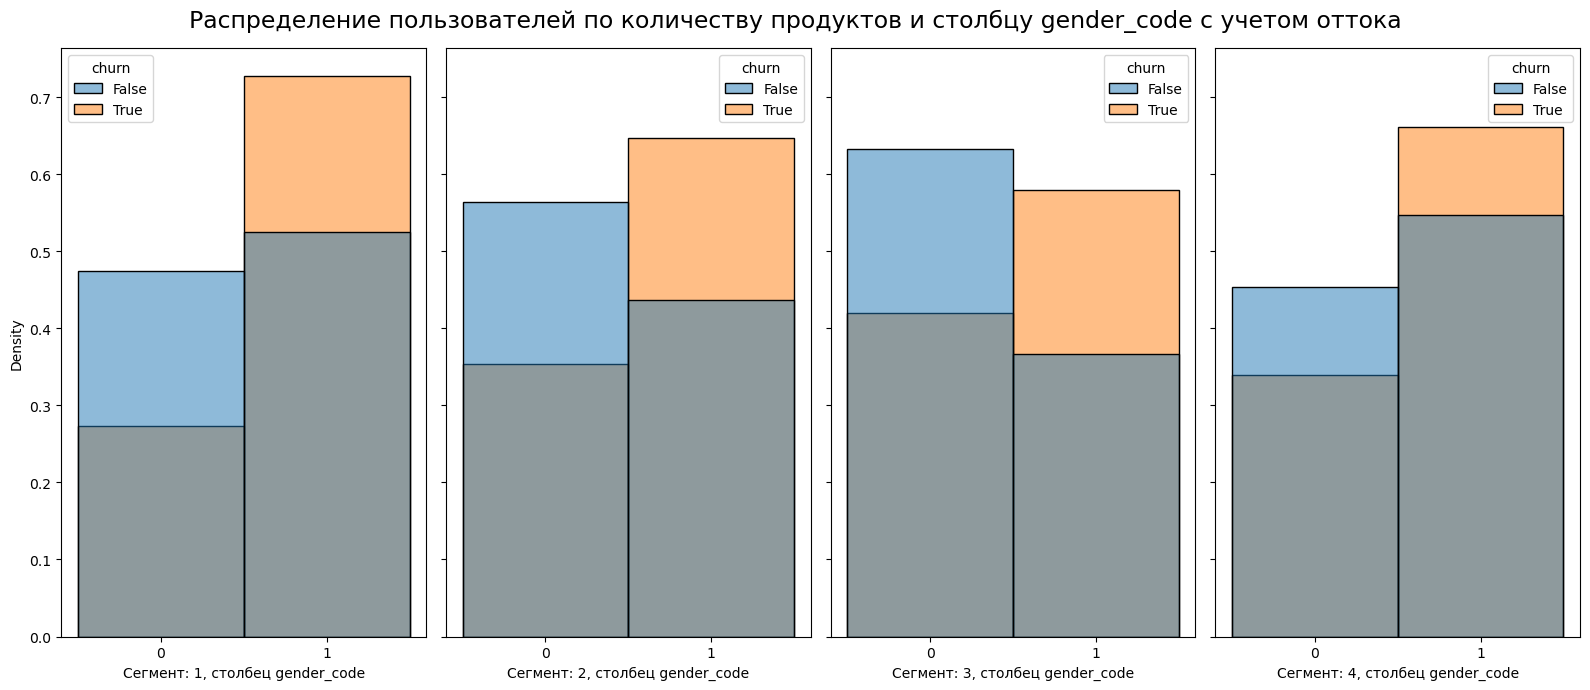

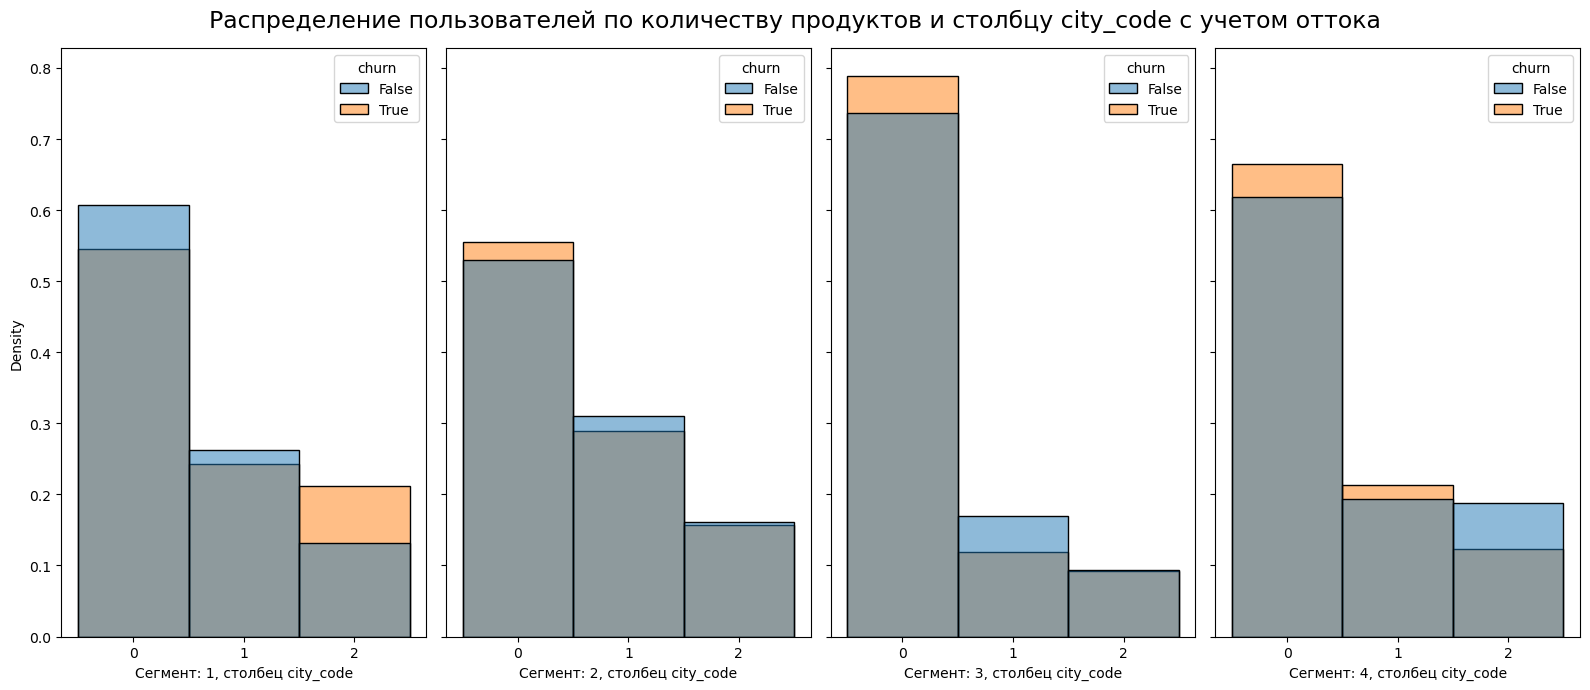

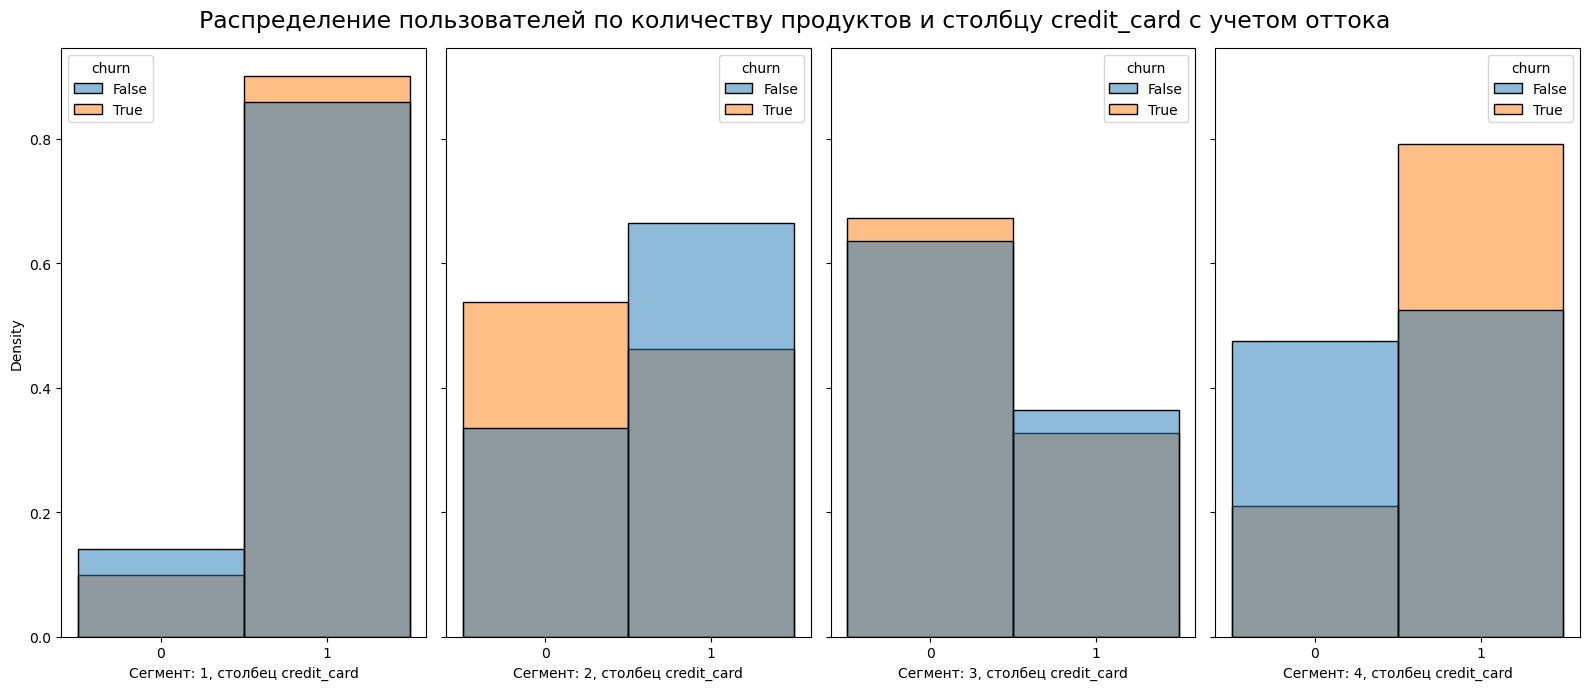

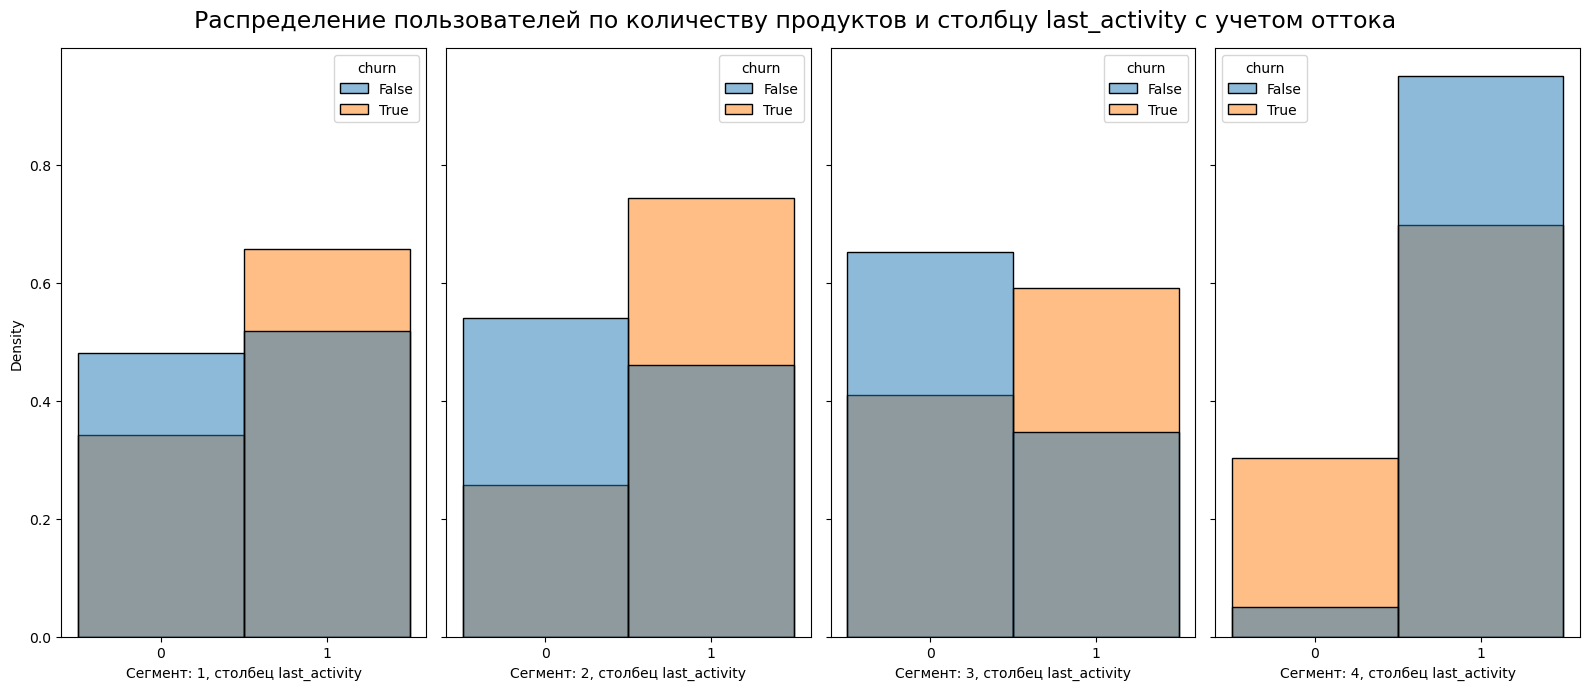

In [45]:
# Строим графики распределения значений столбцов equity, gender_code, city_code, credit_card, last_activity по количеству продуктов с учетом оттока

for column in ['equity', 'gender_code', 'city_code', 'credit_card', 'last_activity']:
    fig, axes = plt.subplots(1, 4, figsize=(16,7), sharey=True, sharex=True)
    fig.suptitle(f'Распределение пользователей по количеству продуктов и столбцу {column} с учетом оттока', fontsize=17)
    sns.histplot(data=data, x=data.query('segment == 1')[column] , ax=axes[0], hue='churn', stat='density', common_norm=False, discrete=True)
    sns.histplot(data=data, x=data.query('segment == 2')[column] ,  ax=axes[1], hue='churn', stat='density', common_norm=False, discrete=True)
    sns.histplot(data=data, x=data.query('segment == 3')[column] , ax=axes[2], hue='churn', stat='density', common_norm=False, discrete=True)
    sns.histplot(data=data, x=data.query('segment == 4')[column] ,  ax=axes[3], hue='churn', stat='density', common_norm=False, discrete=True)
    plt.xlabel(f'Значения столбца {column}')
    
    for i, ax in enumerate(axes):
        ax.set_xticks(range(len(data[column].unique())))
        ax.set_xlabel(f'Сегмент: {i+1}, столбец {column}')
       
    plt.ylabel(f'Количество записей')
    plt.tight_layout()
    plt.show()

***
1. Клиенты с 1 продуктом:
- Имущество в залоге: отток среди клиентов, у которых больше объектов в залоге;
- Пол: и оставшиеся, и ушедшие в большей части мужчины;
- Города: клиенты из Ростова уходят больше, чем остаются;
- Кредитная карта: отток одинаковый среди тех, у кого есть карта, и тех, у кого ее нет;
- Последняя активность: уходят клиенты с более высокими показателями активности.
2. Клиенты с 2 продуктами:
- Имущество в залоге: отток среди клиентов, у которых больше объектов в залоге;
- Пол: оставшиеся в большей части женщины, ушедшие в большей части мужчины;
- Города: клиенты из Ярославля уходят больше, чем остаются;
- Кредитная карта: отток больше среди тех, у кого нет кредитной карты;
- Последняя активность: уходят клиенты с более высокими показателями активности.
3. Клиенты с 3 продуктами:
- Имущество в залоге: отток среди клиентов, у которых больше объектов в залоге;
- Пол: оставшиеся в большей части женщины, ушедшие в большей части мужчины;
- Города: клиенты из Ярославля уходят больше, чем остаются;
- Кредитная карта: отток больше среди тех, у кого нет кредитной карты;
- Последняя активность: уходят клиенты с более высокими показателями активности.
4. Клиенты с 4 и более продуктами:
- Имущество в залоге: отток среди клиентов, у которых больше объектов в залоге;
- Пол: и оставшиеся, и ушедшие в большей части мужчины;
- Города: клиенты из Рыбинска и Ярославля уходят больше, чем остаются;
- Кредитная карта: отток больше среди тех, у кого есть кредитная карта;
- Последняя активность: уходят клиенты с более низкими показателями активности.
***

### Объединение сегментов <a id='3.4'></a>

***
В ходе анализа обнаружилось, что портреты клиентов с 2 и 3 банковскими продуктами, как оставшиеся, так и ушедшие, схожи по многим параметрам. Фактически, основные различия - в том, что среди клиентов с 2 продуктами большинство владеют кредитными картами, а в сегменте с 3 продуктами наоборот, а также в медианном балансе на счёте и баллах кредитного скоринга.

Попробуем объединить эти два сегмента в один большой сегмент и проанализируем получившиеся показатели.

Таким образом, мы будем рассматривать 3 сегмента клиентов:
- **1**: клиенты с одним продуктом;
- **2**: клиенты с двумя или тремя продуктами;
- **3**: клиенты с четырьмя и более продуктами.

Сформируем новые сегменты и построим заново сводные таблицы, чтобы оценить результат.
***

In [46]:
# Создаем дополнительный столбец и кодируем в нем записи по сегментам

data['segment'] = data['products'].map({1:1, 2:2, 3:2, 4:3, 5:3})
data.head(5)

userid  score       city gender  age  equity     balance  products  \
0  183012  850.0    Рыбинск      Ж   25       1    59214.82         2   
1  146556  861.0    Рыбинск      Ж   37       5   850594.33         3   
2  120722  892.0    Рыбинск      Ж   30       0         NaN         1   
3  225363  866.0  Ярославль      Ж   51       5  1524746.26         2   
4  157978  730.0  Ярославль      М   34       5      174.00         1   

   credit_card  last_activity  est_salary  churn  gender_code  city_code  \
0            0              1    75719.14   True            0          1   
1            1              0    86621.77  False            0          1   
2            1              1   107683.34  False            0          1   
3            0              1   174423.53   True            0          0   
4            1              0    67353.16   True            1          0   

   Ростов  Рыбинск  Ярославль  segment  
0       0        1          0        2  
1       0        1          0        2  
2       0        1          0        1  
3       0        0          1        2  
4       0        0          1        1

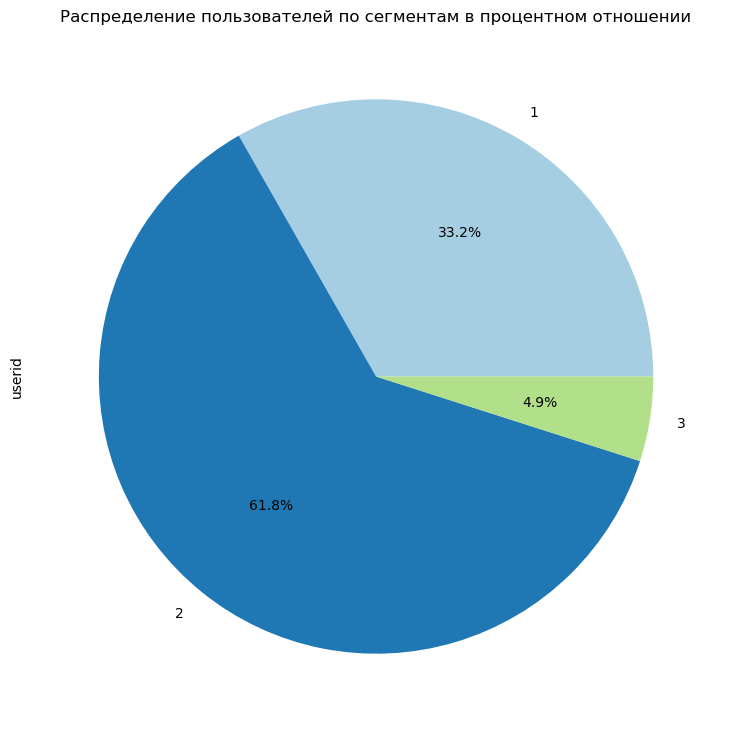

In [47]:
# Строим график общего распределения клиентов по новым сегментам

(
    data.groupby('segment', as_index=True)['userid'].count()
    .plot(kind='pie', subplots=True, figsize=(9, 9), autopct='%1.1f%%', colors=current_palette, )
)
plt.title('Распределение пользователей по сегментам в процентном отношении');

In [48]:
# Строим ещё раз сводную таблицу с общим распределением ушедших и оставшихся клиентов по новым сегментам
# Столбец churn/total показывает процент ушедших к общему количеству пользователей в сегменте, в процентах
# Столбец churn/no_churn показывает соотношение оставшихся к ушедшим в сегменте

churn_pivot_segment = data.groupby('segment').agg({'userid':'count', 'churn':'sum'}).rename(columns={'userid':'total'})
churn_pivot_segment['no_churn'] = churn_pivot_segment['total'] - churn_pivot_segment['churn']
churn_pivot_segment['churn/total'] = churn_pivot_segment.apply(lambda x: f'{x.churn / x.total:.2%}', axis=1)
churn_pivot_segment['no_churn/total'] = churn_pivot_segment.apply(lambda x: f'{x.no_churn / x.total:.2%}', axis=1)
churn_pivot_segment

total  churn  no_churn churn/total no_churn/total
segment                                                   
1         3247    231      3016       7.11%         92.89%
2         6038   1253      4785      20.75%         79.25%
3          482    301       181      62.45%         37.55%

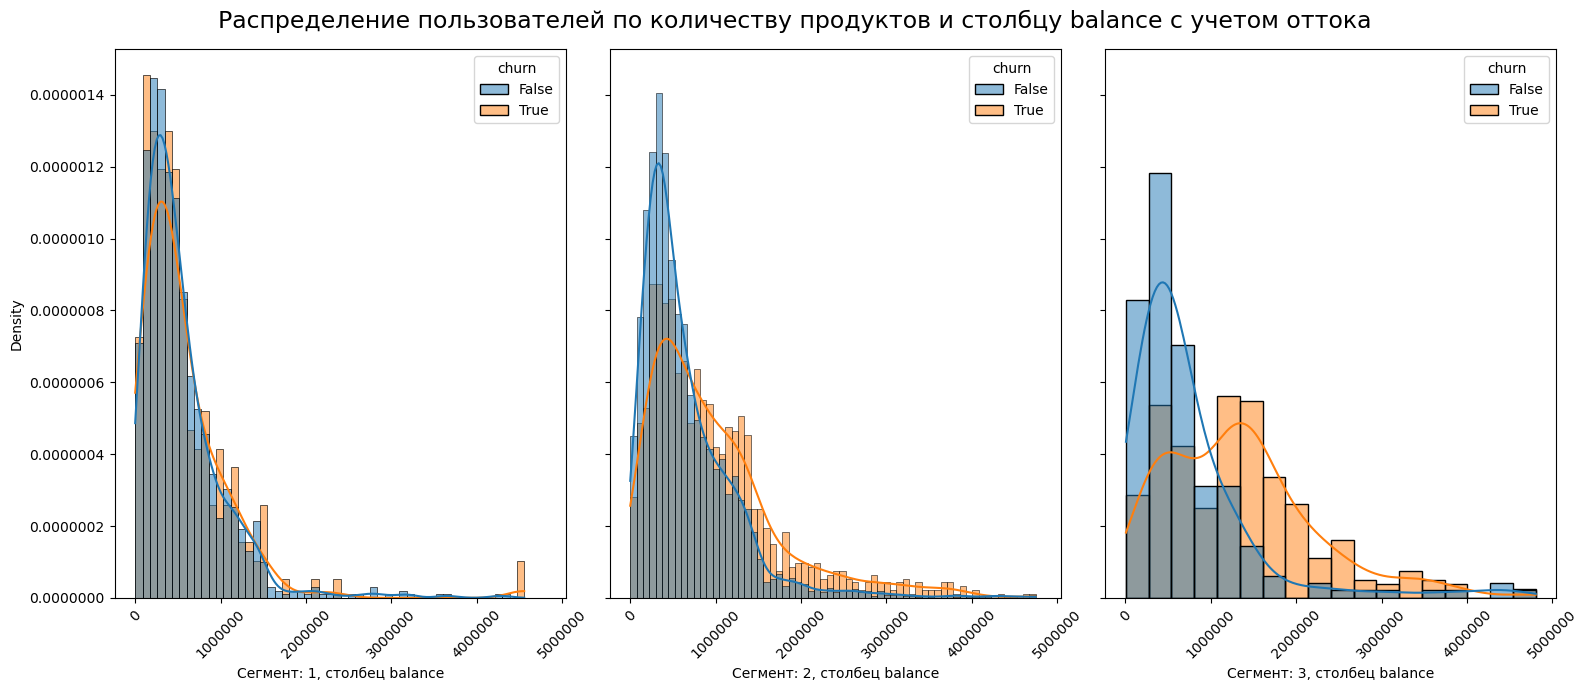

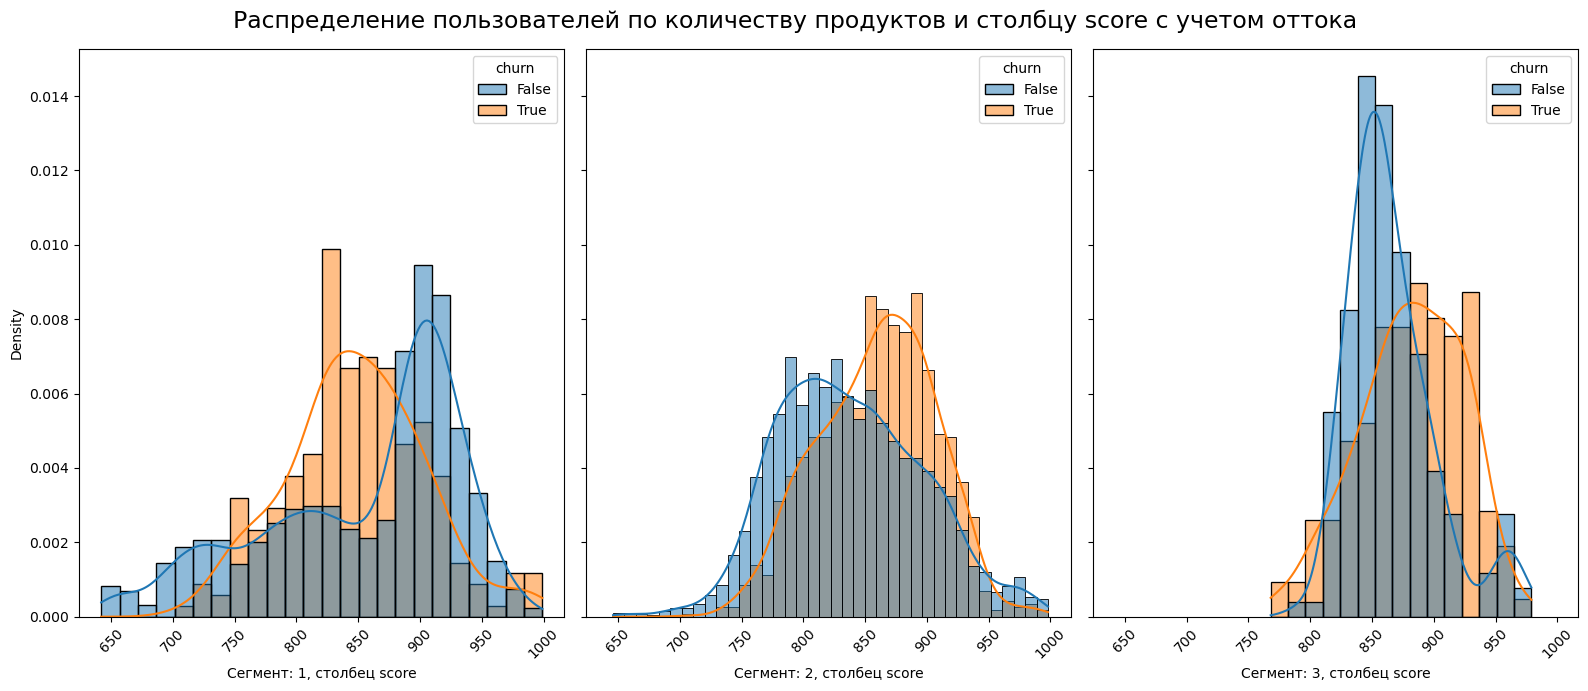

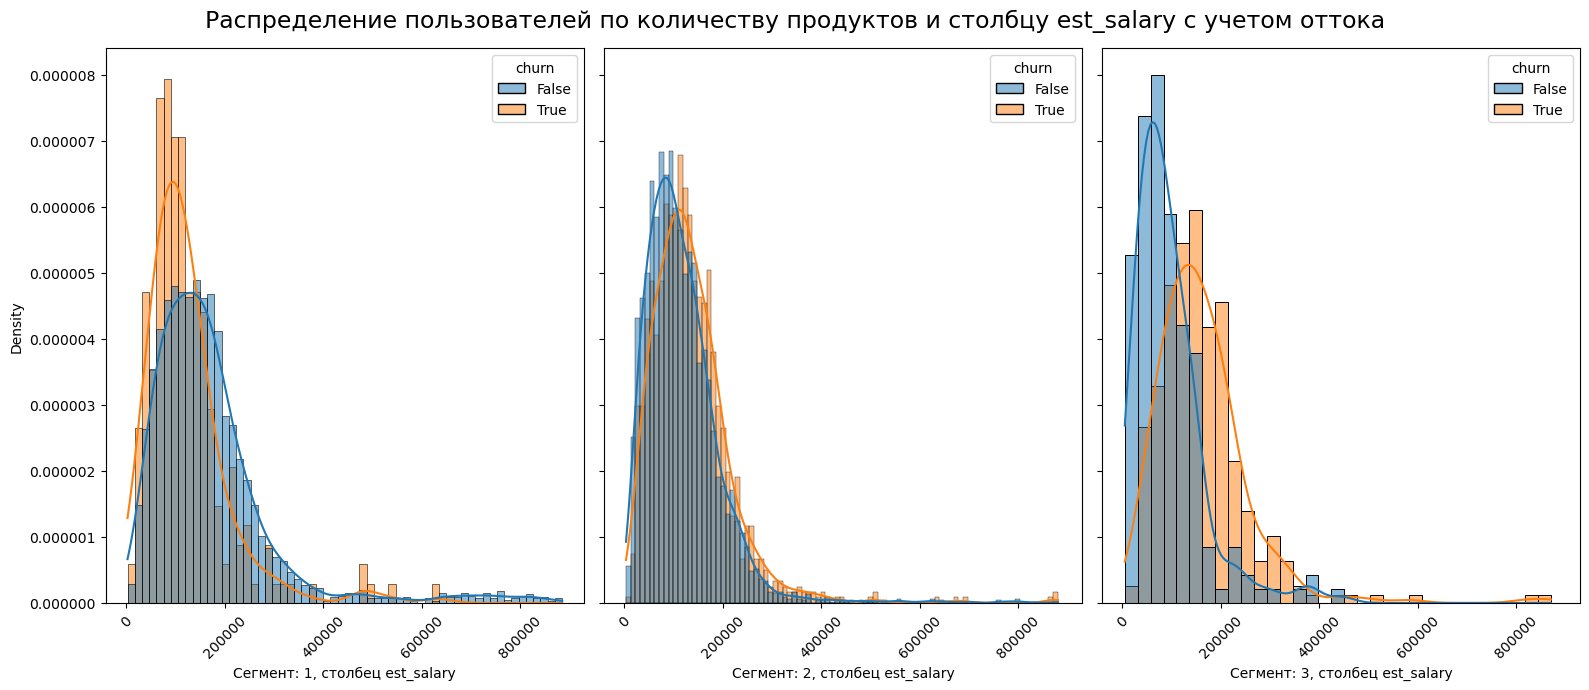

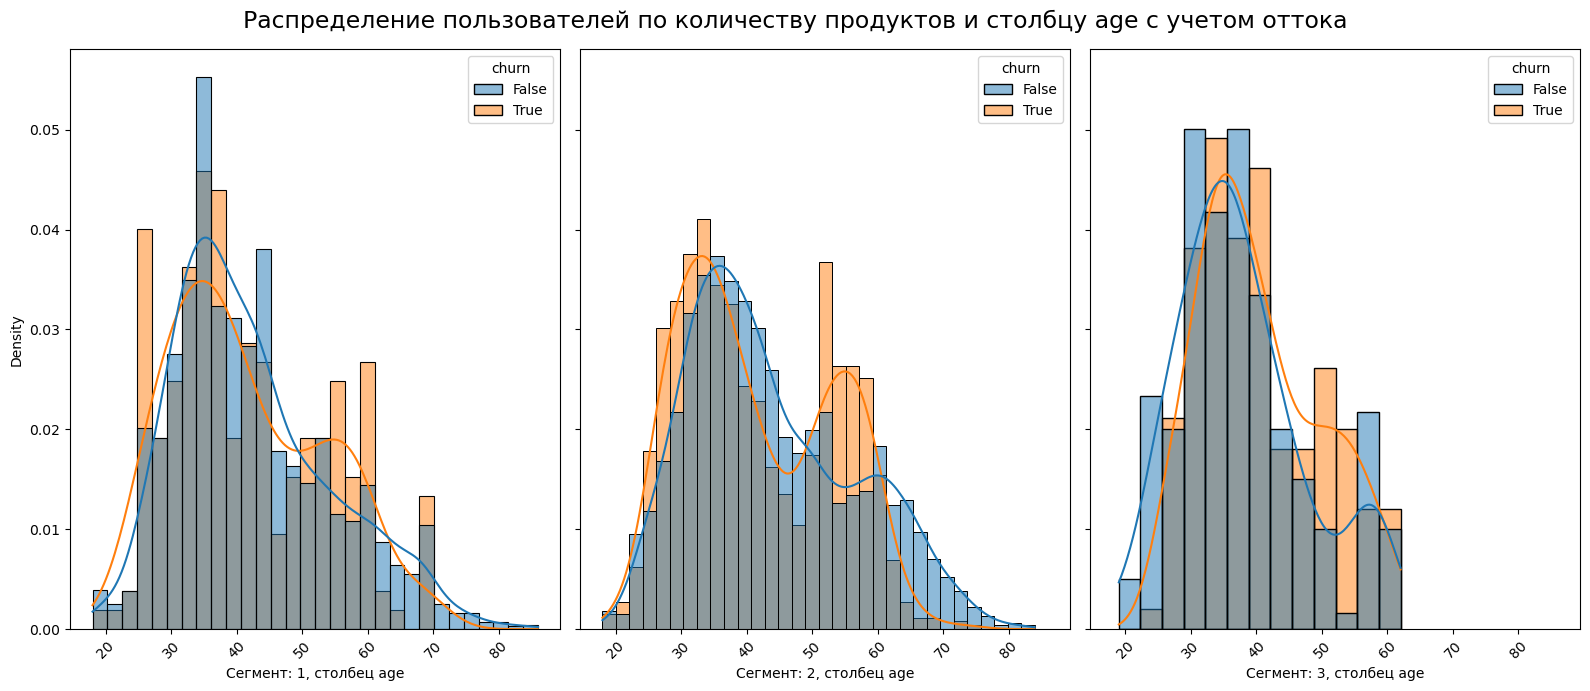

In [49]:
# Строим графики распределения значений столбцов equity, gender_code, city_code, credit_card, last_activity по количеству продуктов с учетом оттока

for column in ['balance', 'score', 'est_salary', 'age']:
    fig, axes = plt.subplots(1, 3, figsize=(16,7), sharey=True, sharex=True)
    fig.suptitle(f'Распределение пользователей по количеству продуктов и столбцу {column} с учетом оттока', fontsize=17)
    plt.ticklabel_format(style='plain')
    sns.histplot(data=data, x=data.query('segment == 1')[column] , ax=axes[0], hue='churn', kde=True, stat='density', common_norm=False)
    sns.histplot(data=data, x=data.query('segment == 2')[column] ,  ax=axes[1], hue='churn', kde=True, stat='density', common_norm=False)
    sns.histplot(data=data, x=data.query('segment == 3')[column] , ax=axes[2], hue='churn', kde=True, stat='density', common_norm=False)
    plt.xlabel(f'Значения столбца {column}')
    plt.xticks(rotation=40)
    
    for i, ax in enumerate(axes):
        ax.set_xlabel(f'Сегмент: {i+1}, столбец {column}')
        ax.tick_params('x', labelrotation=45)
       
    plt.ylabel(f'Количество записей')
    plt.tight_layout()
    plt.show()

***
Как видим, выделение клиентов с 2 и 3 продуктами в отдельный сегмент 2 не привело к искажению пропорций.
По-прежнему самый низкий отток - у сегмента 1 с 1 продуктом, максимальный - у сегмента 3 с 3 продуктами, и 20% у нового укрупненного сегмента.

***

In [50]:
# Создаем обзорную сводную таблицу по новым сегментам

(
    data.pivot_table(index=['segment'], aggfunc={'score': 'median',
                                                                      'gender_code': 'mean',
                                                                      'age': 'median',
                                                                      'equity': 'median',
                                                                      'balance': 'median',
                                                                      'credit_card': 'mean',
                                                                      'last_activity': 'mean',
                                                                      'est_salary': 'median',
                                                                      'Ярославль': 'mean',
                                                                       'Рыбинск': 'mean',
                                                                       'Ростов': 'mean',
                                                                       'churn': 'mean'
                                                                      })
)

age    balance     churn  credit_card  equity  est_salary  \
segment                                                              
1         40  411812.91  0.071143     0.862642       0  140979.260   
2         41  532137.95  0.207519     0.580821       3  108048.140   
3         37  886528.54  0.624481     0.690871       4  120335.915   

         gender_code  last_activity  score    Ростов   Рыбинск  Ярославль  
segment                                                                    
1           0.539883       0.528796  883.0  0.136742  0.260548   0.602710  
2           0.468533       0.498344  840.0  0.148559  0.280556   0.570884  
3           0.618257       0.792531  872.0  0.147303  0.205394   0.647303

In [51]:
# Строим сводную таблицу распределения значений столбцов score, balance, est_salary, age по новым сегментам с учетом оттока

(
    data.pivot_table(index=['segment', 'churn'], aggfunc={'score': 'median',
                                                                      'age': 'median',
                                                                      'balance': 'median',
                                                                      'est_salary': 'median'})
)

age     balance  est_salary  score
segment churn                                    
1       False   40   413676.79   143906.88  886.0
        True    39   397432.56   105408.90  850.0
2       False   41   485070.96   103765.06  833.0
        True    39   770692.43   122201.75  864.0
3       False   36   519908.23    79572.26  858.0
        True    39  1250634.19   147110.47  885.0

In [52]:
# Строим сводную таблицу распределения значений столбцов score, balance, est_salary, age по новым сегментам с учетом оттока

(
    data.pivot_table(index=['segment', 'churn'], aggfunc={'gender_code': 'mean',
                                                                                  'equity': 'mean',
                                                                                  'credit_card': 'mean',
                                                                                  'last_activity': 'mean',
                                                                                  'Ярославль': 'mean',
                                                                                  'Рыбинск': 'mean',
                                                                                  'Ростов': 'mean'})
)

credit_card    equity  gender_code  last_activity    Ростов  \
segment churn                                                                
1       False     0.859748  1.207228     0.525531       0.518899  0.130968   
        True      0.900433  3.112554     0.727273       0.658009  0.212121   
2       False     0.620063  3.064368     0.425914       0.443469  0.150470   
        True      0.430966  3.775738     0.631285       0.707901  0.141261   
3       False     0.524862  4.055249     0.546961       0.950276  0.187845   
        True      0.790698  4.159468     0.661130       0.697674  0.122924   

                Рыбинск  Ярославль  
segment churn                       
1       False  0.261936   0.607095  
        True   0.242424   0.545455  
2       False  0.288819   0.560711  
        True   0.249002   0.609737  
3       False  0.193370   0.618785  
        True   0.212625   0.664452

***
1 и 3 сегменты были подробно рассмотрены выше, они не изменились. Что касается нового объединенного сегмента, то можно сделать вывод о том, что объединение пошло сегментации на пользу: более четко стали видны особенности каждого сегмента.
***

### Выделение подсегментов из сегментов 1 и 2 <a id='3.5'></a>

***
Исходя из сводных данных и графиков, выделим из 1 и 2 сегментов категории пользователей, склонных к наибольшему оттоку, и сформируем следующие подсегменты:

- подсегмент 1: продуктов - 1, баллы кредитного скоринга 750-870, количество заложенных объектов имущества >1;
- подсегмент 2_1: продуктов - 2, баланс > 700000, возраст < 35 лет;
- подсегмент 2_2: продуктов - 2, баланс > 700000, возраст от 50 до 60 лет;
- подсегмент 3: продуктов - 3 и более.

***

In [53]:
# Формируем подсегменты

data.loc[(data['segment'] == 1) & (data['score'] > 750) & (data['score'] < 870) & (data['equity'] > 1), 'subsegment'] = 'subsegment_1'
data.loc[(data['segment'] == 2) &  (data['balance'] > 700000) & (data['age'] < 35), 'subsegment'] = 'subsegment_2_1'
data.loc[(data['segment'] == 2) & (data['balance'] > 700000) & (data['age'] > 50) & (data['age'] < 60), 'subsegment'] = 'subsegment_2_2'
data.loc[(data['segment'] == 3), 'subsegment'] = 'subsegment_3'

In [54]:
# Строим ещё раз сводную таблицу с общим распределением ушедших и оставшихся клиентов по подсегментам
# Столбец churn/total показывает процент ушедших к общему количеству пользователей в сегменте, в процентах
# Столбец churn/no_churn показывает соотношение оставшихся к ушедшим в сегменте

churn_pivot_segment = data.groupby('subsegment').agg({'userid':'count', 'churn':'sum'}).rename(columns={'userid':'total'})
churn_pivot_segment['no_churn'] = churn_pivot_segment['total'] - churn_pivot_segment['churn']
churn_pivot_segment['churn/total'] = churn_pivot_segment.apply(lambda x: f'{x.churn / x.total:.2%}', axis=1)
churn_pivot_segment['no_churn/total'] = churn_pivot_segment.apply(lambda x: f'{x.no_churn / x.total:.2%}', axis=1)
churn_pivot_segment

total  churn  no_churn churn/total no_churn/total
subsegment                                                       
subsegment_1      738    104       634      14.09%         85.91%
subsegment_2_1    430    199       231      46.28%         53.72%
subsegment_2_2    397    182       215      45.84%         54.16%
subsegment_3      482    301       181      62.45%         37.55%

***
Выделенные подсегменты в сегментах 1 и 2 демонстрируют уровень оттока выше, чем в среднем по сегментам 1 и 2.

Особенно ярко выделены подсегменты 2_1 (продуктов - 2, баланс > 700000, возраст < 35 лет) и 2_2 (продуктов - 2, баланс > 700000, возраст от 50 до 60 лет), в них отток достигает 45%.
***

In [55]:
# Строим сводную таблицу распределения значений столбцов score, balance, est_salary, age по подсегментам с учетом оттока

(
    data.pivot_table(index=['subsegment', 'churn'], aggfunc={'score': 'median',
                                                                      'age': 'median',
                                                                      'balance': 'median',
                                                                      'est_salary': 'median'})
)

age      balance  est_salary  score
subsegment     churn                                     
subsegment_1   False   40   448496.375    98021.55  815.0
               True    39   465177.605   102411.84  832.0
subsegment_2_1 False   32   952509.070   112105.69  857.0
               True    31  1116554.680   131346.93  900.0
subsegment_2_2 False   55  1124593.530   103618.47  859.0
               True    55  1287690.465   122090.95  869.0
subsegment_3   False   36   519908.230    79572.26  858.0
               True    39  1250634.190   147110.47  885.0

In [56]:
# Строим сводную таблицу распределения значений столбцов score, balance, est_salary, age по подсегментам с учетом оттока

(
    data.pivot_table(index=['subsegment', 'churn'], aggfunc={'gender_code': 'mean',
                                                                                  'equity': 'mean',
                                                                                  'credit_card': 'mean',
                                                                                  'last_activity': 'mean',
                                                                                  'Ярославль': 'mean',
                                                                                  'Рыбинск': 'mean',
                                                                                  'Ростов': 'mean'})
)

credit_card    equity  gender_code  last_activity  \
subsegment     churn                                                      
subsegment_1   False     0.924290  3.580442     0.481073       0.474763   
               True      0.923077  3.586538     0.807692       0.663462   
subsegment_2_1 False     0.636364  4.086580     0.493506       0.385281   
               True      0.341709  4.396985     0.678392       0.824121   
subsegment_2_2 False     0.497674  4.046512     0.381395       0.381395   
               True      0.291209  4.241758     0.615385       0.697802   
subsegment_3   False     0.524862  4.055249     0.546961       0.950276   
               True      0.790698  4.159468     0.661130       0.697674   

                        Ростов   Рыбинск  Ярославль  
subsegment     churn                                 
subsegment_1   False  0.175079  0.266562   0.558360  
               True   0.269231  0.250000   0.480769  
subsegment_2_1 False  0.103896  0.307359   0.588745  
               True   0.080402  0.241206   0.678392  
subsegment_2_2 False  0.116279  0.362791   0.520930  
               True   0.142857  0.263736   0.593407  
subsegment_3   False  0.187845  0.193370   0.618785  
               True   0.122924  0.212625   0.664452

### Промежуточные выводы по разделу 3: <a id='3.6'></a>


**Портреты клиентов банка, сегментированных по количеству используемых продуктов**

> **Сегмент 1: клиенты с одним продуктом:**

Второй по численности сегмент - 33,3% пользователей.

Самый низкий показатель оттока из всех сегментов - 3 место (7,11% ушедших).

По большей части - мужчины. Медианный возраст - 40 лет. Медианный баланс на счете около 400 тыс условных единиц. Самая высокая медианная зарплата - 140 тыс. У подавляющего большинства клиентов есть кредитные карты. Минимум объектов имущества в залоге у банка. Средние показатели активности. Высокие баллы кредитного скоринга. Распределение между филиалами близко к распределению всего датасета.

В этом сегменте преимущественно уходят клиенты:
- более молодые, чем оставшиеся;
- с более высокими показателями активности, чем у оставшихся;
- с более низкими зарплатами, чем у оставшихся;
- с более низкими баллами кредитного скоринга (от 800 до 850), чем у оставшихся;
- с большим количеством объектов имущества в залоге у банка, чем у оставшихся;
- из филиала в Ростове уходят больше, чем остаются;

> **Сегмент 2: клиенты с двумя или тремя продуктами:**

Первый по численности сегмент - 61,9% пользователей.

2 место по показателю оттока (20,75% ушедших).

По большей части - женщины. Медианный возраст - 41 год. Медианный баланс на счете около 530 тыс. Низкая (относительно других сегментов) медианная зарплата - 108 тыс. В большинстве владельцы кредитных карт. Несколько объектов имущества в залоге у банка.
Низкие показатели активности. Низкие баллы кредитного скоринга. Самое маленькое количество клиентов из Ярославля среди всех сегментов. Самое большое количество клиентов из Рыбинска среди всех сегментов. Самое большое количество клиентов из Ростова среди всех сегментов.

В этом сегменте преимущественно уходят клиенты:
- более молодые, чем оставшиеся;
- по большей части мужчины;
- с более высокими показателями активности, чем у оставшихся;
- с большим балансом на счете, чем у оставшихся;
- с более высокими зарплатами, чем у оставшихся;
- с более высокими баллами кредитного скоринга (около 860), чем у оставшихся;
- с большим количеством объектов имущества в залоге у банка, чем у оставшихся;
- у которых нет кредитной карты;
- из филиала в Ярославле уходят больше, чем остаются;

> **Сегмент 3: клиенты с четырьмя и более продуктами:**

Третий по численности сегмент - 4,7% пользователей.

Самый высокий показатель оттока из всех сегментов - 1 место (63,28% ушедших).

По большей части - мужчины. Медианный возраст - 37 лет, самый молодой сегмент. Медианный баланс на счете около 900 тыс. Средняя (относительно других сегментов) медианная зарплата - 120 тыс. В большинстве владельцы кредитных карт. Несколько объектов имущества в залоге у банка. Высокие показатели активности. Высокие баллы кредитного скоринга. Распределение между филиалами близко к распределению всего датасета.

В этом сегменте преимущественно уходят клиенты:
- более старшие, чем оставшиеся;
- с более низкими показателями активности;
- с большим балансом на счете, чем у оставшихся;
- с более высокими зарплатами, чем у оставшихся;
- с более высокими баллами кредитного скоринга (около 860), чем у оставшихся;
- с большим количеством объектов имущества в залоге у банка, чем у оставшихся;
- у которых есть кредитная карта;
- из филиалов в Рыбинске и Ярославле уходят больше, чем остаются.

**Выделенные подсегменты в сегментах 1 и 2 демонстрируют уровень оттока выше, чем в среднем по сегментам 1 и 2.**

Особенно ярко выделены подсегменты 2_1 (продуктов - 2, баланс > 700000, возраст < 35 лет) и 2_2 (продуктов - 2, баланс > 700000, возраст от 50 до 60 лет), в них отток достигает 45%.

## Статистическая проверка гипотез <a id='4'></a>

### Гипотеза различия возраста между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним <a id='4.1'></a>

***
Проверим гипотезу о равенстве средних двух выборок - возраста клиентов, которые пользуются 2 продуктами банка, и клиентов, которые пользуются 1 продуктом. Для проверки используем t-тест.

Сформулируем гипотезы:
- *Нулевая гипотеза:* средний возраст клиентов, использующих 1 продукт, **равен** среднему возрасту клиентов, использующих 2 продукта;
- *Альтернативная гипотеза:* средний возраст клиентов, использующих 1 продукт, **не равен** среднему возрасту клиентов, использующих 2 продукта.
***

In [57]:
# Формируем две выборки

age_1 = data.query('products == 1')['age']
age_2 = data.query('products == 2')['age']

In [58]:
# Выводим на экран параметры выборки

age_1.describe()

count    3247.000000
mean       42.220511
std        12.014857
min        18.000000
25%        33.000000
50%        40.000000
75%        50.000000
max        86.000000
Name: age, dtype: float64

In [59]:
# Выводим на экран параметры выборки

age_2.describe()

count    5028.000000
mean       42.738663
std        12.177886
min        18.000000
25%        33.000000
50%        40.000000
75%        52.000000
max        84.000000
Name: age, dtype: float64

In [60]:
# Записываем результаты t-теста в переменную, устанавливаем параметр equal_var=False, поскольку размеры выборок сильно различаются

results = st.ttest_ind(age_1, age_2, equal_var=False)

# Задаем стандартный уровень статистической значимости

alpha = 0.05

# выводим значения p-value на экран 

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.05677373259441929
Не получилось отвергнуть нулевую гипотезу


***
Несмотря на то, что параметры выборок (кроме размера) казались практически одинаковыми, результаты t-теста лишь ненамного превысили заданный уровень статистической значимости.

Тем не менее, нулевую гипотезу отвергнуть не удалось, а значит, вероятность равенства среднего возраста клиентов, которые пользуются 2 продуктами банка, и клиентов, которые пользуются 1 продуктом, достаточно высока.
***

### Гипотеза различия баллов кредитного скоринга среди ушедших и оставшихся в 3 сегменте <a id='4.2'></a>

***
Выше в проекте был сделан вывод о том, что в 3 сегменте ушли клиенты с более высокими зарплатами. Проверим гипотезу о равенстве распределений двух выборок - зарплат ушедших и оставшихся клиентов в 3 сегменте. Для проверки используем тест Манна-Уитни.

Сформулируем гипотезы:
- *Нулевая гипотеза:* распределение зарплат ушедших клиентов в 3 сегменте **равно** распределению зарплат ушедших клиентов в 3 сегменте;
- *Альтернативная гипотеза:* распределение зарплат ушедших клиентов в 3 сегменте **не равно** распределению зарплат ушедших клиентов в 3 сегменте.
***

In [61]:
# Формируем две выборки

score_1 = data.query('(churn == True) & (segment == 3)')['est_salary']
score_2 = data.query('(churn == False) & (segment == 3)')['est_salary']

In [62]:
# Выводим на экран параметры выборки

score_1.describe()

count       301.000000
mean     161784.183654
std       98422.679437
min       16502.700000
25%       99474.200000
50%      147110.470000
75%      201285.100000
max      870724.090000
Name: est_salary, dtype: float64

In [63]:
# Выводим на экран параметры выборки

score_2.describe()

count       181.000000
mean      94545.504586
std       71051.334689
min        5043.140000
25%       47295.720000
50%       79572.260000
75%      121503.250000
max      446011.240000
Name: est_salary, dtype: float64

In [64]:
# Проводим непараметрический тест Уилкоксона-Манна-Уитни

alpha = 0.05

results = st.mannwhitneyu(score_1, score_2)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение:  2.785806628853765e-22
Отвергаем нулевую гипотезу


***
Различие распределения зарплат ушедших и оставшихся клиентов, использующих 4 продукта, статистически значимо.
***

### Гипотеза различия баланса клиентов в подсегментах 2_1 и 2_2 <a id='4.3'></a>

***
Мы формировали подсегменты 2_1 и 2_2 исходя из одинакового количества продуктов (2-3 в обоих случаях), баланса (болле 700000 в обоих случаях) и возраста клиента (до 35 лет в сегменте 2_1 и 50-60 в сегменте 2_2). Проверим гипотезу о равенстве средних двух выборок - баланса клиентов подсегмента 2_1, и клиентов подсегмента 2_2. Для проверки используем t-тест.

Сформулируем гипотезы:
- *Нулевая гипотеза:* средний баланс клиентов подсегмента 2_1 **равен** среднему балансу клиентов подсегмента 2_2;
- *Альтернативная гипотеза:* средний баланс клиентов подсегмента 2_1 **не равен** среднему балансу клиентов подсегмента 2_2.
***

In [65]:
# Формируем две выборки
balance_2_1 = data.query('~balance.isna() & subsegment == "subsegment_2_1"')['balance']
balance_2_2 = data.query('~balance.isna() & subsegment == "subsegment_2_2"')['balance']

In [66]:
# Выводим на экран параметры выборки

balance_2_1.describe().astype(int)

count        430
mean     1204747
std       597056
min       703393
25%       828327
50%      1004802
75%      1321855
max      4376616
Name: balance, dtype: int32

In [67]:
# Выводим на экран параметры выборки

balance_2_2.describe().astype(int)

count        397
mean     1380615
std       709419
min       700234
25%       924560
50%      1183604
75%      1481084
max      4672940
Name: balance, dtype: int32

In [68]:
# Записываем результаты t-теста в переменную, устанавливаем параметр equal_var=False, поскольку размеры выборок сильно различаются

results = st.ttest_ind(balance_2_1, balance_2_2, equal_var=False)

# Задаем стандартный уровень статистической значимости

alpha = 0.05

# выводим значения p-value на экран 

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.00013264978763894285
Отвергаем нулевую гипотезу


***
Несмотря на то, что подсегменты 2_1 и 2_2 были сформированы в том числе исходя из суммы баланса, по результатам t-теста нулевая гипотеза была отвергнута.

Таким образом, разница в среднем балансе между этими двумя подсегментами оказалась статистически значимой.
***

## Выводы и рекомендации <a id='5'></a>

### Общая информация:

- По уходу: из всех пользователей в датасете ушло 18,3% клиентов.
- По полу: клиенты банка в датасете распределены практически поровну, причем женщин чуть больше (50,04%) чем мужчин (49,96%)
- По возрасту: клиентов в возрасте до 25 лет относительно мало; до возраста 30 лет идет постепенный рост количества клиентов; больше всего клиентов - в возрасте 32-37 лет; количество клиентов старше 38 лет постепенно идет на спад до 45 лет; количество клиентов в диапазоне 45-61 на одном уровне; с дальнейшим повышением возраста идет постепенный спад; количество клиентов 73+ оценивается так же, как количество клиентов 18-22 года;
- По филиалам: больше всего клиентов - из филиала в Ярославле (58,52%), далее идет Рыбинск (27,02%) и Ростов (14,46%); эти пропорции близки к соотношению населения этих городов, что выглядит закономерно;
- По балансу счёта: большая часть пользователей (до 75%) имеет на счете сумму в пределах 1,5 млн условных единиц; далее количество клиентов резко снижается;
- По заработной плате: Большая часть клиентов имеет оценочную заработную плату в районе 120 тыс условных единиц;
- По количеству продуктов банка у пользователя: у большинства пользователей есть два продукта банка, на втором месте те, у кого всего один продукт; пользователи с 3+ продуктами - в меньшинстве;
- По баллам кредитного скоринга: средний и медианный балл - 850, есть всплеск количества пользователей со значениями 880-920;
- По наличию кредитной карты: у 68% клиентов есть кредитная карта;
- По числу объектов собственности, которое банк рассматривает как залоговое имущество: оличество клиентов, не имеющих заложенного имущества в банке, достаточно велико; интересно, что с увеличением количества таких объектов начиная с 1 и до 5 - растёт и количество пользователей; количество пользователей, у которых от 2 до 5 объектов собственности находится в залоге у банка, как минимум вдвое превышает количество клиентов, у которых такого имущества нет вообще; можно предположить, что банк сильно ориентирован на пользователей ипотечных и других подобных услуг;
- По активности за последний период: у всего лишь 52% клиентов стоит отметка об активности за последний период; судя по всему, это достаточно низкий показатель.

### Основные признаки ушедших клиентов:

В основном - мужчины, возраст - 30-40 лет, большая сумма баланса счёта (ближе к 1,5 млн и выше), пользуются 2-4 продуктами банка, балл кредитного скоринга - выше среднего (850-900), не владеют кредитной картой, объектов имущества в залоге у банка - от 2 до 5, есть активность в последний период.

### Сегментация клиентов по количеству используемых банковских продуктов и продуктовые рекомендации:

> **Сегмент 2: клиенты с двумя или тремя продуктами:**

Второй по численности сегмент - 33,3% пользователей.

Самый низкий показатель оттока из всех сегментов - 3 место (7,11% ушедших).

По большей части - мужчины. Медианный возраст - 40 лет. Медианный баланс на счете около 400 тыс условных единиц. Самая высокая медианная зарплата - 140 тыс. У подавляющего большинства клиентов есть кредитные карты. Минимум объектов имущества в залоге у банка. Средние показатели активности. Высокие баллы кредитного скоринга. Распределение между филиалами близко к распределению всего датасета.

В этом сегменте преимущественно уходят клиенты:
- более молодые, чем оставшиеся;
- с более высокими показателями активности, чем у оставшихся;
- с более низкими зарплатами, чем у оставшихся;
- с более низкими баллами кредитного скоринга (от 800 до 850), чем у оставшихся;
- с большим количеством объектов имущества в залоге у банка, чем у оставшихся;
- из филиала в Ростове уходят больше, чем остаются.

**Подсегмент 1: баллы кредитного скоринга 750-870, количество заложенных объектов имущества >1:** уровень оттока 14%.

**Рекомендации:** С учетом того, что отток увеличивается с увеличением количества продуктов в пользовании у клиента, и в этом сегменте самый низкий отток - не стоит предлагать таким клиентам новые продукты, а рассмотреть изменение условий кредитования (в том числе ипотечного) для этого сегмента, ориентированное на молодых людей с более низкими зарплатами и невысоким кредитным рейтингом, преимущественно - в Ростове: акции, льготные периоды, снижение ставок и т.п.

> **Сегмент 2: клиенты с двумя или тремя продуктами:**

Первый по численности сегмент - 61,9% пользователей.

2 место по показателю оттока (20,75% ушедших).

По большей части - женщины. Медианный возраст - 41 год. Медианный баланс на счете около 530 тыс. Низкая (относительно других сегментов) медианная зарплата - 108 тыс. В большинстве владельцы кредитных карт. Несколько объектов имущества в залоге у банка.
Низкие показатели активности. Низкие баллы кредитного скоринга. Самое маленькое количество клиентов из Ярославля среди всех сегментов. Самое большое количество клиентов из Рыбинска среди всех сегментов. Самое большое количество клиентов из Ростова среди всех сегментов.

В этом сегменте преимущественно уходят клиенты:
- более молодые, чем оставшиеся;
- по большей части мужчины;
- с более высокими показателями активности, чем у оставшихся;
- с большим балансом на счете, чем у оставшихся;
- с более высокими зарплатами, чем у оставшихся;
- с более высокими баллами кредитного скоринга (около 860), чем у оставшихся;
- с большим количеством объектов имущества в залоге у банка, чем у оставшихся;
- у которых нет кредитной карты;
- из филиала в Ярославле уходят больше, чем остаются.

**Подсегменты: 2_1 (продуктов - 2, баланс > 700000, возраст < 35 лет) и 2_2 (продуктов - 2, баланс > 700000, возраст от 50 до 60 лет):** уровень оттока 45%.

**Рекомендации:** С учетом того, что уходит в этом сегменте пласт клиентов обеспеченных, а основные возрастные группы оттока - молодежь до 35 лет и более взрослые люди 50-60 лет, можно проработать предложение накопительных вкладов двух видов: один - ориентированный на молодежь, другой - на людей старшего возраста, и сделать упор на жителях самого крупного города сети - Ярославля.
Кроме того, следует проанализировать и, возможно, скорректировать условия кредитования, поскольку у оттока прямая зависимость с увеличением количества имущества в залоге у банка.

> **Сегмент 3: клиенты с четырьмя и более продуктами:**

Третий по численности сегмент - 4,7% пользователей.

Самый высокий показатель оттока из всех сегментов - 1 место (63,28% ушедших).

По большей части - мужчины. Медианный возраст - 37 лет, самый молодой сегмент. Медианный баланс на счете около 900 тыс. Средняя (относительно других сегментов) медианная зарплата - 120 тыс. В большинстве владельцы кредитных карт. Несколько объектов имущества в залоге у банка. Высокие показатели активности. Высокие баллы кредитного скоринга. Распределение между филиалами близко к распределению всего датасета.

В этом сегменте преимущественно уходят клиенты:
- более старшие, чем оставшиеся;
- с более низкими показателями активности;
- с большим балансом на счете, чем у оставшихся;
- с более высокими зарплатами, чем у оставшихся;
- с более высокими баллами кредитного скоринга (около 860), чем у оставшихся;
- с большим количеством объектов имущества в залоге у банка, чем у оставшихся;
- у которых есть кредитная карта;
- из филиалов в Рыбинске и Ярославле уходят больше, чем остаются.

**Рекомендации:** Из этого сегмента уходят клиенты, "перенасыщенные" продуктами банка (много продуктов в пользовании, много объектов в залоге, наличие кредитных карт) и при этом достаточно состоятельные и зрелые, но по некоторым причинам теряющие интерес. Предлагать новые продукты этому сегменту лишено смысла, скорее, стоит проанализировать существующие и понять, что не устраивает уходящих клиентов. При этом, можно сделать попытку заинтересовать и простимулировать интерес этого сегмента к уже существующим продуктам (включая мобильное приложение банка) - редизайн, обновление условий.

***
**Ссылка на дашборд:** https://public.tableau.com/views/Metanpromdashboard/Dashboard1?:language=en-US&:display_count=n&:origin=viz_share_link
***